# Data Mining Project

## Table of Contents
* [1. Data Exploration](#chapter1)
    * [1.1 Imports](#sub-section-1_1)
    * [1.2 Loading Data](#sub-section-1_2)
    * [1.3 Initial Analysis](#sub-section-1_3)
        * [1.3.1 Types](#sub-section-1_3_1)
        * [1.3.2 Duplicates](#sub-section-1_3_2)
        * [1.3.3 Missing Values](#sub-section-1_3_3)
        * [1.3.4 Data Statistics](#sub-section-1_3_4)
    * [1.4 Individual Variable Analysis](#sub-section-1_4)
        * [1.4.1 Numerical Variables](#sub-section-1_4_1)
            * [a. Overview](#sub-section-a)
            * [b. customer_age](#sub-section-b)
            * [c. vendor_count](#sub-section-c)
            * [d. product_count](#sub-section-d)
            * [e. is_chain](#sub-section-e)
            * [f. first_order & last_order](#sub-section-f)
            * [g. CUI_American to CUI_Thai](#sub-section-g)
            * [h. DOW_0 to DOW_6](#sub-section-h)
            * [i. HR_0 to HR_1](#sub-section-i)
        * [1.4.2 Categorical Variables](#sub-section-1_4_2)
            * [a. customer_region](#sub-section-a)
            * [b. last_promo](#sub-section-b)
            * [c. payment_method](#sub-section-c)
        * [1.5 Feature Engeneering](#sub-section-1_5)
            * [1.5.1 Spending Habit](#sub-section-1_5_1)
            * [1.5.2 Days of the Week and Hours](#sub-section-1_5_2)
            * [1.5.3 Chain orders & non chain orders](#sub-section-1_5_3)
        * [1.6 Multivariate Analysis](#sub-section-1_6)
            * [a. payment_method & product_count](#sub-section-a)
            * [b. city & last_promo/ payment_method](#sub-section-b)
            * [c. vendor_diversity & customer_age/ product_count](#sub-section-c)
            * [d. top_cuisine & city](#sub-section-d)
            * [e. Spending Habits and Order Behavior](#sub-section-e)
            * [f. Promotion Usage and Spending Patterns](#sub-section-f)
            * [g. Payment Method Preferences by Spending and Promotion Usage](#sub-section-g)
            * [i. Week period and time of day](#sub-section-i)
            * [j. Spending habits in cities & in top cuisines](#sub-section-j)

Feedback 
- Introduction of the report itself and what is expected (use academic research)
    - Emphasis on clustering (not segmentation)
- Conclusion - include insights (1 or 2)
- age & orders in the week... explore more in depth relationships
- is_chain - anomaly
- Explore new features created: outliers, normally distributed, insights, anomalies, missing values?
    - point of the new features & perform EDA on them
    - what are we trying to find?
    - aggregations, ratios,...
- Heatmaps - use divergent palettes
- Boxplots - ensure use different scales if features have different units

intro 
- write last
- what is the objective? data exploration, optionally: EDA is motivated by clustering/ segmentation as the next phase
- what did the project achieve? 1 or 2 key insights

Initial analysis
- statistical analysis
- supported by visualisations
- check results of df.describe()
    - any interesting statistics that stand out?
    - check both number and non numeric features

Anomalies
- missing values: missing completely at random?
- inconsistent values: posiible reasons/ explanations?
- duplicates: are these likely duplicated records or valid?
- are there pattrens to the anomalies?
- outliers: are these liekly to be extreme values? or data entry errors?
- are the quantities something to be concerned about? if drop all anomilies, how much data will be lost?

Relationships, patterns & trends 
- supported by vusualisations

- correlation

- any interesting sub-populations

    - geographic regions: do ther have different behaviours?
    - what about age groyps?
- Draw 

Feature engineering
- aggregations (CUI, HR, DW)
- ratios (MNT/ X)
- proportions (% spent on weekdays)
- analysis of new features

Conclusion 
- 1 or 2 key insights
- connect to next phase (segmentation)
    - any features

<a class="anchor" id="2nd-bullet">

## 1. Data Exploration
    
</a>

<a class="anchor" id="2nd-bullet">

### 1.1 Imports
    
</a>

In [147]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

<a class="anchor" id="2nd-bullet">

### 1.2 Loading Data
    
</a>

In [148]:
customers = pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv")

In [149]:
pd.set_option('display.max_columns', None) #to be able too see all columns
customers.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  CUI_American  \
0         1          0.0           1   DELIVERY           DIGI          0.00   
1         2          0.0           1   DISCOUNT           DIGI         12.82   
2         2          0.0           1   DISCOUNT           CASH          9.20   
3         1          0.0           2   DELIVERY           DIGI          0.00   
4         0          0.0           2          -           DIGI         14.57   

   CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  \
0       0.00            0.0       0.0                 0.0          0.0   
1       6.39            0.0       0.0                 0.0          0.0   
2       0.00            0.0       0.0                 0.0          0.0   
3      13.70            0.0       0.0                 0.0          0.0   
4      40.87            0.0       0.0                 0.0          0.0   

   CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  \
0           0.0          0.0       28.88          0.0           0.0   
1           0.0          0.0        0.00          0.0           0.0   
2           0.0          0.0        0.00          0.0           0.0   
3           0.0          0.0       17.86          0.0           0.0   
4           0.0          0.0        0.00          0.0           0.0   

   CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  \
0                0.0        0.0                       0.0       0.0      1   
1                0.0        0.0                       0.0       0.0      1   
2                0.0        0.0                       0.0       0.0      1   
3                0.0        0.0                       0.0       0.0      0   
4                0.0        0.0                       0.0       0.0      0   

   DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
0      0      0      0      0      0      1   0.0     0     0     0     0   
1      0      0      0      0      0      1   0.0     0     0     0     0   
2      0      0      0      0      0      1   0.0     0     0     0     0   
3      1      0      0      0      0      1   0.0     0     0     0     0   
4      1      0      0      0      0      1   0.0     0     0     0     0   

   HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  \
0     0     0     0     0     0      0      0      0      0      0      0   
1     0     0     0     0     0      1      1      0      0      0      0   
2     0     0     0     0     1      0      1      0      0      0      0   
3     0     0     0     0     0      0      1      0      0      1      0   
4     0     0     0     1     1      0      0      0      0      0      0   

   HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0

<a class="anchor" id="2nd-bullet">

### 1.3 Initial Analysis
    
</a>

<a class="anchor" id="2nd-bullet">

#### 1.3.1 Types
    
</a>

In [150]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<a class="anchor" id="2nd-bullet">

#### 1.3.3 Duplicates
    
</a>

In [151]:
# Check for duplicate customer_id
customers[customers.duplicated() == True]

customer_id customer_region  customer_age  vendor_count  product_count  \
3379   b55012ee1c            8550          23.0             4             11   
7887   24251eb7da            8550          28.0             4              8   
16230  671bf0c738            8550          25.0             4              7   
20907  742ca068fc            8550          20.0             1              2   
24329  df91183978            8550          23.0             2              3   
24827  6bbf5f74cd            8550          22.0            10             20   
25793  8aa9bbc147            8550          24.0             2              4   
27515  cf563a0a98            8550          27.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29926  fac7984c0d            8550          29.0             1              1   
30416  b8e7a643a4            8550          18.0             2              4   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
3379          1          2.0          89    FREEBIE           CARD   
7887          3          7.0          85          -           CARD   
16230         3         23.0          66    FREEBIE           CARD   
20907         0         35.0          35          -           CARD   
24329         1         47.0          52   DELIVERY           CARD   
24827         9         48.0          88          -           CARD   
25793         2         53.0          59   DELIVERY           DIGI   
27515         0         61.0          62    FREEBIE           CASH   
27739         1         62.0          62   DELIVERY           CARD   
28713         0         67.0          89    FREEBIE           DIGI   
29926         0         75.0          75   DELIVERY           CARD   
30416         0         78.0          78    FREEBIE           CASH   
31653         1         88.0          88          -           DIGI   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
3379           0.00      93.43           0.00       0.0                 0.0   
7887          30.44      18.54           0.00       0.0                 0.0   
16230         56.18       0.00           0.00       0.0                 0.0   
20907          0.00       0.00           0.00       0.0                 0.0   
24329          0.00      18.78           0.00       0.0                 0.0   
24827         62.17      64.37          44.87       0.0                 0.0   
25793          0.00      18.80          30.13       0.0                 0.0   
27515          0.00      25.41           0.00       0.0                 0.0   
27739         17.71       0.00           0.00       0.0                 0.0   
28713          0.00       6.01          12.49       0.0                 0.0   
29926          0.00      11.70           0.00       0.0                 0.0   
30416          0.00      36.45          19.21       0.0                 0.0   
31653          0.00       0.00           0.00       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
3379           0.0           0.0          0.0         0.0          0.0   
7887           0.0           0.0          0.0         0.0          0.0   
16230          0.0           0.0          0.0         0.0          0.0   
20907          0.0           0.0          0.0         0.0          0.0   
24329          0.0           0.0          0.0         0.0          0.0   
24827          0.0           0.0          0.0         0.0          0.0   
25793          0.0           0.0          0.0         0.0          0.0   
27515          0.0           0.0          0.0         0.0          0.0   
27739          0.0           0.0          0.0         0.0          0.0   
28713          0.0           0.0          0.0         0.0

There are 13 duplicates

In [152]:
duplicates = customers['customer_id'].value_counts()
duplicate_count = duplicates[duplicates > 1]

print(f"Duplicate customer IDs and their counts:\n{duplicate_count}")

Duplicate customer IDs and their counts:
customer_id
742ca068fc    2
b55012ee1c    2
df91183978    2
6bbf5f74cd    2
24251eb7da    2
201a13a34d    2
b8e7a643a4    2
cc08ef25ce    2
8aa9bbc147    2
671bf0c738    2
06018a56be    2
fac7984c0d    2
cf563a0a98    2
Name: count, dtype: int64


In [153]:
customers.set_index('customer_id', inplace = True)
customers.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
1b8f824d5e         0.0                       0.0       0.0      1      0   
5d272b9dcb         0.0                       0.0       0.0      1      0   
f6d1b2ba63         0.0                       0.0       0.0      1      0   
180c632ed8         0.0                       0.0       0.0      0      1   
4eb37a6705         0.0                       0.0       0.0      0      1   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
1b8f824d5e       0      0      0      0      1   0.0     0     0     0     0   
5d272b9dcb       0      0      0      0      1   0.0     0     0     0     0   
f6d1b2ba63       0      0      0      0      1   0.0     0     0     0     0   
180c632ed8       0      0      0      0      1   0.0     0     0     0     0   
4eb37a6705       0      0      0      0      1   0.0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0    

<a class="anchor" id="2nd-bullet">

#### 1.3.2 Missing Values
    
</a>

In [154]:
# Check the number of NaNs in each feature:
customers.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

<a class="anchor" id="2nd-bullet">

#### 1.3.4 Data Statistics 
    
</a>

In [155]:
# Seperate numerical and categorical data

customers_num = customers.select_dtypes(exclude = object)
customers_cat = customers.select_dtypes(include = object)

In [156]:
# Summary statistics of numerical data

customers_num.describe().round(2).T

count   mean    std   min   25%   50%    75%  \
customer_age              31161.0  27.51   7.16  15.0  23.0  26.0  31.00   
vendor_count              31888.0   3.10   2.77   0.0   1.0   2.0   4.00   
product_count             31888.0   5.67   6.96   0.0   2.0   3.0   7.00   
is_chain                  31888.0   2.82   3.98   0.0   1.0   2.0   3.00   
first_order               31782.0  28.48  24.11   0.0   7.0  22.0  45.00   
last_order                31888.0  63.68  23.23   0.0  49.0  70.0  83.00   
CUI_American              31888.0   4.88  11.65   0.0   0.0   0.0   5.66   
CUI_Asian                 31888.0   9.96  23.56   0.0   0.0   0.0  11.83   
CUI_Beverages             31888.0   2.30   8.48   0.0   0.0   0.0   0.00   
CUI_Cafe                  31888.0   0.80   6.43   0.0   0.0   0.0   0.00   
CUI_Chicken Dishes        31888.0   0.77   3.66   0.0   0.0   0.0   0.00   
CUI_Chinese               31888.0   1.43   8.19   0.0   0.0   0.0   0.00   
CUI_Desserts              31888.0   0.88   5.26   0.0   0.0   0.0   0.00   
CUI_Healthy               31888.0   0.95   5.83   0.0   0.0   0.0   0.00   
CUI_Indian                31888.0   1.63   7.44   0.0   0.0   0.0   0.00   
CUI_Italian               31888.0   3.23  11.25   0.0   0.0   0.0   0.00   
CUI_Japanese              31888.0   3.00  10.18   0.0   0.0   0.0   0.00   
CUI_Noodle Dishes         31888.0   0.71   4.54   0.0   0.0   0.0   0.00   
CUI_OTHER                 31888.0   3.00   9.77   0.0   0.0   0.0   0.00   
CUI_Street Food / Snacks  31888.0   3.91  15.55   0.0   0.0   0.0   0.00   
CUI_Thai                  31888.0   0.84   4.43   0.0   0.0   0.0   0.00   
DOW_0                     31888.0   0.56   1.01   0.0   0.0   0.0   1.00   
DOW_1                     31888.0   0.57   1.04   0.0   0.0   0.0   1.00   
DOW_2                     31888.0   0.59   1.05   0.0   0.0   0.0   1.00   
DOW_3                     31888.0   0.62   1.07   0.0   0.0   0.0   1.00   
DOW_4                     31888.0   0.68   1.09   0.0   0.0   0.0   1.00   
DOW_5                     31888.0   0.65   1.07   0.0   0.0   0.0   1.00   
DOW_6                     31888.0   0.70   1.17   0.0   0.0   0.0   1.00   
HR_0                      30723.0   0.00   0.00   0.0   0.0   0.0   0.00   
HR_1                      31888.0   0.05   0.32   0.0   0.0   0.0   0.00   
HR_2                      31888.0   0.06   0.35   0.0   0.0   0.0   0.00   
HR_3                      31888.0   0.12   0.50   0.0   0.0   0.0   0.00   
HR_4                      31888.0   0.10   0.44   0.0   0.0   0.0   0.00   
HR_5                      31888.0   0.08   0.36   0.0   0.0   0.0   0.00   
HR_6                      31888.0   0.07   0.33   0.0   0.0   0.0   0.00   
HR_7                      31888.0   0.08   0.38   0.0   0.0   0.0   0.00   
HR_8                      31888.0   0.13   0.64   0.0   0.0   0.0   0.00   
HR_9                      31888.0   0.23   0.72   0.0   0.0   0.0   0.00   
HR_10                     31888.0   0.33   0.89   0.0   0.0   0.0   0.00   
HR_11                     31888.0   0.38   0.96   0.0   0.0   0.0   0.00   
HR_12                     31888.0   0.31   0.84   0.0   0.0   0.0   0.00   
HR_13                     31888.0   0.24   0.64   0.0   0.0   0.0   0.00   
HR_14                     31888.0   0.22   0.60   0.0   0.0   0.0   0.00   
HR_15                     31888.0   0.28   0.74   0.0   0.0   0.0   0.00   
HR_16                     31888.0   0.36   0.87   0.0   0.0   0.0   0.00   
HR_17                     31888.0   0.39   0.94   0.0   0.0   0.0   0.00   
HR_18                     31888.0   0.34   0.89   0.0   0.0   0.0   0.00   
HR_19                     31888.0   0.25   0.80   0.0   0.0   0.0   0.00   
HR_20                     31888.0   0.14   0.59   0.0   0.0   0.0   0.00   
HR_21                     31888.0   0.07   0.35   0.0   0.0   0.0   0.00   
HR_22                     31888.0   0.05   0.30   0.0   0.0   0.0   0.00   
HR_23                     31888.0   0.05   0.28   0.0   0.0   0.0   0.00   


In [157]:
# Summary statistics of categorical data

customers_cat.describe().T

count unique   top   freq
customer_region  31888      9  8670   9761
last_promo       31888      4     -  16748
payment_method   31888      3  CARD  20161

<a class="anchor" id="2nd-bullet">

### 1.4 Individual Variable Analysis
    
</a>

<a class="anchor" id="2nd-bullet">

#### 1.4.1 Numerical Variables
    
</a>

<a class="anchor" id="2nd-bullet">

##### a. Overview
    
</a>

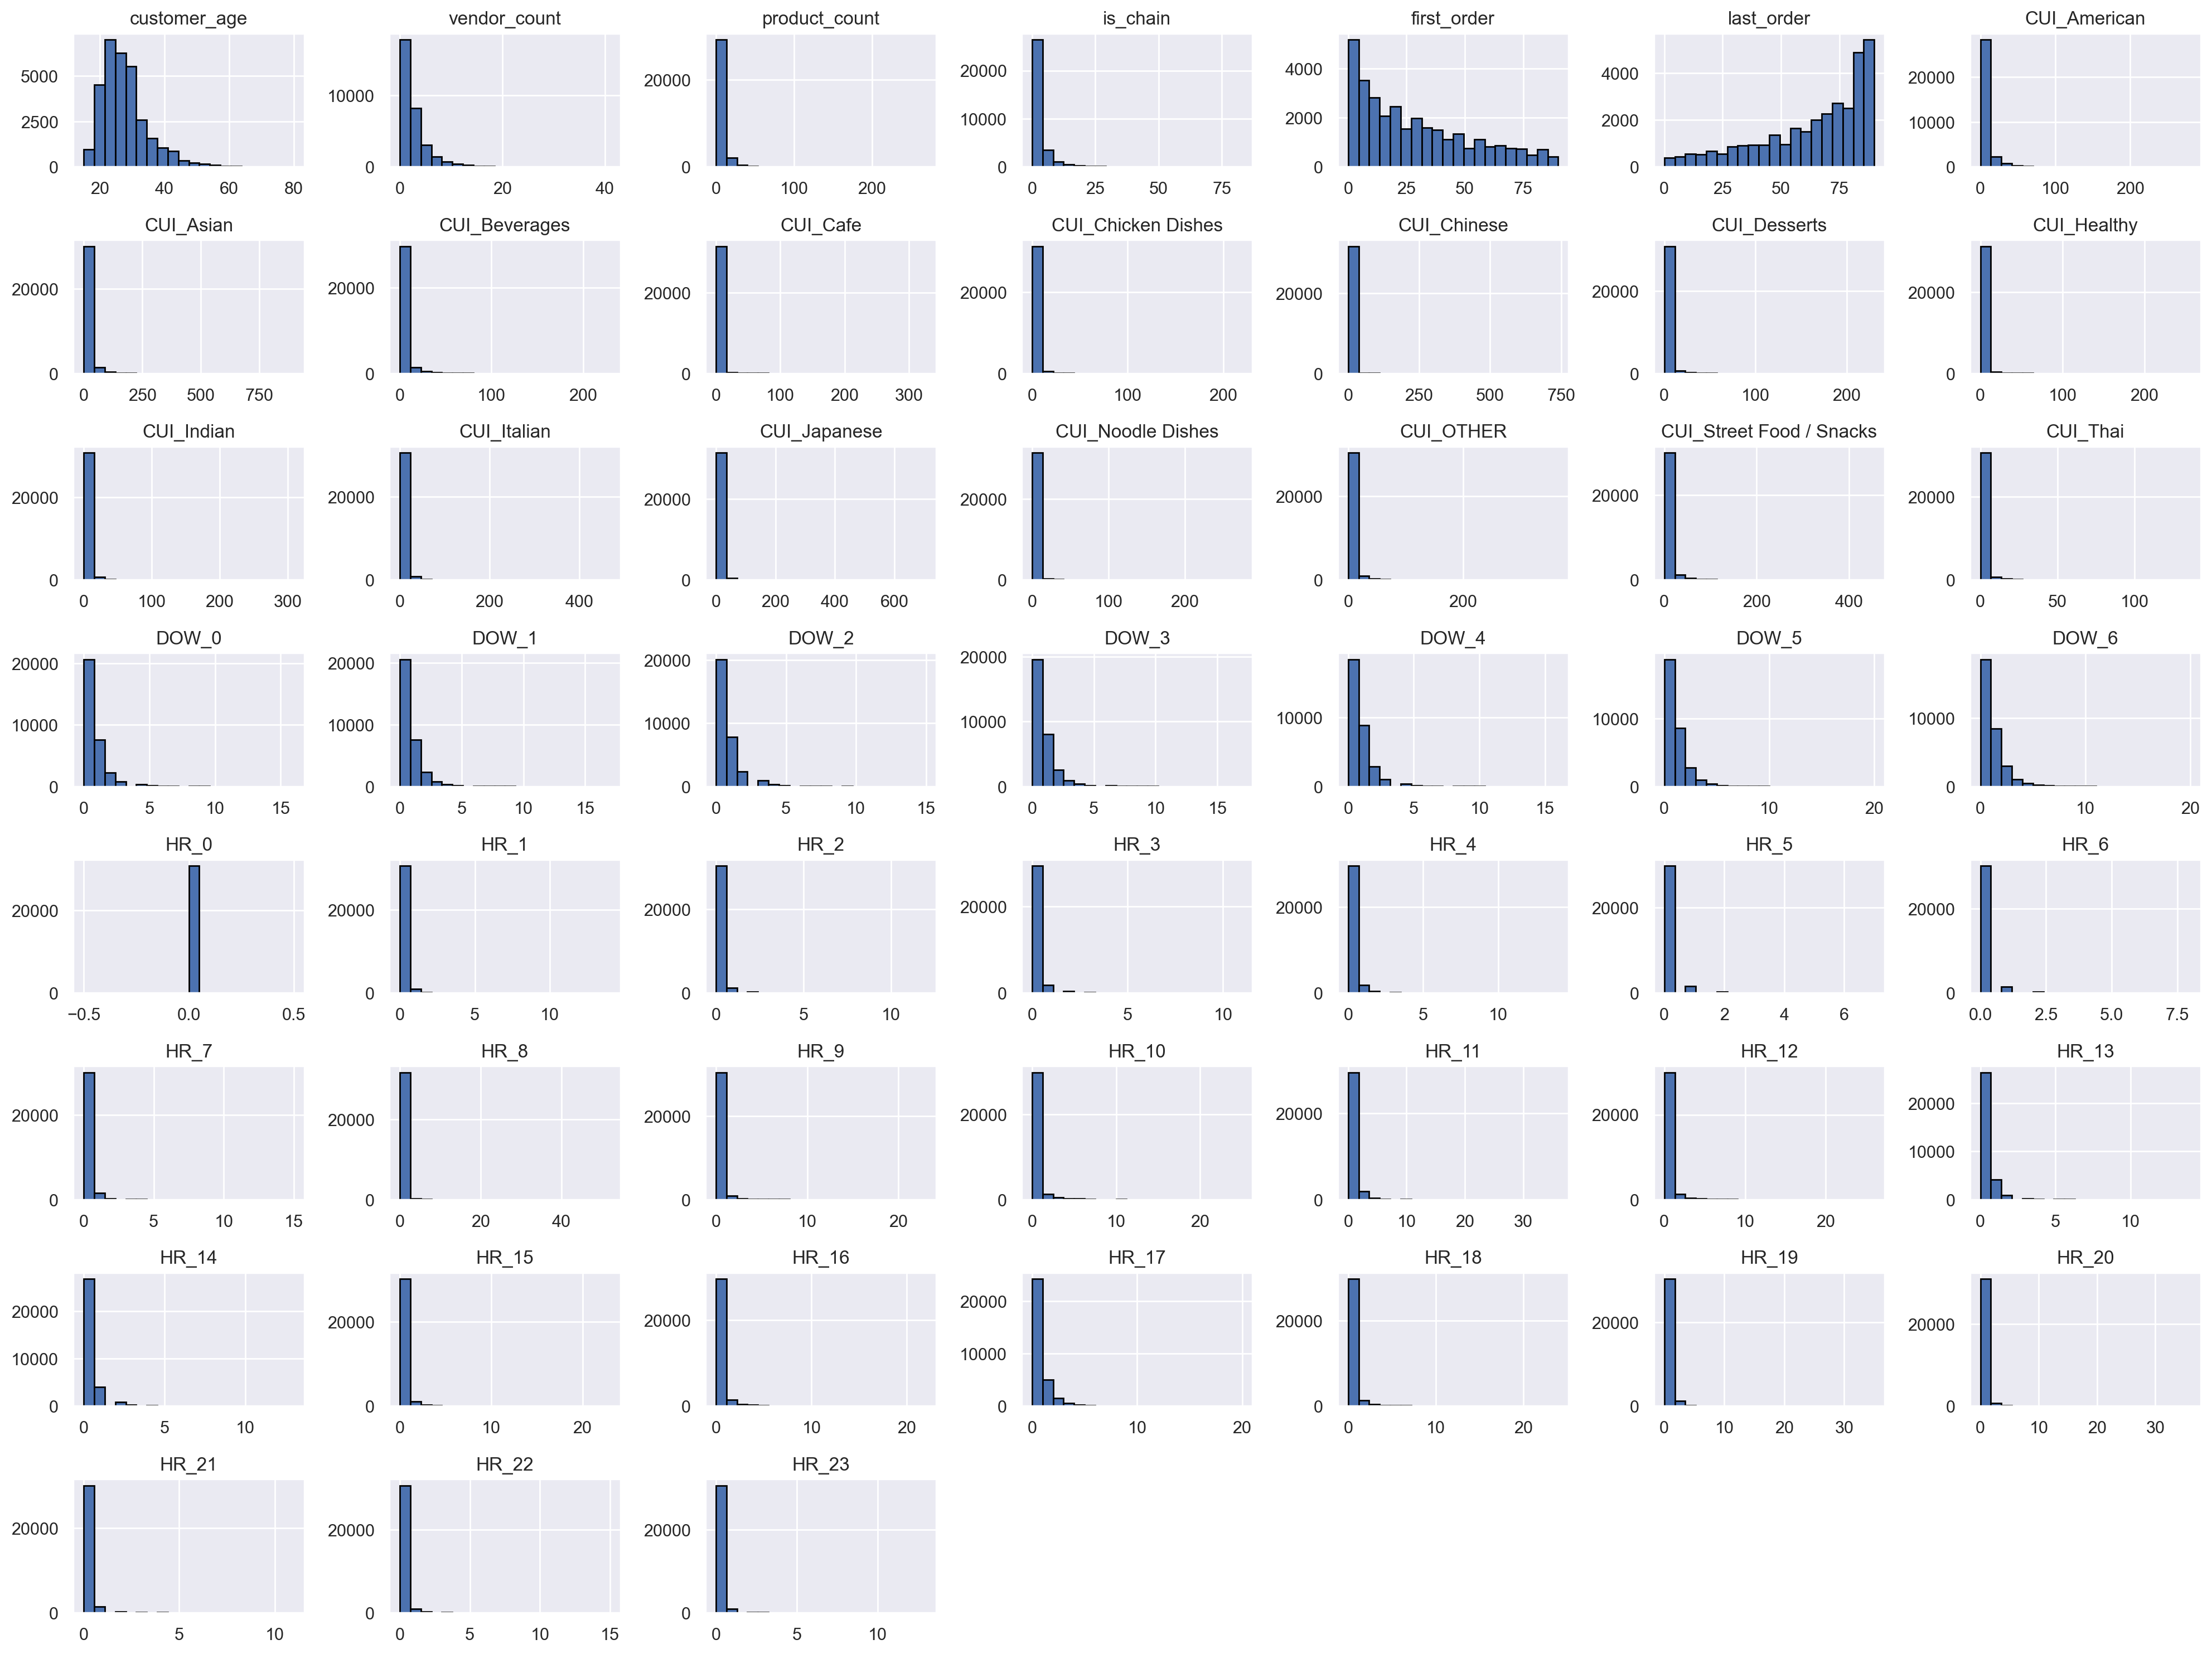

In [158]:
# Select numeric columns from the dataset
numeric_columns = customers.select_dtypes(include=["float64", "int64"]).columns

# Plot histograms for all numeric columns
sns.set()
customers[numeric_columns].hist(bins=20, figsize=(20, 15), edgecolor="black")
plt.tight_layout()
plt.show()

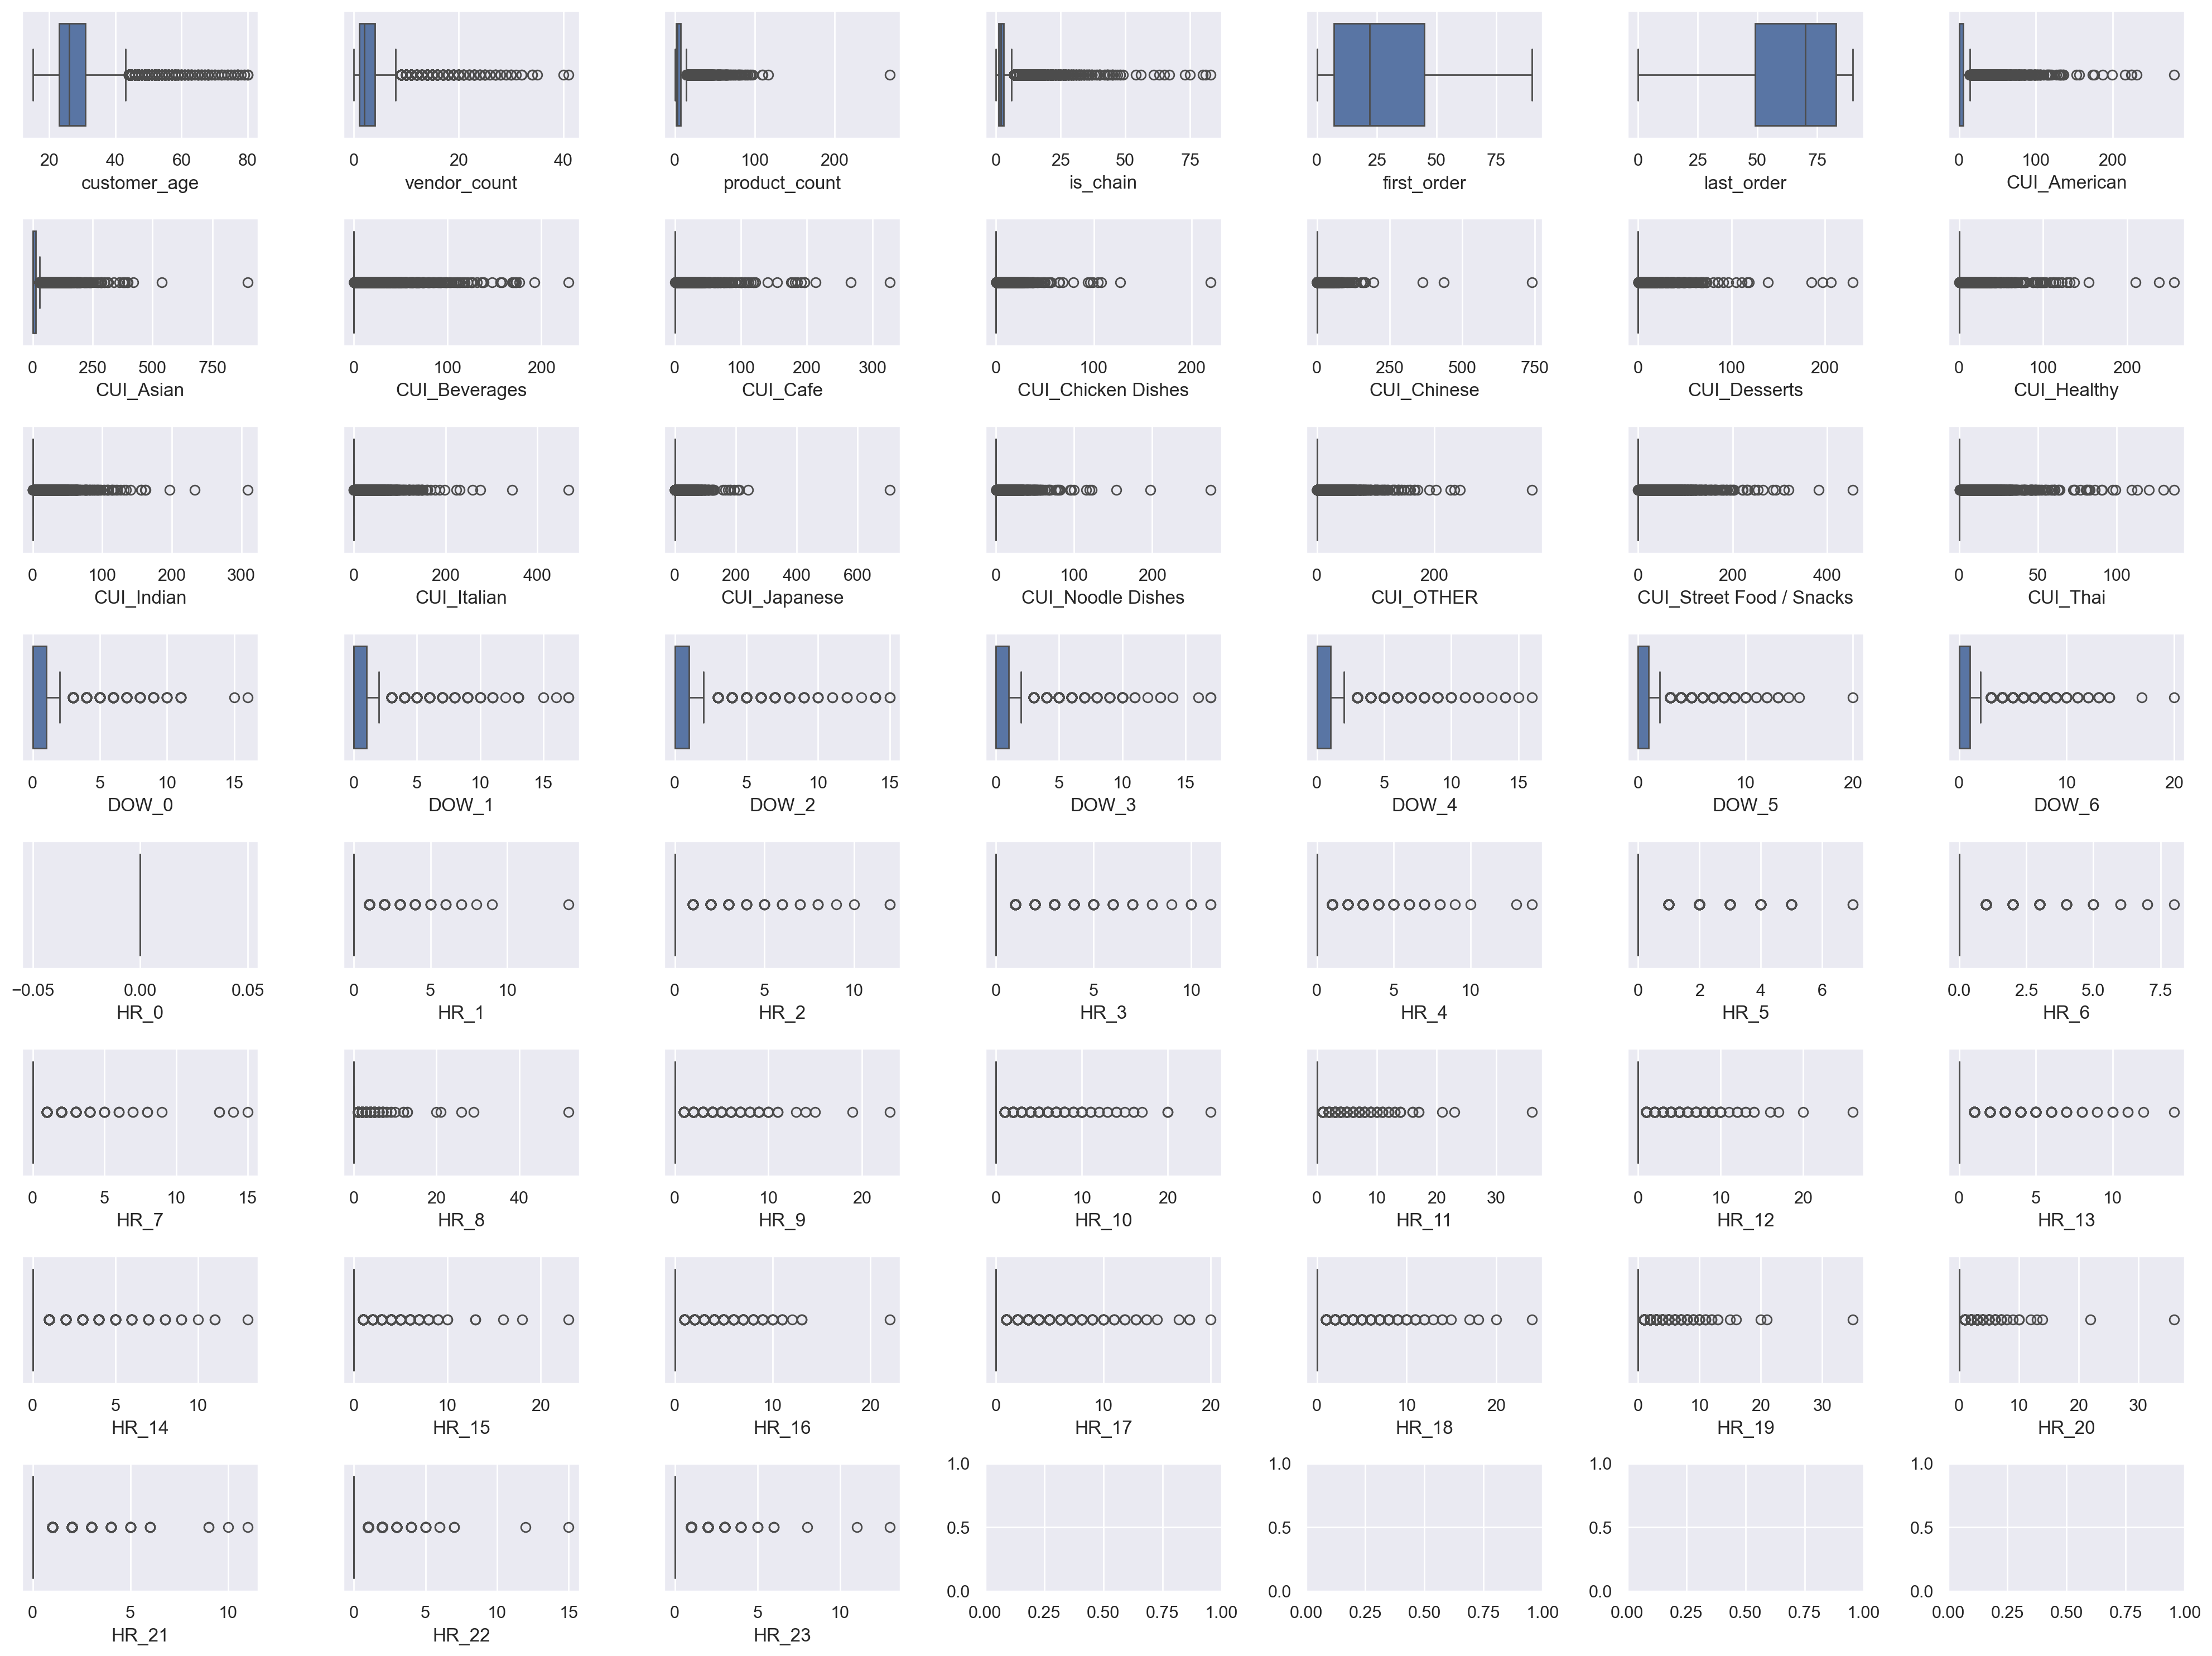

In [159]:
# Plot box plots for all numeric columns

# The code below keeps the 1st time a duplicate appears 
# This is necessary to plot box plots 
customers_no_duplicates = customers[~customers.index.duplicated(keep="first")]

sns.set()
fig, axes = plt.subplots(8, 7, figsize=(20, 15))

for ax, feat in zip(axes.flatten(), numeric_columns): 
    sns.boxplot(x=customers_no_duplicates[feat], ax=ax)

plt.tight_layout()
plt.show()

<a class="anchor" id="2nd-bullet">

##### b. customer_age
    
</a>

In [160]:
age_median = round(customers["customer_age"].median(), 2)
age_mean = round(customers["customer_age"].mean(), 2)
print(f"The customer_age mean ({age_mean}) and median ({age_median}) "
      f"indicate that clients are generally in their mid-20s.")
print(f"The oldest customer is {customers['customer_age'].max()} years old, "
      f"and the youngest is {customers['customer_age'].min()} years old.")

The customer_age mean (27.51) and median (26.0) indicate that clients are generally in their mid-20s.
The oldest customer is 80.0 years old, and the youngest is 15.0 years old.


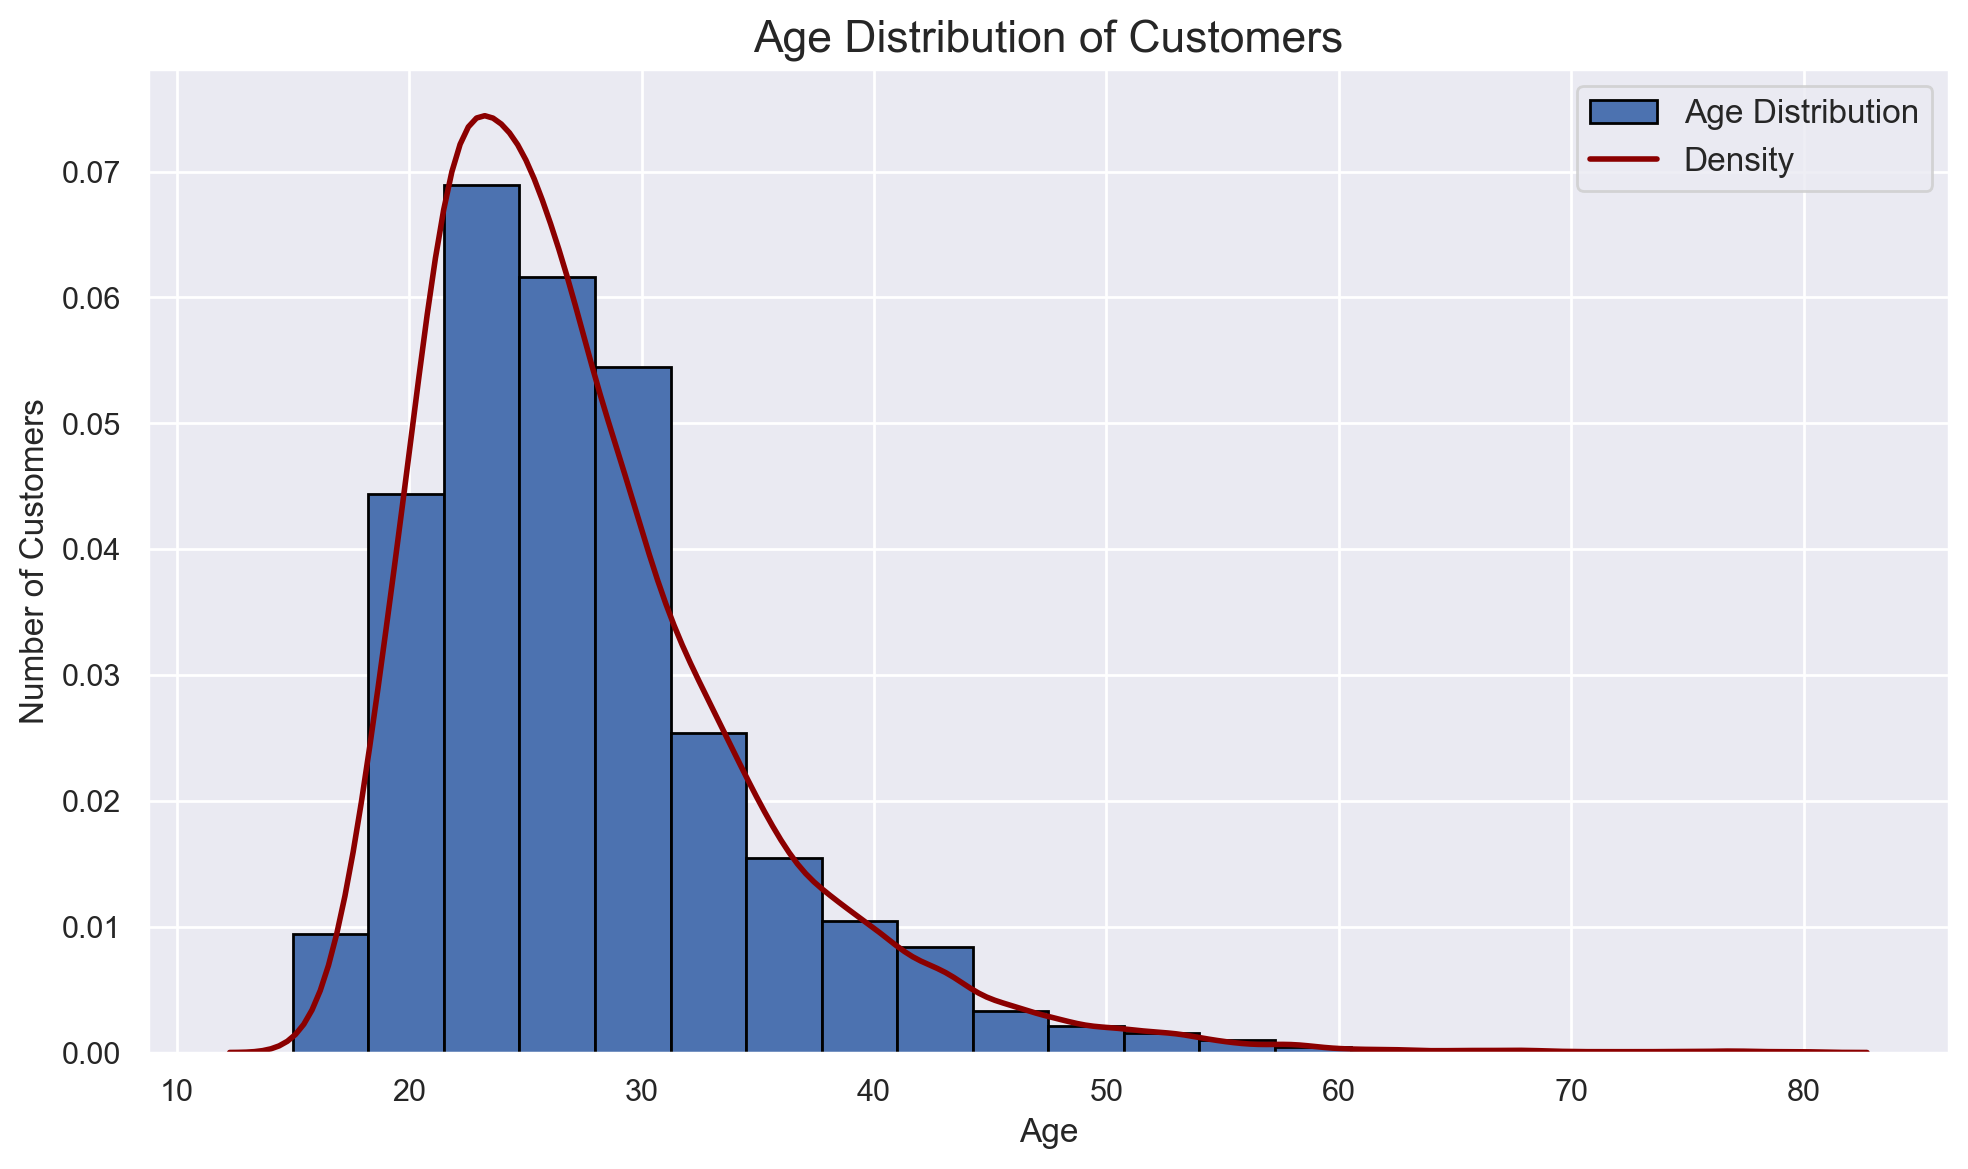

In [161]:
# Plot the histogram & density for customer_age
sns.set()
plt.figure(figsize=(10, 6))
plt.hist(customers["customer_age"], bins=20, edgecolor="black", density=True, label="Age Distribution")
sns.kdeplot(customers["customer_age"], color="darkred", label="Density", linewidth=2)

plt.title("Age Distribution of Customers", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()  
plt.show()

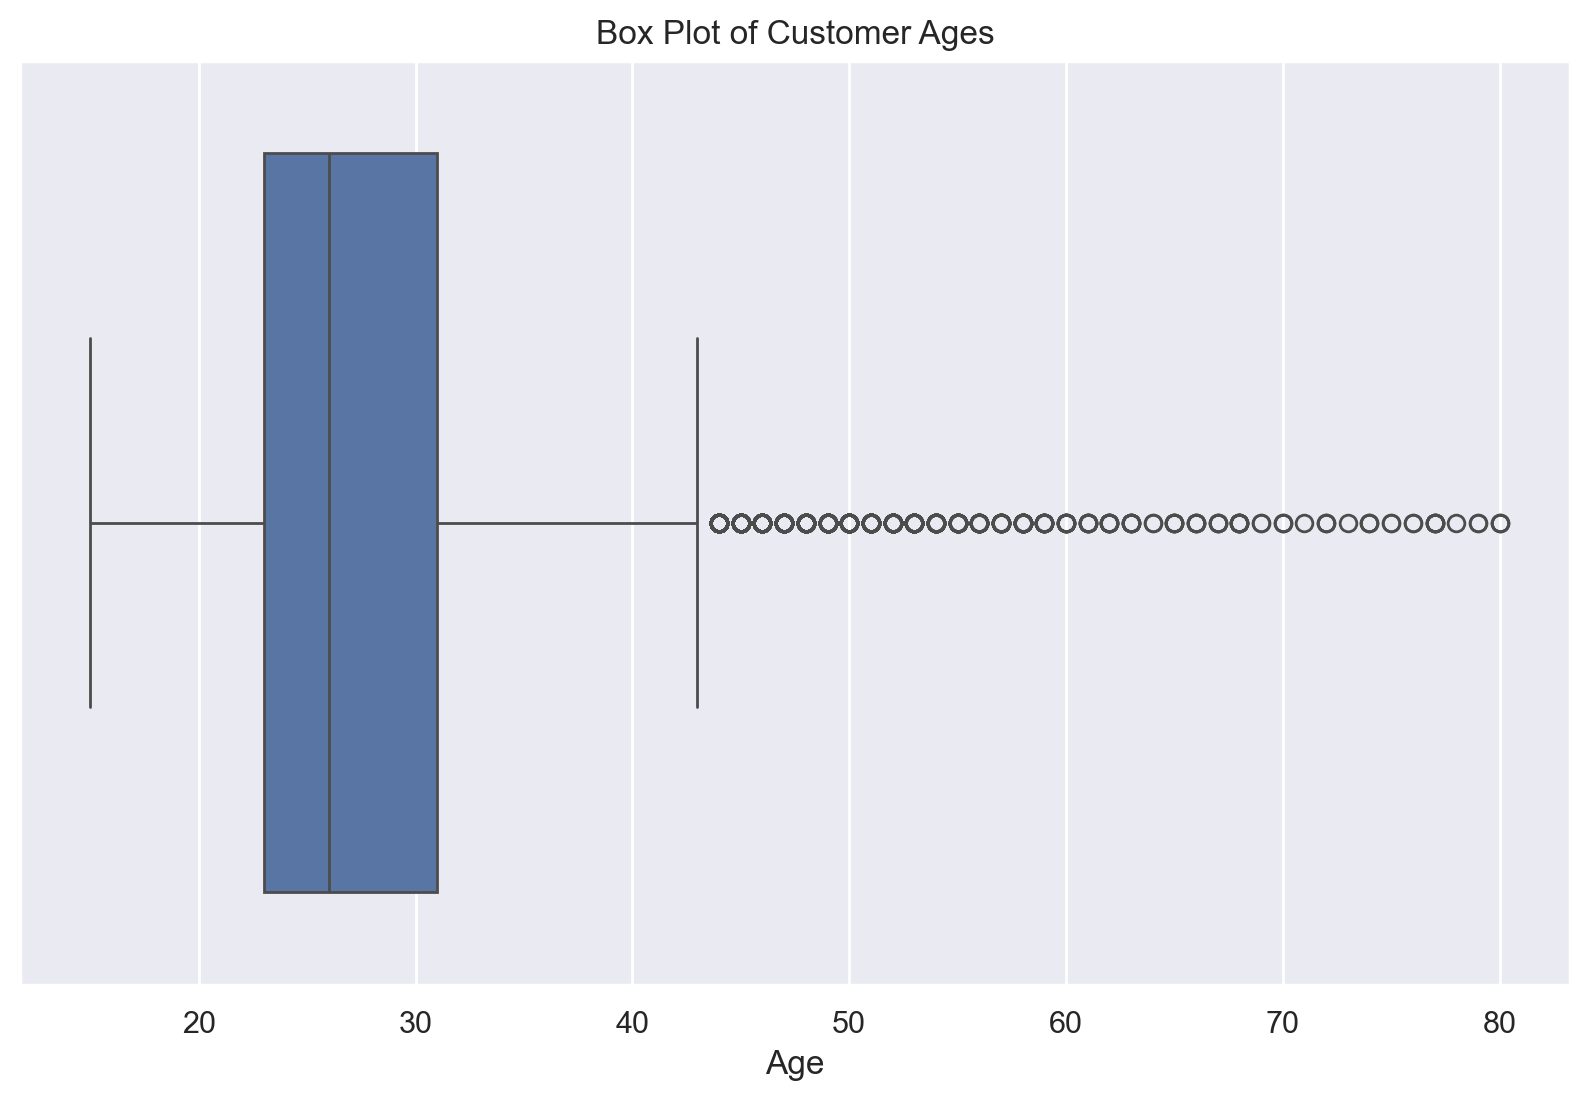

In [162]:
plt.figure(figsize=(10, 6))
# Use customers with no duplicates to plot the box plot
sns.boxplot(x=customers_no_duplicates['customer_age'])
plt.title("Box Plot of Customer Ages")
plt.xlabel("Age")
plt.show()

To get a clearer understanding of the age distribution, age groups can be created by categorizing into bins:
- Teenagers: 15–19 
- Young Adults: 20–29 
- Adults: 30–39 
- Middle-Aged: 40–49 
- Older Adults: 50–59 
- Seniors: 60+ 

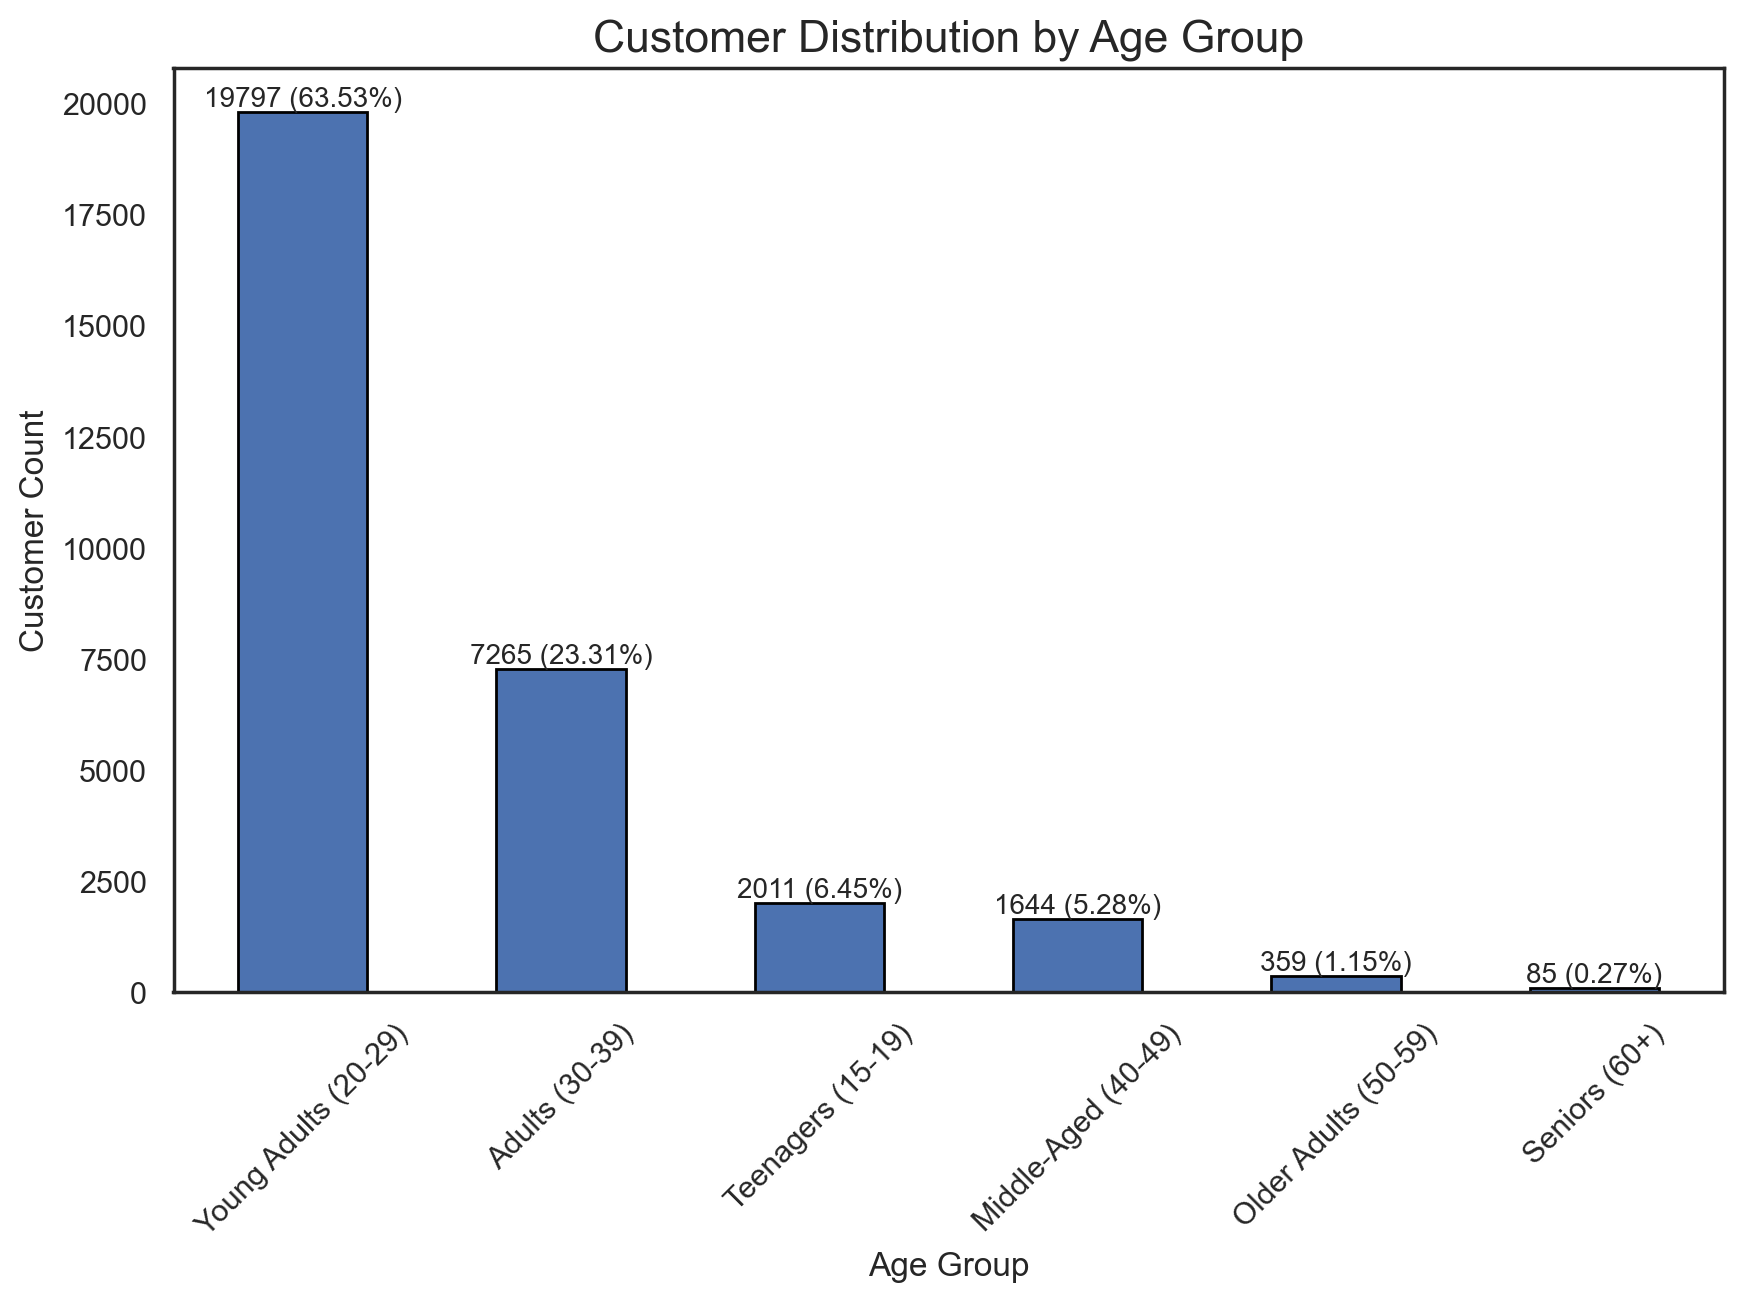

In [163]:
# Define age ranges and their respective labels
age_bins = [14, 19, 29, 39, 49, 59, 100]
age_labels = ["Teenagers (15-19)", "Young Adults (20-29)", "Adults (30-39)", 
              "Middle-Aged (40-49)", "Older Adults (50-59)", "Seniors (60+)"]

# .cut() segments into the bins (age_bins) and assigns to corresponding labels (age_labels)
customers["age_group"] = pd.cut(customers["customer_age"], bins=age_bins, labels=age_labels)
age_group_counts = customers["age_group"].value_counts()
age_group_percent = customers["age_group"].value_counts(normalize=True) * 100

sns.set_style("white")
plt.figure(figsize=(10, 6))

age_group_counts.plot(kind="bar", edgecolor="black")

# Add the count & percentage at the top of each bar 
for index, (count, percent) in enumerate(zip(age_group_counts, age_group_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Customer Distribution by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<a class="anchor" id="2nd-bullet">

##### c. vendor_count
    
</a>

In [164]:
vendor_count_median = round(customers["vendor_count"].median(), 2)
vendor_count_mean = round(customers["vendor_count"].mean(), 2)
print(f"The vendor_count mean ({vendor_count_mean}) and median ({vendor_count_median}) "
      f"indicate that clients generally tend to order from a small amount of vendors.")
print(f"The vendor count ranges from a minimum of {customers['vendor_count'].min()} "
      f"to a maximum of {customers['vendor_count'].max()}.")

The vendor_count mean (3.1) and median (2.0) indicate that clients generally tend to order from a small amount of vendors.
The vendor count ranges from a minimum of 0 to a maximum of 41.


In [165]:
print(f"There are {len(customers[customers['vendor_count']==0])} rows with 0 vendor count, "
      f"which could indicate an error.")

There are 138 rows with 0 vendor count, which could indicate an error.


In [166]:
# These customers seem to just have default information from account creation 
# They can be targeted to make their first transaction
customers[(customers['vendor_count'] == 0) & (customers['product_count'] == 0)]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
c94b288475             8670          26.0             0              0   
f687717dc1             8670          21.0             0              0   
c6cf0b76fb             8670          38.0             0              0   
1b7c34738e             8670          24.0             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
0e60632fe2             8670          23.0             0              0   
28ed1f1e3f             8670          20.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
c94b288475          0          1.0           1   DELIVERY           CASH   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
c6cf0b76fb          0          2.0           2   DELIVERY           CASH   
1b7c34738e          0          3.0           3          -           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1         86.0          86          -           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
0e60632fe2          0         89.0          89   DISCOUNT           CARD   
28ed1f1e3f          0         89.0          89   DELIVERY           DIGI   
4c06e104de          1         89.0          89          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
4903041977            0.0        0.0            0.0       0.0   
c94b288475            0.0        0.0            0.0       0.0   
f687717dc1            0.0        0.0            0.0       0.0   
c6cf0b76fb            0.0        0.0            0.0       0.0   
1b7c34738e            0.0        0.0            0.0       0.0   
...                   ...        ...            ...       ...   
177ede2420            0.0        0.0            0.0       0.0   
0039059c9c            0.0        0.0            0.0       0.0   
0e60632fe2            0.0        0.0            0.0       0.0   
28ed1f1e3f            0.0        0.0            0.0       0.0   
4c06e104de            0.0        0.0            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
4903041977                  0.0          0.0           0.0          0.0   
c94b288475                  0.0          0.0           0.0          0.0   
f687717dc1                  0.0          0.0           0.0          0.0   
c6cf0b76fb                  0.0          0.0           0.0          0.0   
1b7c34738e                  0.0          0.0           0.0          0.0   
...                         ...          ...           ...          ...   
177ede2420                  0.0          0.0           0.0          0.0   
0039059c9c                  0.0          0.0           0.0          0.0   
0e60632fe2                  0.0          0.0           0.0          0.0   
28ed1f1e3f                  0.0          0.0           0.0          0.0   
4c06e104de                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
4903041977          0.0          0.0           0.0                0.0   
c94b288475         

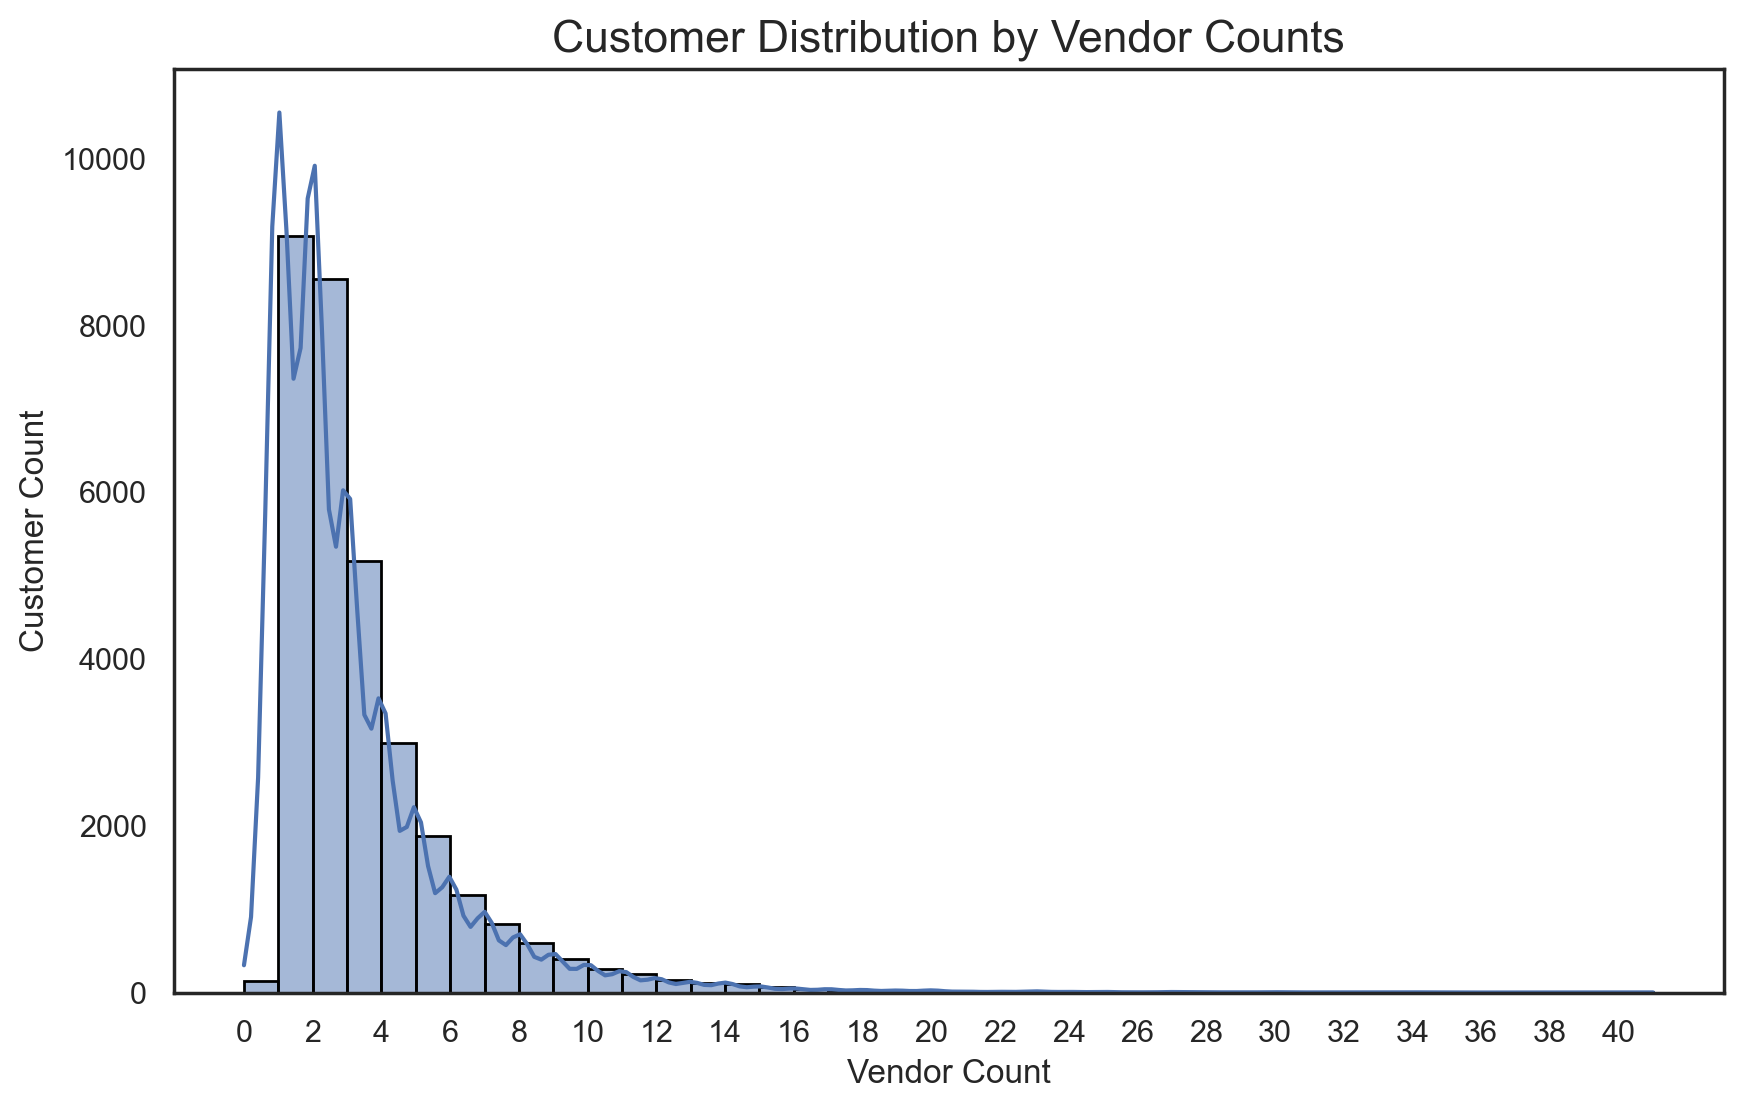

In [167]:
sns.set_style("white")
plt.figure(figsize=(10, 6))

# Set kde to True to get the Kernel Density Estimate
# This shows the underlying distribution of the data
sns.histplot(customers["vendor_count"], bins=41, kde=True, edgecolor="black")

plt.title("Customer Distribution by Vendor Counts", fontsize=16)
plt.xlabel("Vendor Count", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)

# create an array of tick positions starting from 0 to the max value of "vendor_count with intervals  of 2
tick_positions = np.arange(0, customers["vendor_count"].max() + 1, 2)
plt.xticks(tick_positions)

plt.show()

As previously mentioned, customers have low vendor counts, with a large peak around 1-3 vendors. This could suggest that customers exhibit brand loyalty or preference for specific vendors. Additionally, a small group of customers order from a larger variety of vendors, suggesting a preference for exploration or diverse tastes. 

Thus, it possible to categorise customers based on their vendor count:
- Low Diversity: 1–2 vendors
- Moderate Diversity: 3–5 vendors
- High Diversity: 6 or more vendors

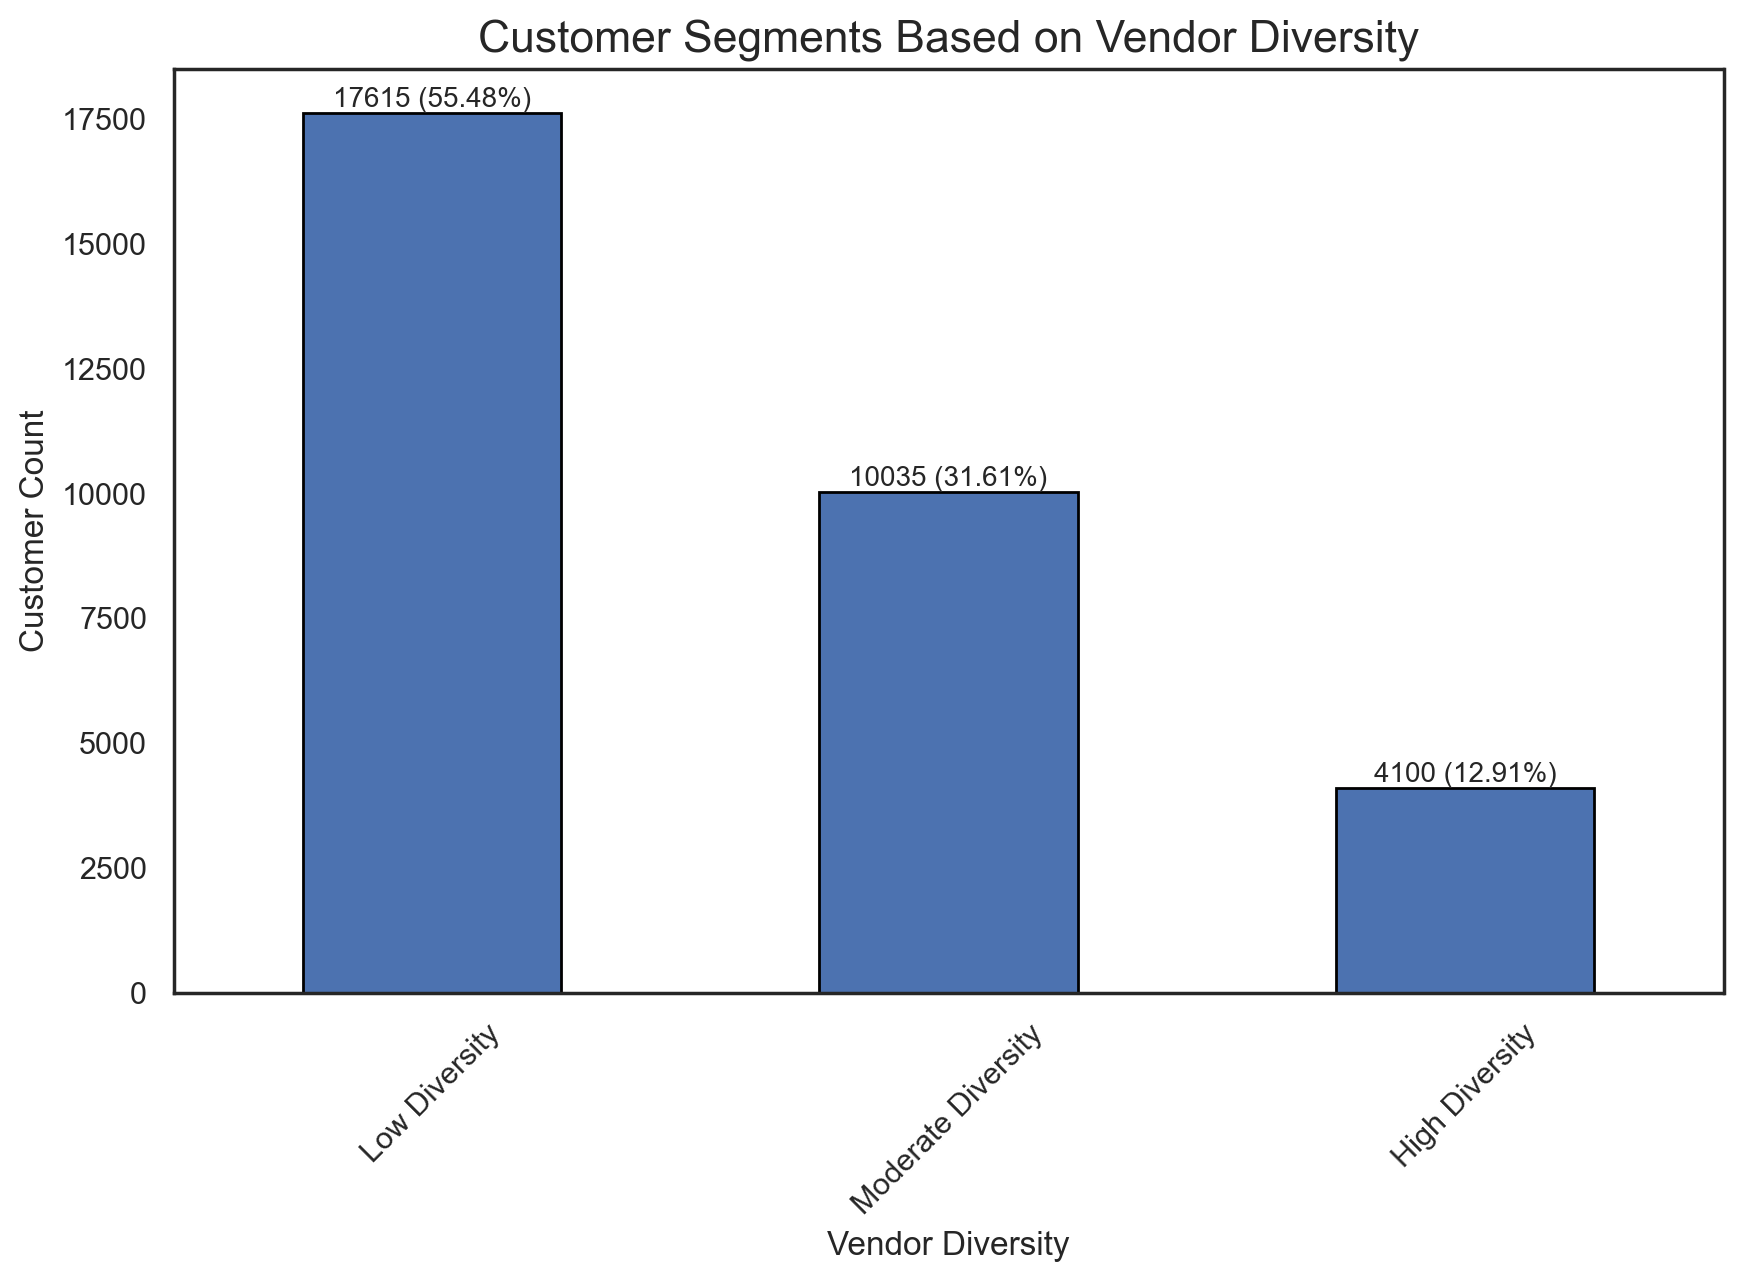

In [168]:
# Define vendor diversity categories

vendor_bins = [0, 2, 5, customers["vendor_count"].max() + 1] # +1 to include the last value
vendor_labels = ["Low Diversity", "Moderate Diversity", "High Diversity"]

# .cut() segments into the bins (vendor_bins) and assigns to corresponding labels (vendor_labels)
customers["vendor_diversity"] = pd.cut(customers["vendor_count"], bins=vendor_bins, labels=vendor_labels)
diversity_counts = customers["vendor_diversity"].value_counts()
diversity_percent = customers["vendor_diversity"].value_counts(normalize=True) * 100

sns.set_style("white")
plt.figure(figsize=(10, 6))
diversity_counts.plot(kind="bar", edgecolor="black")

# Add the count & percentage at the top of each bar 
for index, (count, percent) in enumerate(zip(diversity_counts, diversity_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Customer Segments Based on Vendor Diversity", fontsize=16)
plt.xlabel("Vendor Diversity", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)

plt.show()

<a class="anchor" id="2nd-bullet">

##### d. product_count
    
</a>

In [169]:
product_count_median = round(customers["product_count"].median(), 2)
product_count_mean = round(customers["product_count"].mean(), 2)
print(f"The product_count mean ({product_count_mean}) and median ({product_count_median}) "
      f"indicate that clients generally tend to purchase a modest number of products.")
print(f"The product count ranges from a minimum of {customers['product_count'].min()} "
      f"to a maximum of {customers['product_count'].max()}.")

The product_count mean (5.67) and median (3.0) indicate that clients generally tend to purchase a modest number of products.
The product count ranges from a minimum of 0 to a maximum of 269.


In [170]:
print(f"There are {len(customers[customers['product_count']==0])} rows with 0 product count, "
      f"which could indicate an error.")

There are 156 rows with 0 product count, which could indicate an error.


In [171]:
print(f"There are {len(customers[(customers['product_count']==0) & (customers['vendor_count']>0)])} rows with product count 0 but vendor count above 0.")
customers[(customers['product_count']==0) & (customers['vendor_count']>0)]

# Vendor_count is always 1 and these customers are in the same region
# This could indicate that it is the same restaurant

There are 18 rows with product count 0 but vendor count above 0.


customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
aed85972bb             4660          27.0             1              0   
b2ebe2e6e0             4660          43.0             1              0   
6f723d9894             4660          36.0             1              0   
9d74f2ac81             4660          27.0             1              0   
27b7eed8fa             4660          35.0             1              0   
6c9e68b2e7             4660          22.0             1              0   
c0b330c4df             4660          27.0             1              0   
68c4faeecb             4660          25.0             1              0   
48e8abd5bf             4660          34.0             1              0   
7bfc19bd89             4660          21.0             1              0   
a8db558a22             4660          26.0             1              0   
85df5faf5f             4660          43.0             1              0   
eab40fe900             4660          32.0             1              0   
1627baf46d             4660          23.0             1              0   
bef195917e             4660          26.0             1              0   
75aa64f1f1             4660          28.0             1              0   
eb83bc9600             4660          28.0             1              0   
8d21b0b83c             4660          30.0             1              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
aed85972bb          0          6.0           6   DISCOUNT           CARD   
b2ebe2e6e0          0          6.0           6          -           CARD   
6f723d9894          0         13.0          13   DELIVERY           CASH   
9d74f2ac81          0         19.0          19   DELIVERY           CARD   
27b7eed8fa          0         20.0          20   DISCOUNT           DIGI   
6c9e68b2e7          0         20.0          20   DISCOUNT           DIGI   
c0b330c4df          0         23.0          23   DELIVERY           CARD   
68c4faeecb          0         26.0          26    FREEBIE           DIGI   
48e8abd5bf          0         33.0          33   DELIVERY           CASH   
7bfc19bd89          0         42.0          42   DISCOUNT           DIGI   
a8db558a22          0         60.0          60          -           CARD   
85df5faf5f          0         65.0          65   DISCOUNT           CARD   
eab40fe900          0         73.0          73   DELIVERY           CARD   
1627baf46d          0         76.0          76          -           DIGI   
bef195917e          0         84.0          84   DELIVERY           CARD   
75aa64f1f1          0         85.0          85          -           CASH   
eb83bc9600          0         86.0          86   DELIVERY           CARD   
8d21b0b83c          0         89.0          89   DELIVERY           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
aed85972bb           0.00       0.00            0.0       0.0   
b2ebe2e6e0           0.00       0.00            0.0       0.0   
6f723d9894           0.00       0.00            0.0       0.0   
9d74f2ac81           0.00       0.00            0.0       0.0   
27b7eed8fa           0.00       0.00            0.0       0.0   
6c9e68b2e7           0.00       0.00            0.0       0.0   
c0b330c4df           0.00       0.00            0.0       0.0   
68c4faeecb           0.00       0.00            0.0       0.0   
48e8abd5bf           0.00       0.00            0.0       0.0   
7bfc19bd89           0.00       0.00            0.0       0.0   
a8db558a22           0.00       0.00            0.0       0.0   
85df5faf5f           0.00       0.00            0.0       0.0   
eab40fe900           0.00       0.00            0.0       0.0   
1627baf46d           0.00      19.1

In [172]:
print(f"As the mean is {product_count_mean}, and the standard deviation is "
      f"{round(customers['product_count'].std(), 2)}, having a maximum value of "
      f"{customers['product_count'].max()} appears to be an outlier, as it significantly "
      f"deviate from the typical range of values.")

As the mean is 5.67, and the standard deviation is 6.96, having a maximum value of 269 appears to be an outlier, as it significantly deviate from the typical range of values.


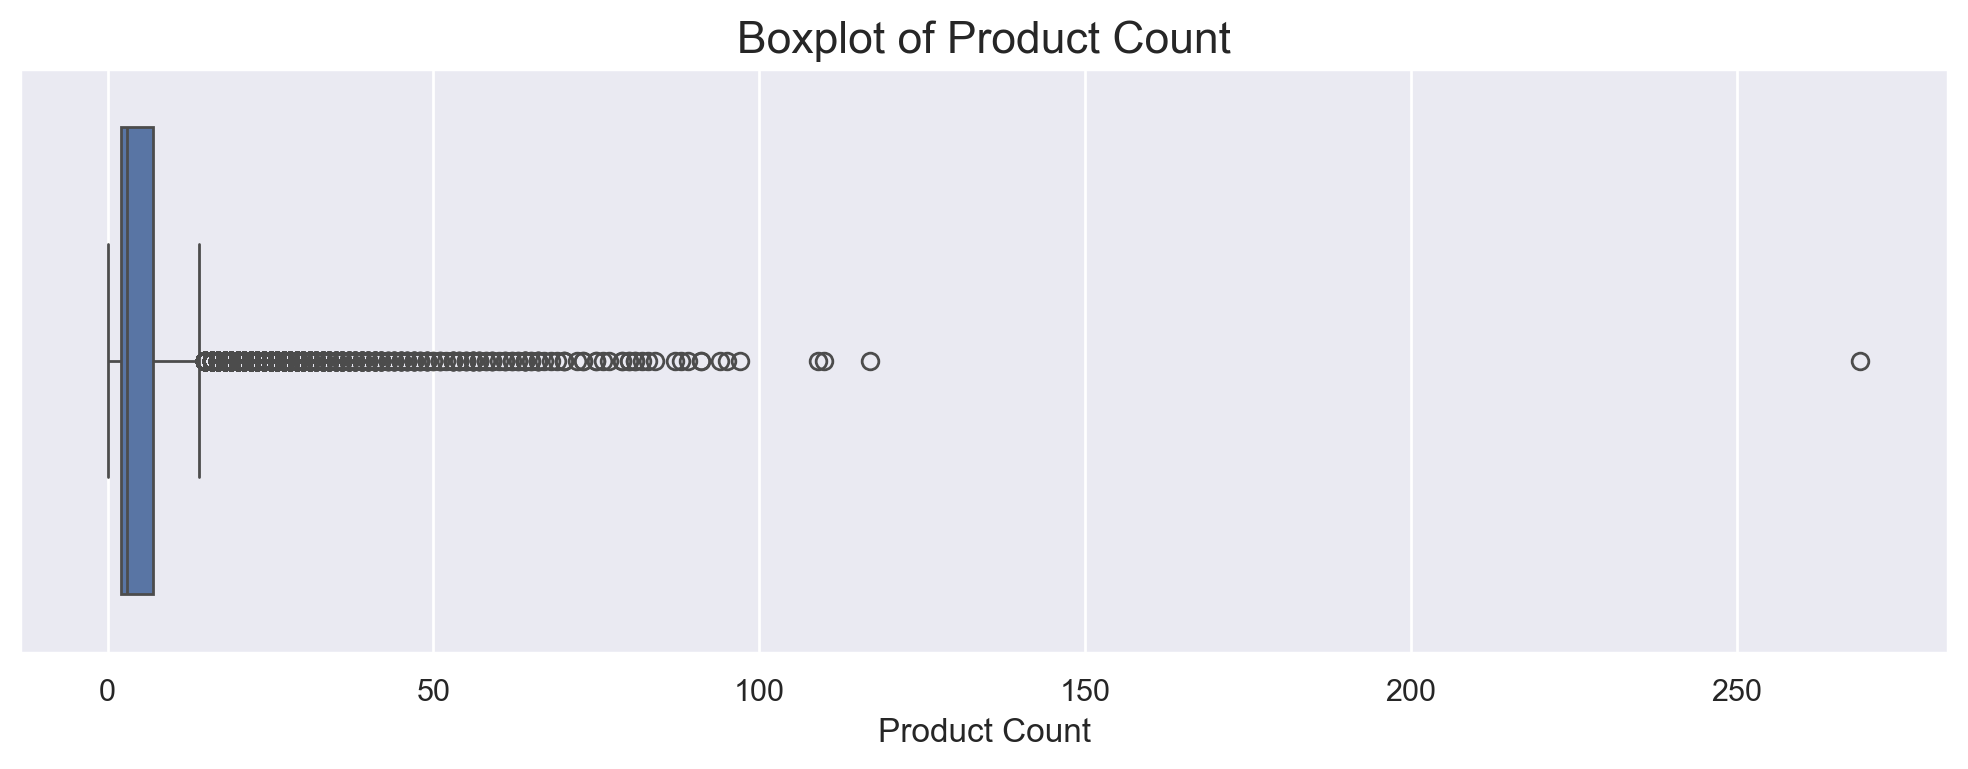

In [173]:
# Create a boxplot for product_count to visualize the distribution and outliers
sns.set()
plt.figure(figsize=(10, 4))
sns.boxplot(x=customers['product_count'], vert=False)

plt.title('Boxplot of Product Count', fontsize=16)
plt.xlabel('Product Count', fontsize=12)

plt.tight_layout()
plt.show()

In [174]:
# Get all customers that have ordered above 100 products
possible_outliers = customers["product_count"][customers["product_count"]>100]

print(possible_outliers)
print(f"There are {possible_outliers.count()} possible outliers, if assumed that a customer "
      f"doesn't order above 100 products")

customer_id
89b7866691    110
910e70571d    117
92ced2dcb9    269
d798652ec0    109
Name: product_count, dtype: int64
There are 4 possible outliers, if assumed that a customer doesn't order above 100 products


In [175]:
customers[customers["product_count"]>100]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
89b7866691             2360          20.0            41            110   
910e70571d             4660          41.0            18            117   
92ced2dcb9             2360          23.0            40            269   
d798652ec0             2360          28.0            27            109   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
89b7866691         73          0.0          88   DELIVERY           DIGI   
910e70571d         26          0.0          88          -           CARD   
92ced2dcb9         81          0.0          88          -           CARD   
d798652ec0         83          1.0          89          -           CARD   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
89b7866691          33.25       0.00          46.60      4.74   
910e70571d         104.95      14.44           0.00     21.70   
92ced2dcb9          19.08      70.01          37.92     18.30   
d798652ec0           2.57      28.41         229.22      2.86   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
89b7866691                12.06         6.08         10.19        13.97   
910e70571d                 0.00         0.00          0.00         7.71   
92ced2dcb9                 0.00       739.73          0.00         0.00   
d798652ec0                 0.00         2.84         10.34        58.29   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
89b7866691         0.00         1.25         15.35               5.55   
910e70571d        28.13       109.05          0.00               0.00   
92ced2dcb9         0.00        20.11         84.05             197.84   
d798652ec0        10.43         2.27          0.00               0.00   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
89b7866691      202.54                      1.30      9.89      6     15   
910e70571d      243.18                      0.00     59.20     11     13   
92ced2dcb9      109.31                     12.34    109.64     15     17   
d798652ec0       79.47                      7.44      0.00     16     17   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
89b7866691      15     11      8     13     14   0.0     1     0     1     1   
910e70571d      14     17     11     12     12   0.0     0     0     0     0   
92ced2dcb9      14     10      9      9     20   0.0     0     0     0     0   
d798652ec0      10     17     15      8      8   0.0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
89b7866691      0     0     0     1     3      4      0      0      1      5   
910e70571d      0     0     0     0     1      4     21      9      4      1   
92ced2dcb9      0     0     0     0     1      3      9     12      3      4   
d798652ec0      0     0     2     2     2      8     13     17     12      6   

             HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  \
customer_id                                                                  
89b7866691      16     22      8      6      4      4      1      1      3   
910e70571d       1      6      9     24     10      0      0      0      0   
92ced2dcb9       3      8     14      7     15      9      2      2      2   
d798652ec0       7  

In [176]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = customers["product_count"].quantile(0.25)
Q3 = customers["product_count"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the upper outlier boundary
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound: {upper_bound}")

Upper bound: 14.5


Calculating the upper bound using the IQR provides a statistical threshold for detecting outliers. However, the upper bound of 14.5 may not be of real usage, as a count of 14.5 products per customer is fairly possible. The values around this threshold could still be considered typical rather than outliers.

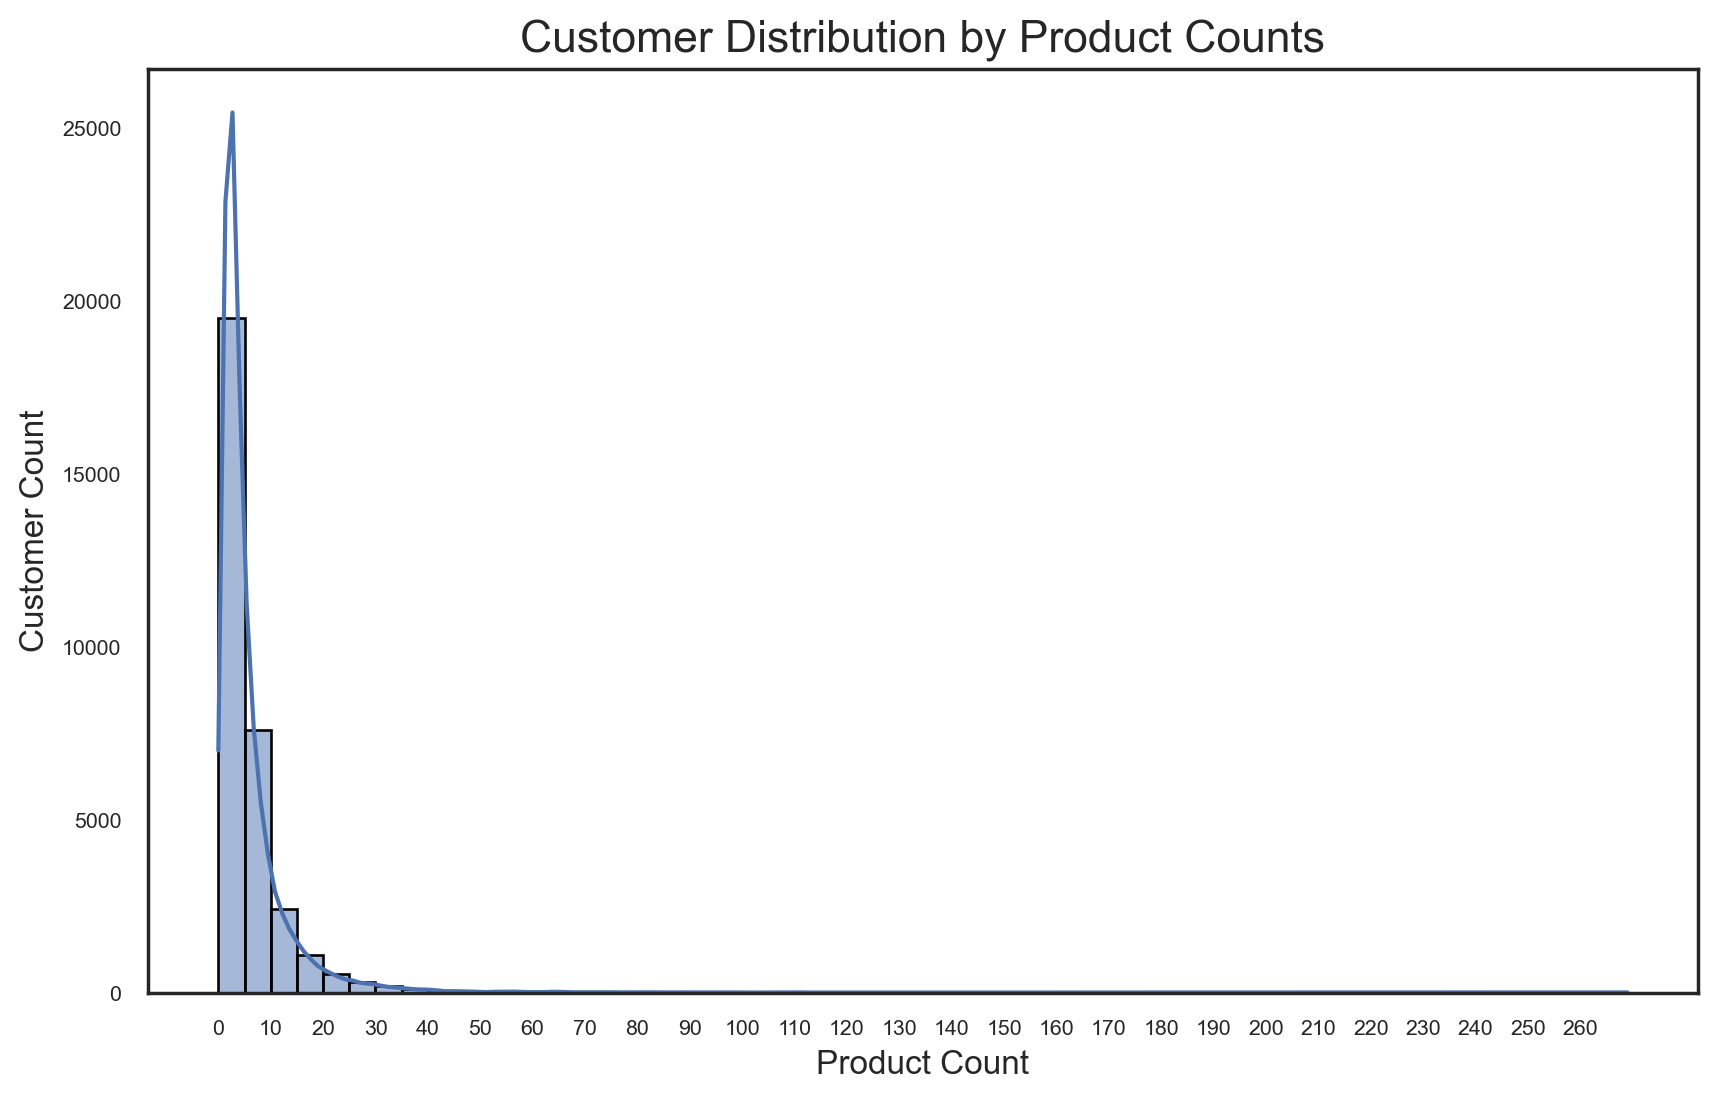

In [177]:
sns.set(font_scale=0.7)
sns.set_style("white")
plt.figure(figsize=(10, 6))

# Arrange bins starting from 0 to the max value + 1 with intervals of 5
bin_edges2 = np.arange(0, customers["product_count"].max() + 1, 5)
sns.histplot(customers["product_count"], bins=bin_edges2, kde=True, edgecolor="black")

plt.title("Customer Distribution by Product Counts", fontsize=16)
plt.xlabel("Product Count", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)

# Set tick positions with increments of 10
tick_positions2 = np.arange(0, customers["product_count"].max() + 1, 10)
plt.xticks(tick_positions2)

plt.show()

<a class="anchor" id="2nd-bullet">

##### e. is_chain
    
</a>

In [178]:
chain_value_median = round(customers["is_chain"].median(), 2)
chain_value_mean = round(customers["is_chain"].mean(), 2)
print(f"The is_chain mean is {chain_value_mean} and median is {chain_value_median}.\n"
      f"is_chain ranges from a minimum of {customers['is_chain'].min()} to a maximum of {customers['is_chain'].max()}.")

The is_chain mean is 2.82 and median is 2.0.
is_chain ranges from a minimum of 0 to a maximum of 83.


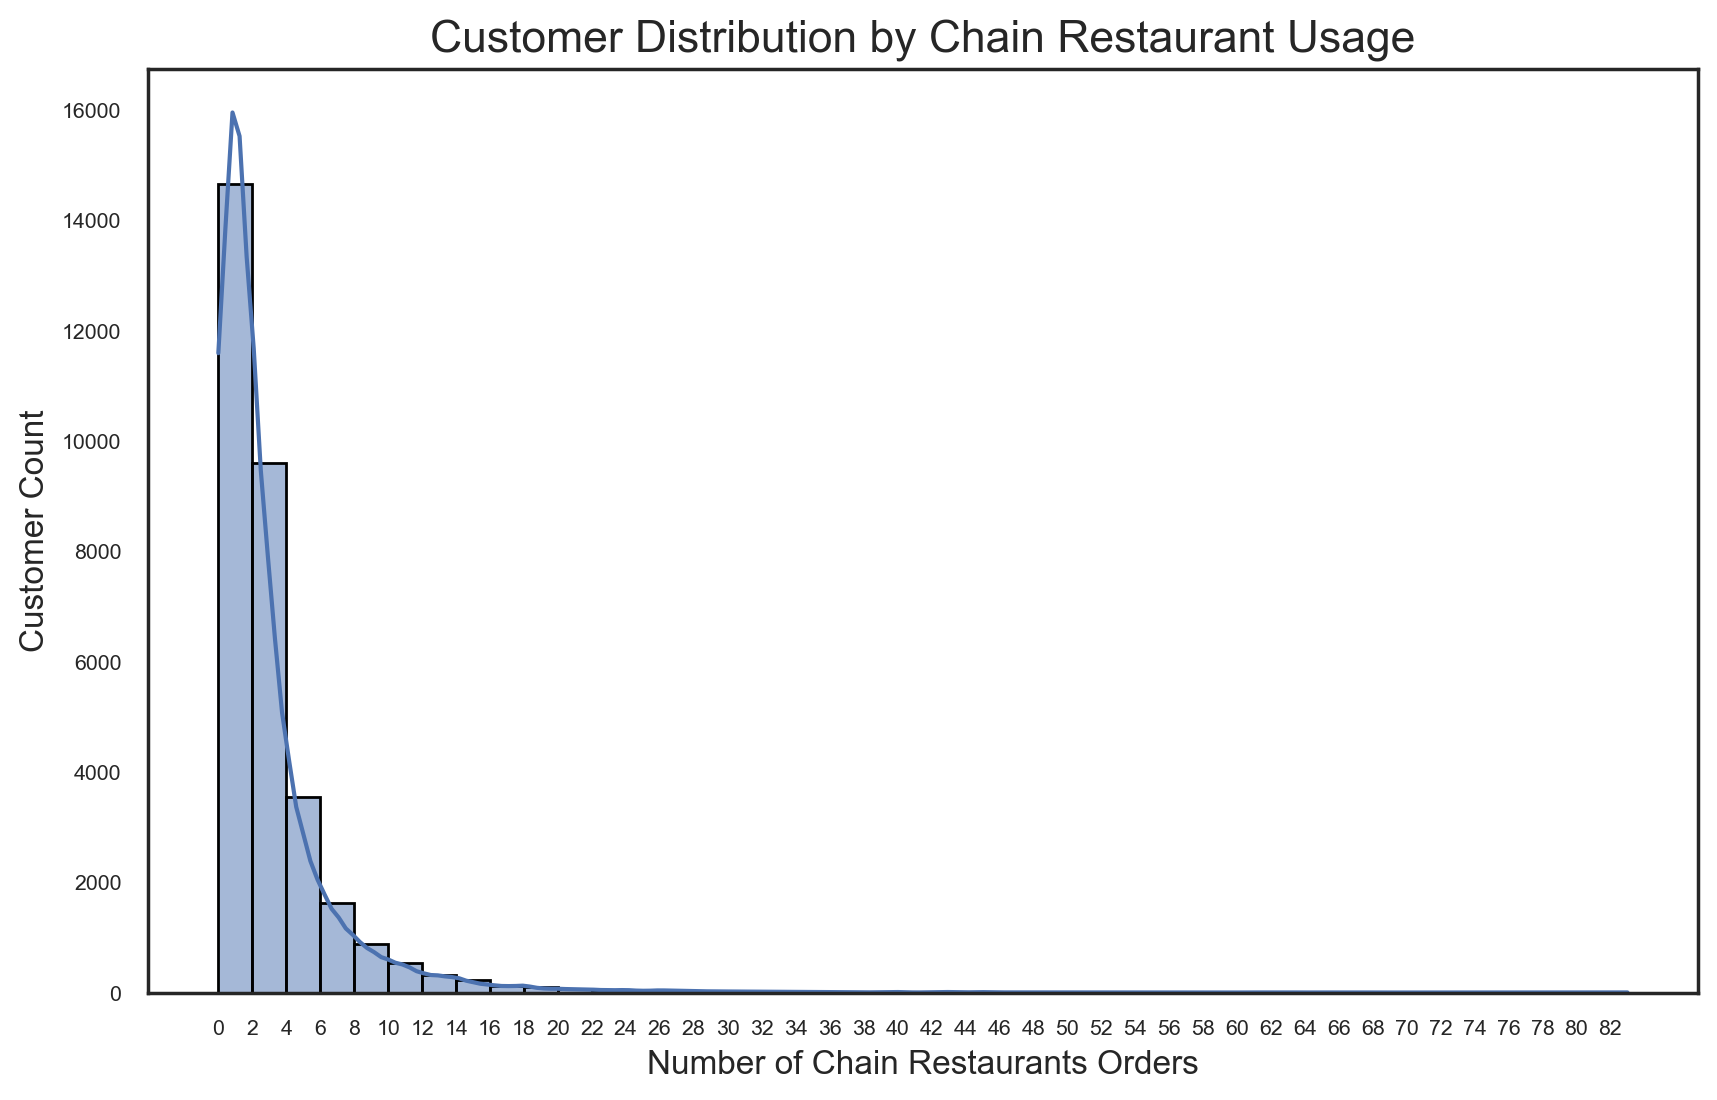

In [179]:
sns.set(font_scale=0.7)
sns.set_style("white")
plt.figure(figsize=(10, 6))

# Arrange bins starting from 0 to the max value + 1 with intervals of 2
bin_edges3 = np.arange(0, customers["is_chain"].max() + 1, 2)
sns.histplot(customers["is_chain"], bins=bin_edges3, kde=True, edgecolor="black")

plt.title("Customer Distribution by Chain Restaurant Usage", fontsize=16)
plt.xlabel("Number of Chain Restaurants Orders", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)

# Set tick positions with increments of 2
tick_positions3 = np.arange(0, customers["is_chain"].max() + 1, 2)
plt.xticks(tick_positions3)

plt.show()

CC: The is_chain variable represents the frequency of orders from chain restaurants by customers. However, its value alone provides limited insight without knowing each customer’s total number of orders. Calculating the total order count would allow for a better understanding of whether customers tend to favor chain restaurant or not.

<a class="anchor" id="2nd-bullet">

##### f. first_order & last_order
    
</a>

A distribution over a 90-day period, without knowing the specific timeframe, can only serve as a relative measure. This variable reflects customer retention rather than engagement; a large gap between a customer’s first and last order likely indicates recurring use of the service over time.

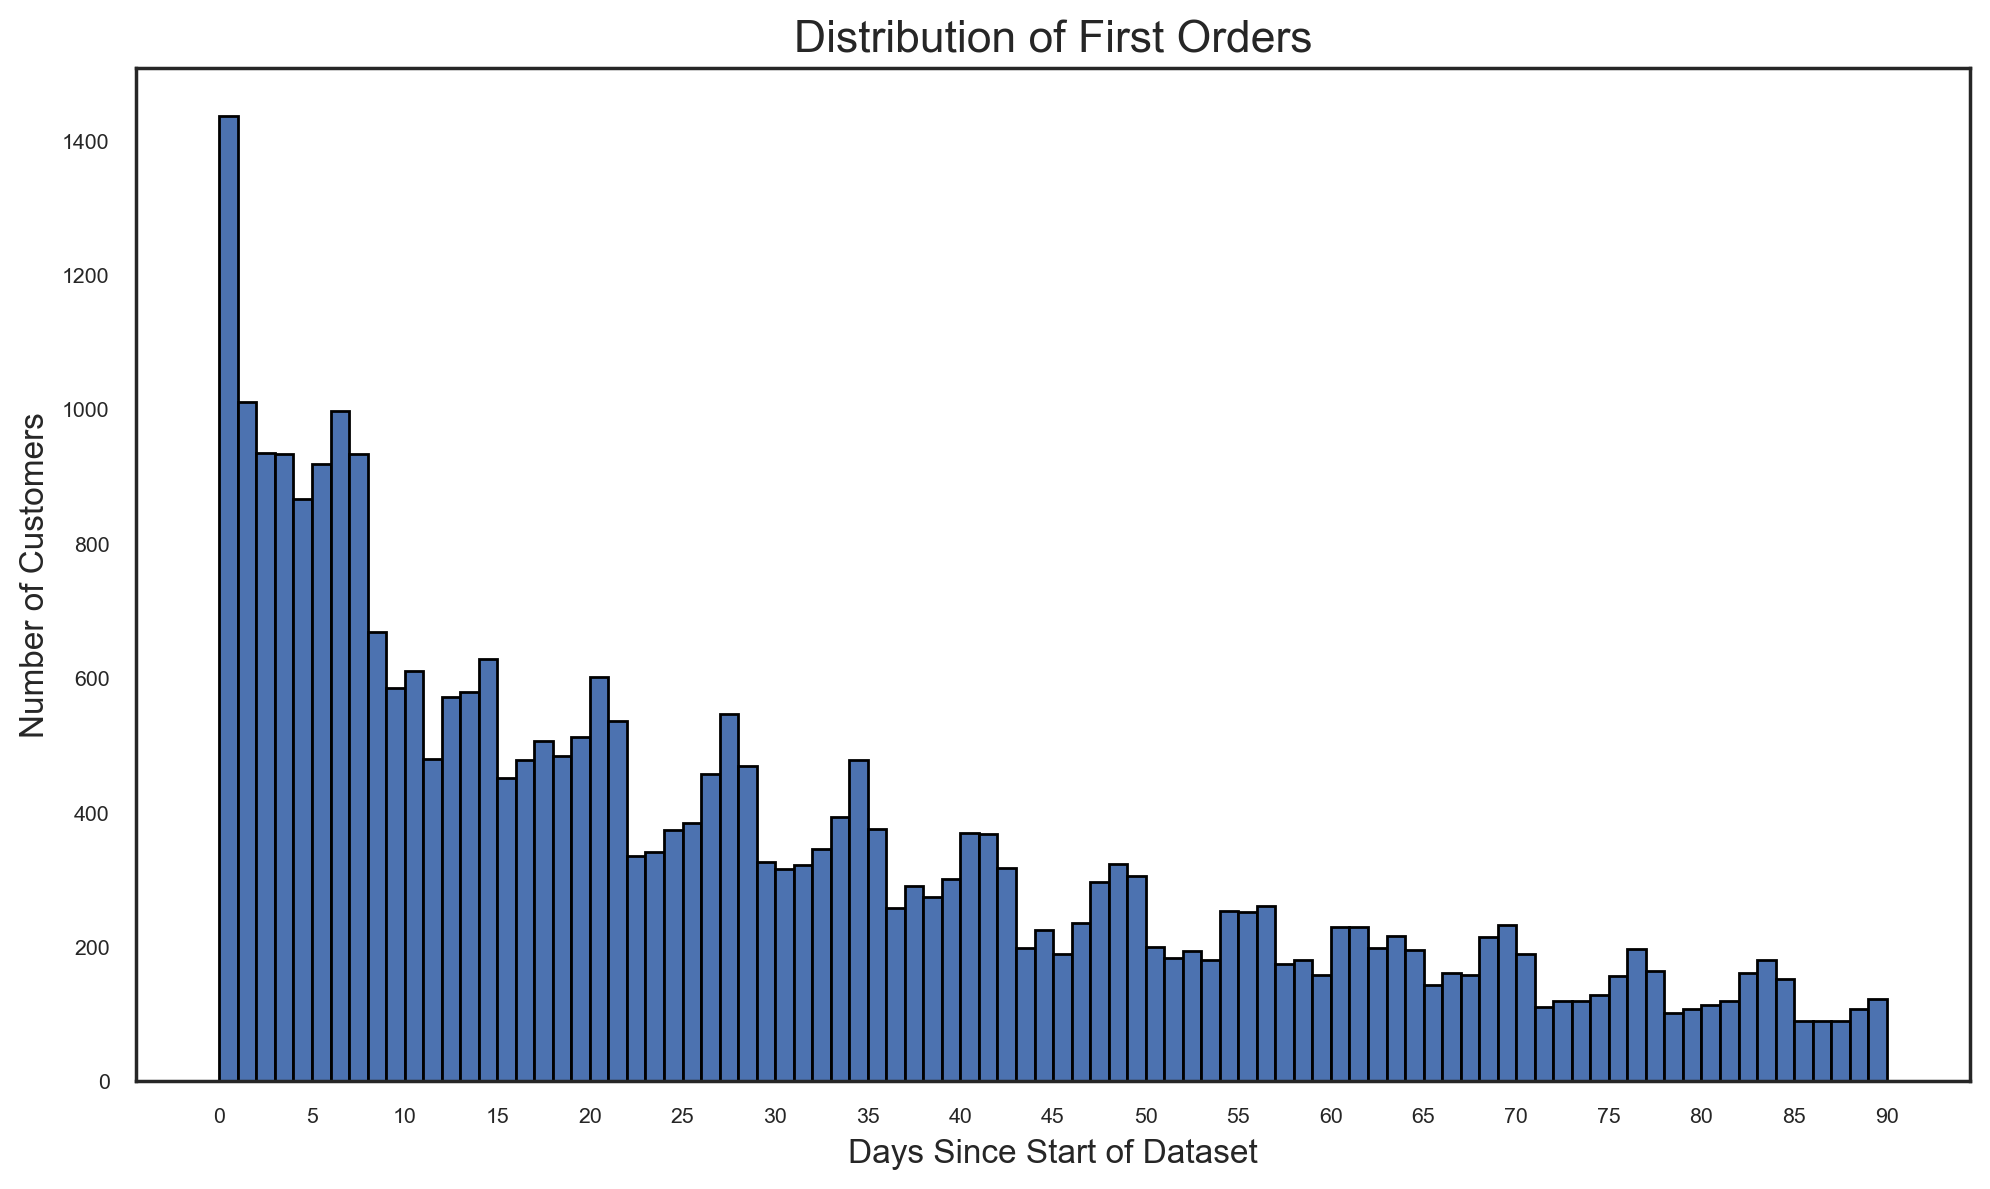

In [180]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.hist(customers["first_order"], bins=90, edgecolor="black")

plt.title("Distribution of First Orders", fontsize=16)
plt.xlabel("Days Since Start of Dataset", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

tick_positions4 = np.arange(0, customers["first_order"].max() + 1, 5)
plt.xticks(tick_positions4)

plt.tight_layout()
plt.show()

In [181]:
customers[customers["first_order"].isna()]

# As the last_order is 0 (i.e. first day of the period), it can be assumed that the first_order is 0 
# Replace NaN with 0

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
0366fbb035             8670          24.0             1              1   
039d7c8a20             4660          23.0             1              1   
04c9d25c93             8670          27.0             1              1   
09118ae9e7             8670          36.0             1              1   
0d1f298bbd             4660          22.0             1              1   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
0366fbb035          0          NaN           0          -           DIGI   
039d7c8a20          0          NaN           0   DELIVERY           DIGI   
04c9d25c93          1          NaN           0   DISCOUNT           CASH   
09118ae9e7          0          NaN           0          -           CARD   
0d1f298bbd          1          NaN           0   DISCOUNT           CASH   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0          -           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
0366fbb035           0.00      11.87           0.00       0.0   
039d7c8a20           0.00       0.00           0.00       0.0   
04c9d25c93          18.16       0.00           0.00       0.0   
09118ae9e7           0.00       6.02           0.00       0.0   
0d1f298bbd           5.22       0.00           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
0366fbb035                  0.0          0.0          0.00          0.0   
039d7c8a20                  0.0          0.0          0.00          0.0   
04c9d25c93                  0.0          0.0          0.00          0.0   
09118ae9e7                  0.0          0.0          0.00          0.0   
0d1f298bbd                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
0366fbb035         0.00         0.00           0.0                0.0   
039d7c8a20        1

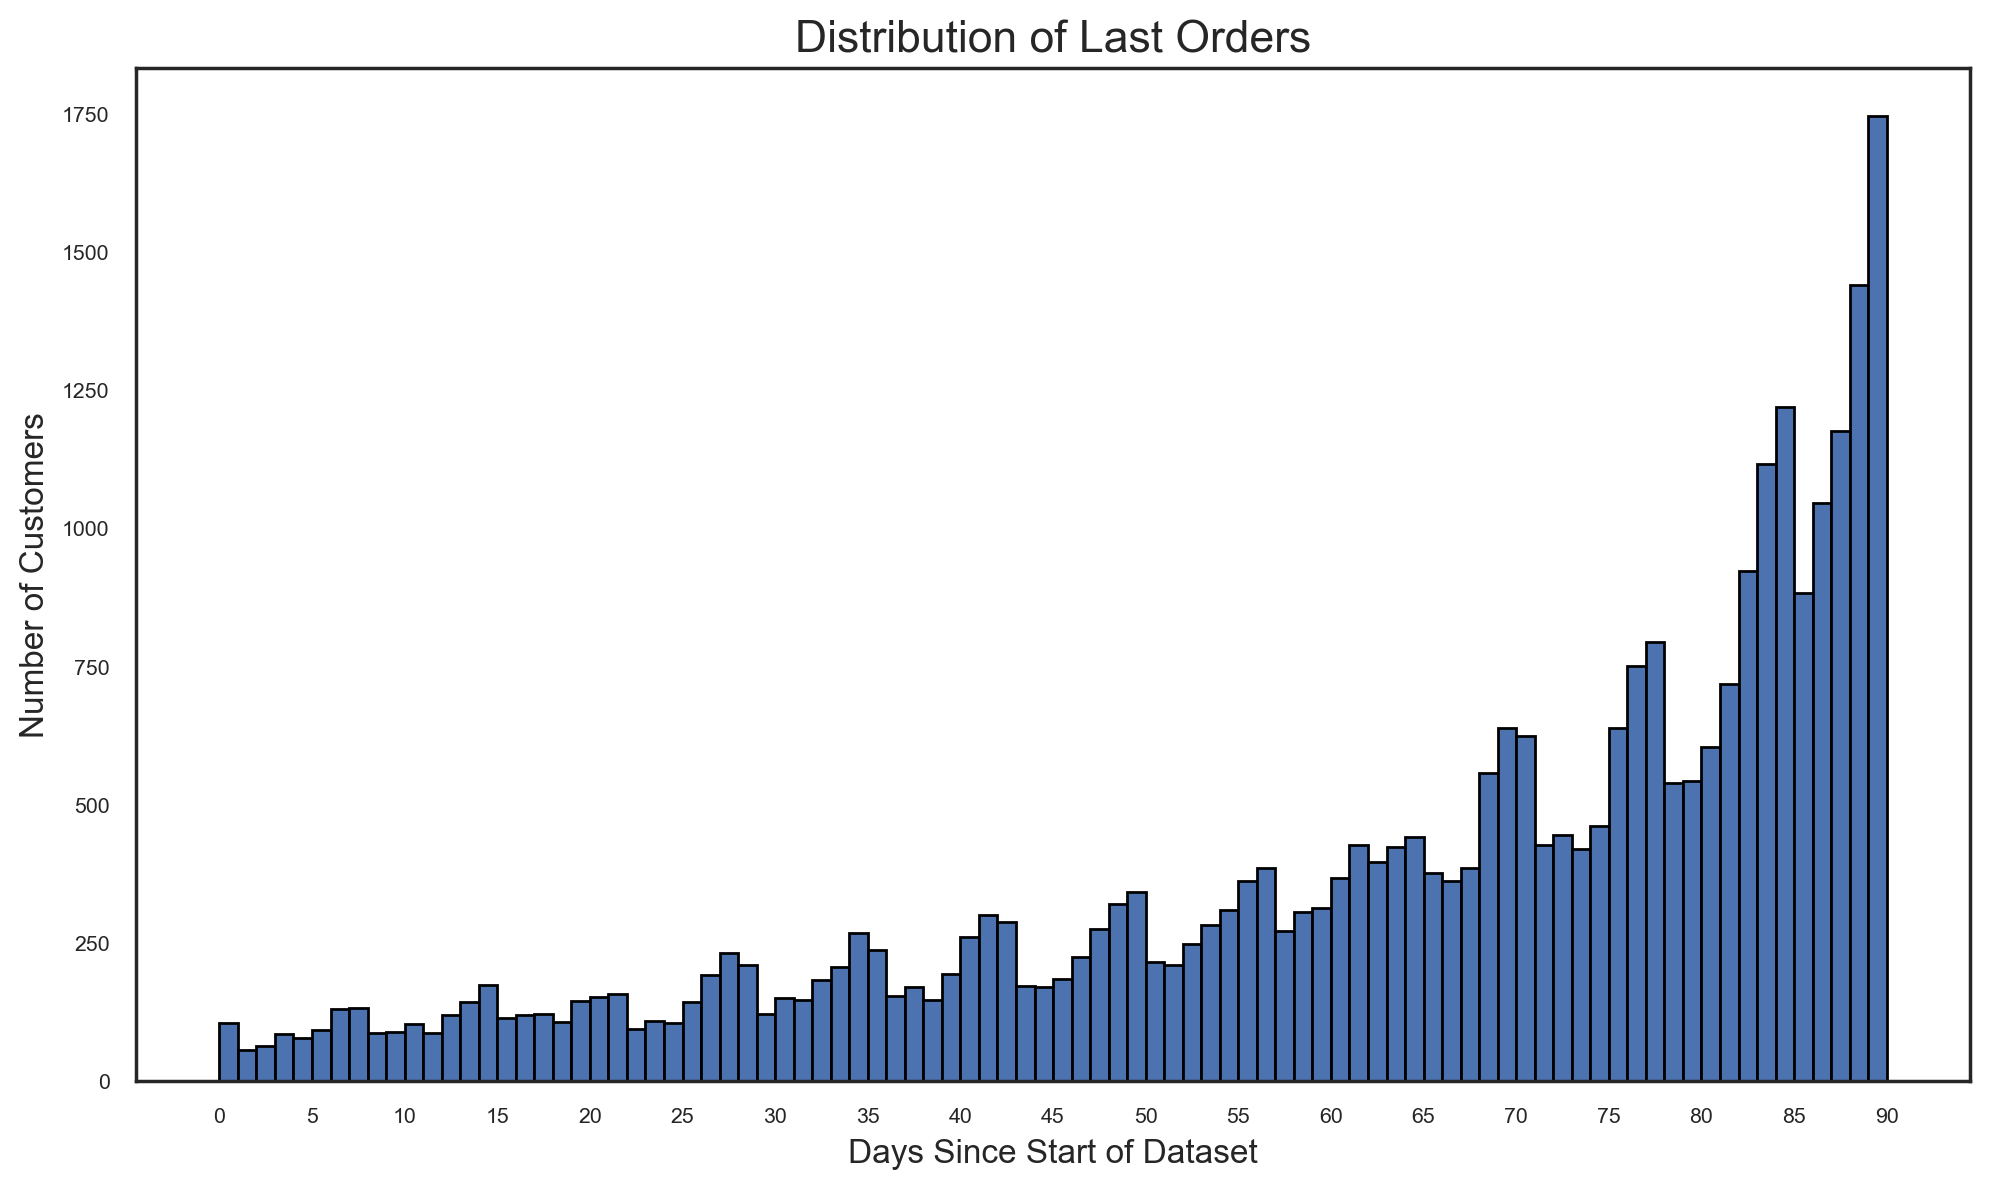

In [182]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.hist(customers["last_order"], bins=90, edgecolor="black")

plt.title("Distribution of Last Orders", fontsize=16)
plt.xlabel("Days Since Start of Dataset", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

tick_positions5 = np.arange(0, customers["last_order"].max() + 1, 5)
plt.xticks(tick_positions5)

plt.tight_layout()
plt.show()

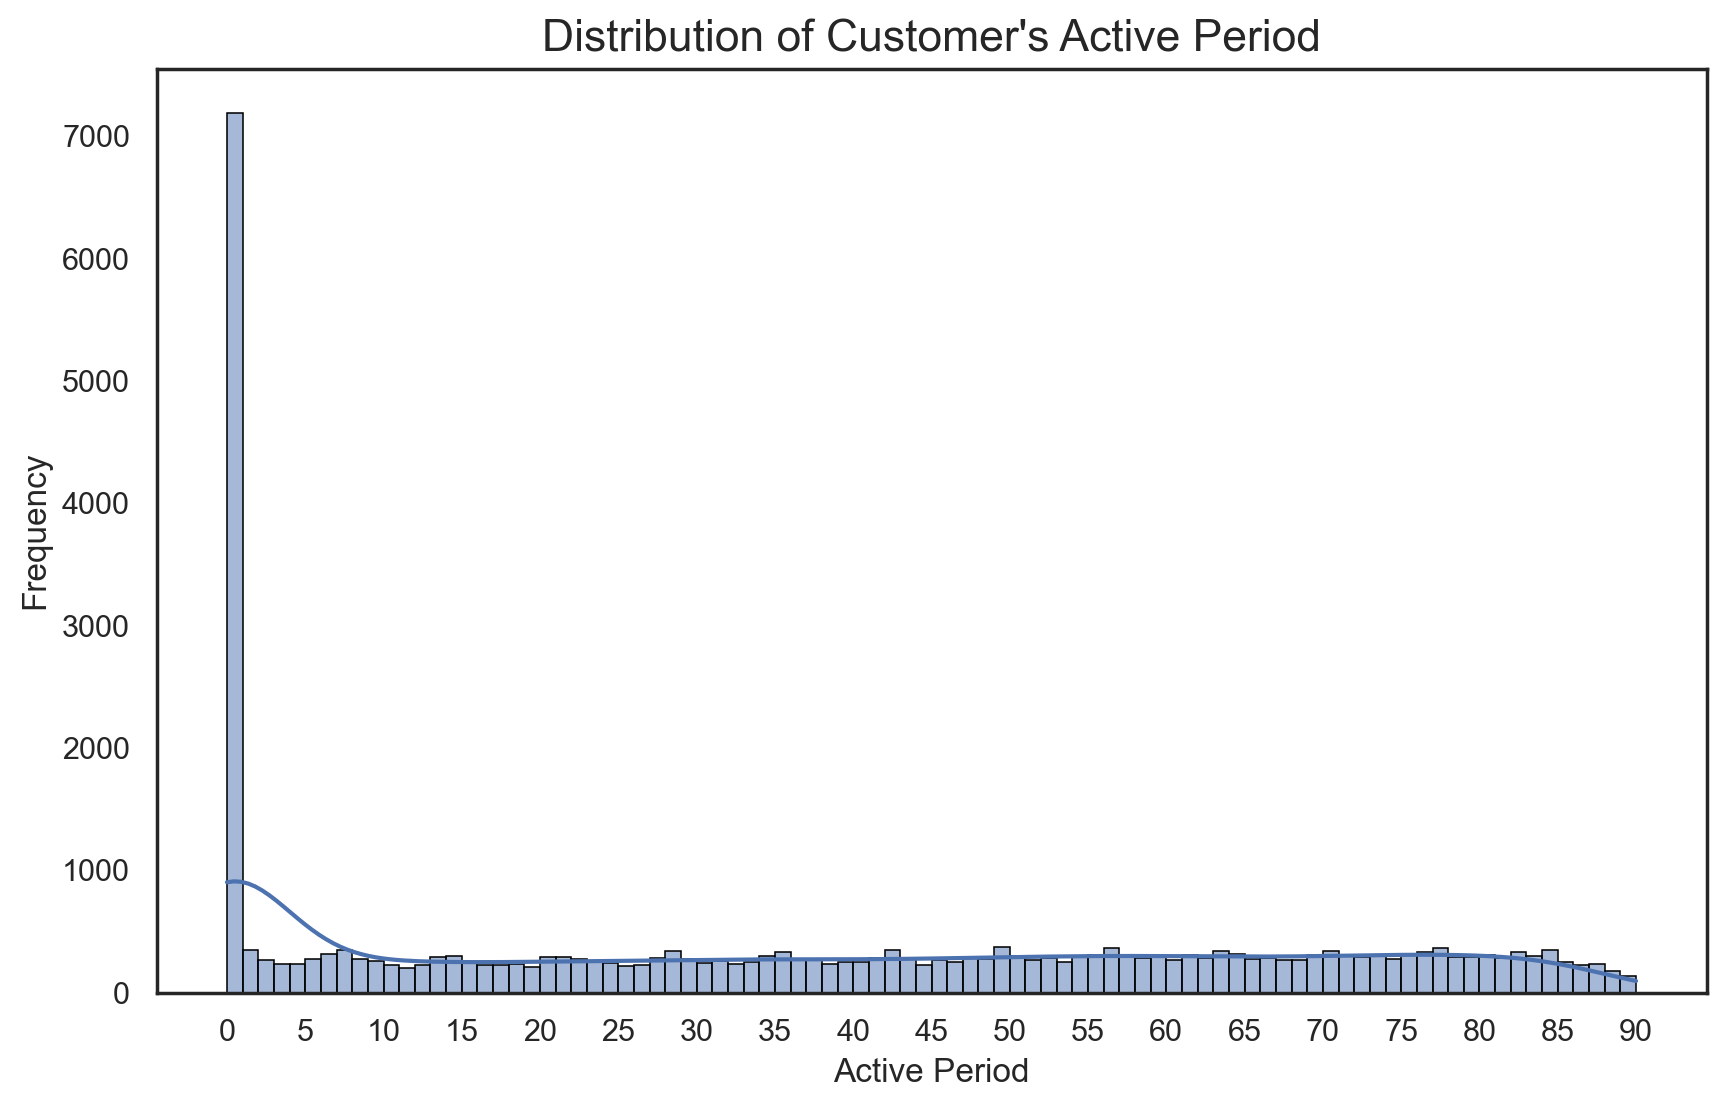

In [183]:
# The active period of a customer can be caluclated by substracting last_order and first_order
# This creates a new column called active_period
customers["active_period"] = customers["last_order"] - customers["first_order"]

sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))

sns.histplot(customers["active_period"], bins=90, kde=True,  edgecolor="black")
plt.title("Distribution of Customer's Active Period", fontsize=16)
plt.xlabel("Active Period", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

tick_positions6 = np.arange(0, customers["last_order"].max() + 1, 5)
plt.xticks(tick_positions6)

plt.show()

<a class="anchor" id="2nd-bullet">

##### g. CUI_American to CUI_Thai
    
</a>

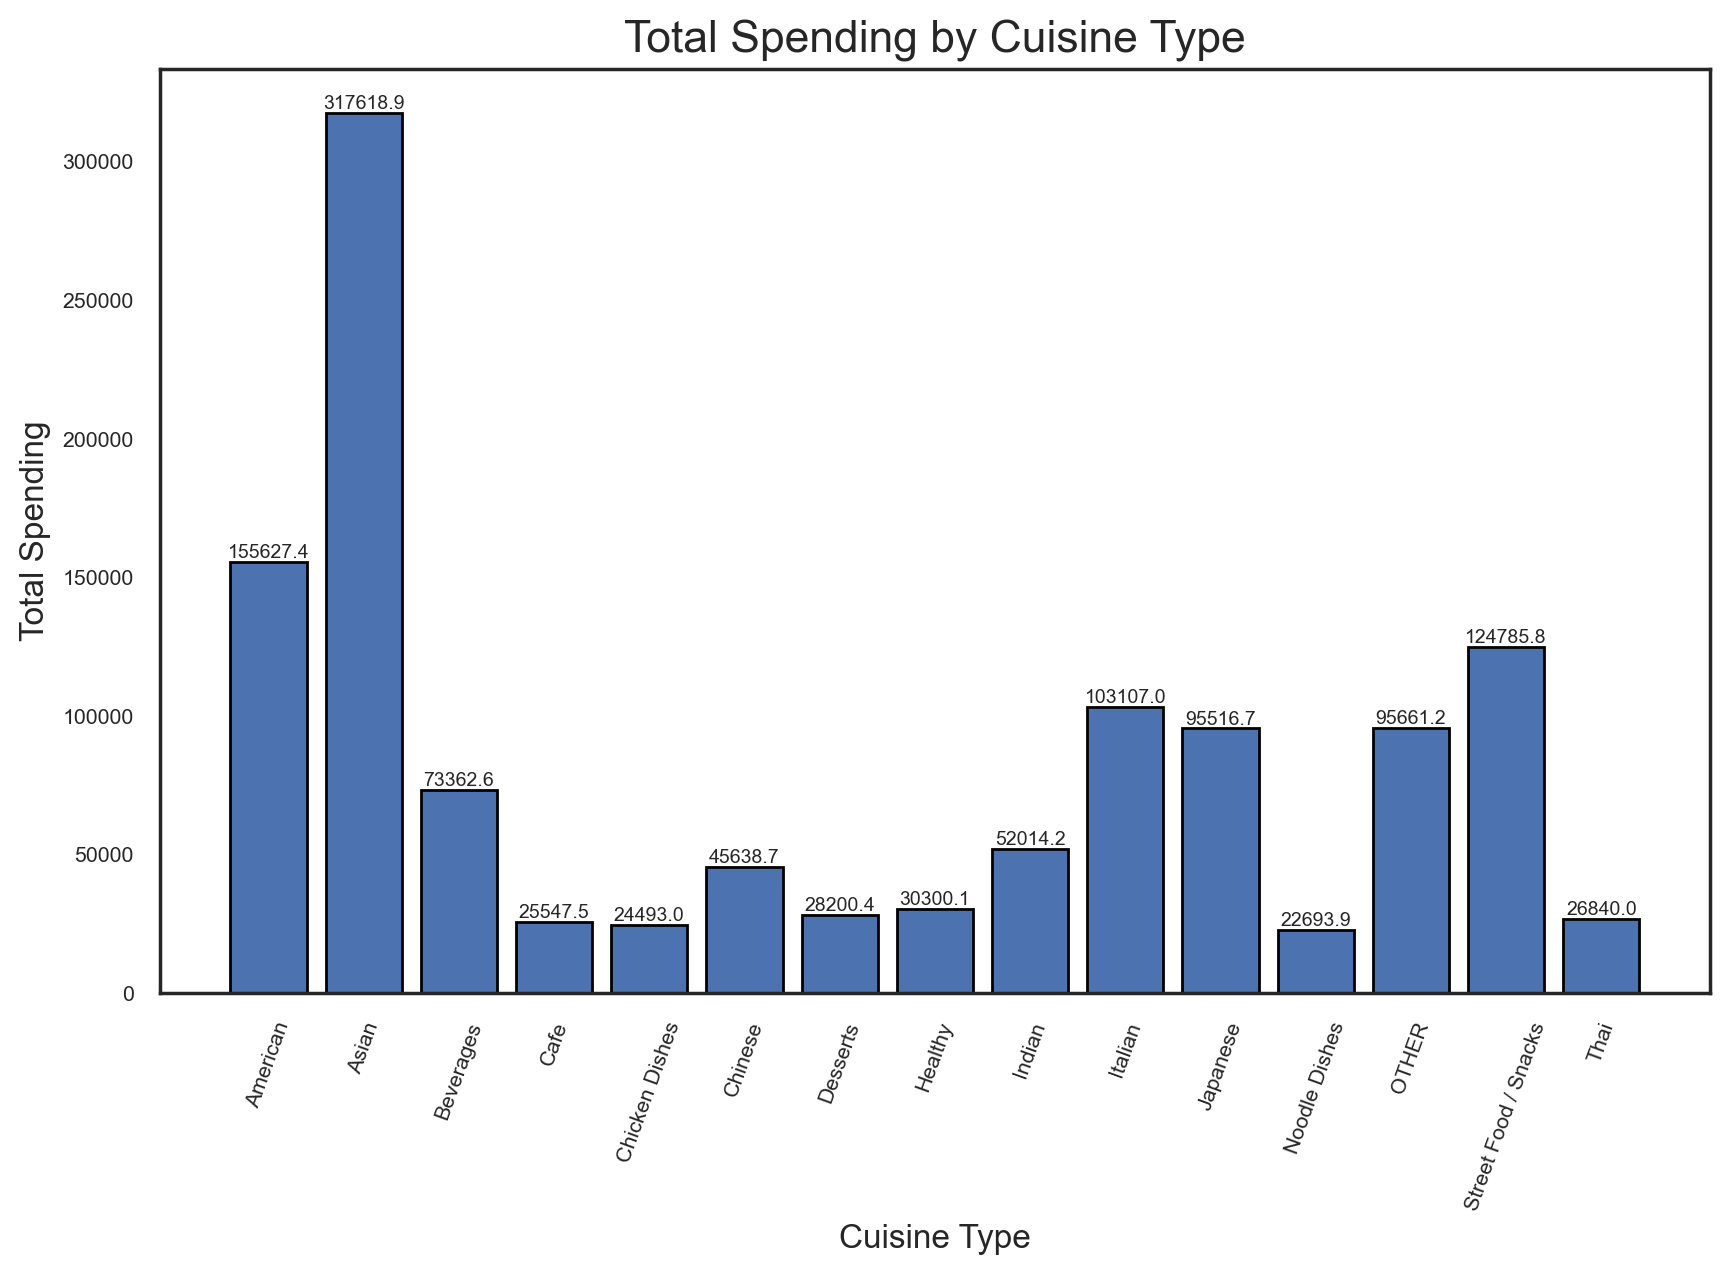

In [184]:
cuisine_columns = [col for col in customers.columns if col.startswith("CUI")]
cuisine_column_sums = customers[cuisine_columns].sum()

# Convert index to string for plotting because i was getting an error
cuisine_column_sums.index = cuisine_column_sums.index.str.replace("CUI_", "")

sns.set(font_scale=0.7)
sns.set_style("white")
plt.figure(figsize=(10, 6))

plt.bar(cuisine_column_sums.index, cuisine_column_sums.values, edgecolor="black")

for index, value in enumerate(round(cuisine_column_sums, 1)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=7)

plt.title("Total Spending by Cuisine Type", fontsize=16)
plt.xlabel("Cuisine Type", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=70)
plt.show() 

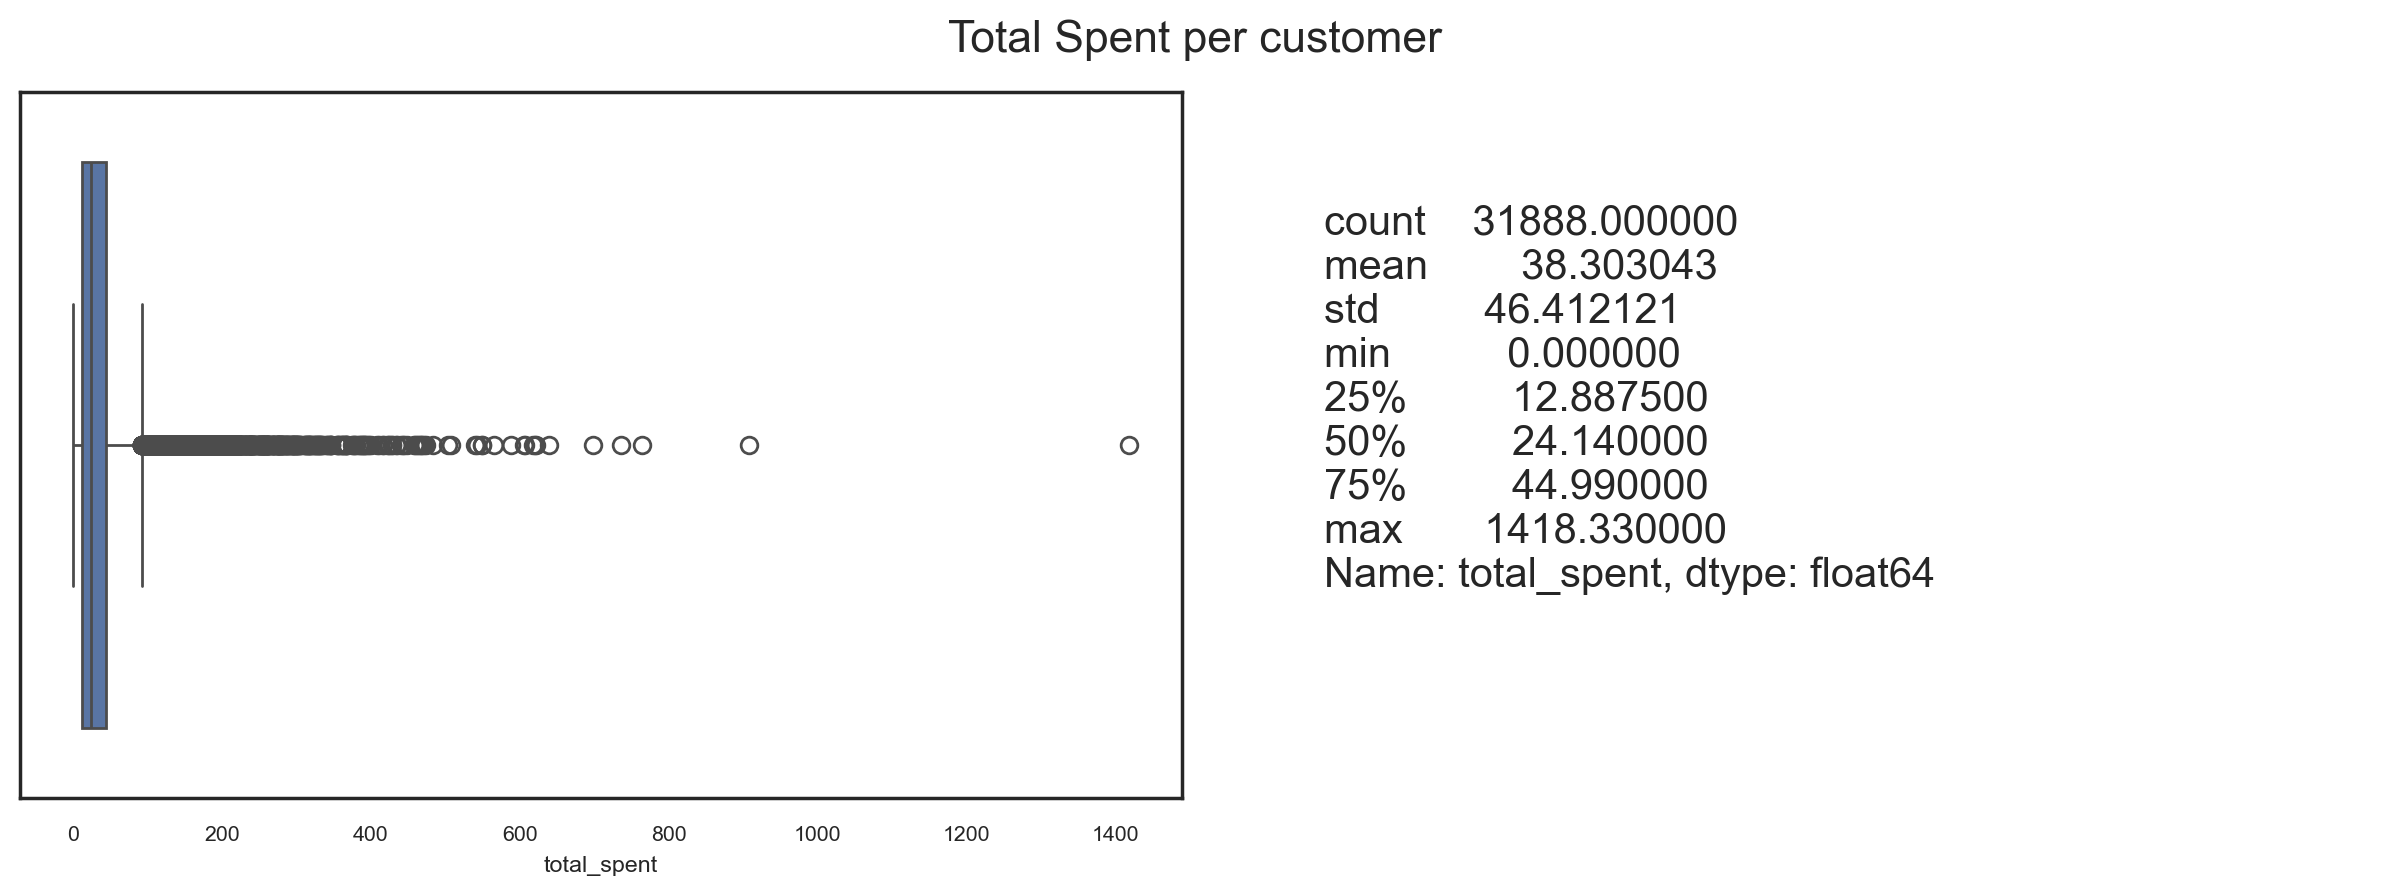

In [185]:
# Create a column that indicates how much customers spent (sum all cuisine types)
customers["total_spent"] = customers[cuisine_columns].sum(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
sns.set(font_scale=0.7)

sns.boxplot(x=customers["total_spent"], ax = ax1)

describe = customers["total_spent"].describe()
ax2.text(0.1, 0.3, describe, fontsize=15)
ax2.axis("off")

title = "Total Spent per customer"

plt.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

In [186]:
customers[customers["total_spent"] == 0]
#There are 138 rows with 0 monetary units spent

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
c94b288475             8670          26.0             0              0   
f687717dc1             8670          21.0             0              0   
c6cf0b76fb             8670          38.0             0              0   
1b7c34738e             8670          24.0             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
0e60632fe2             8670          23.0             0              0   
28ed1f1e3f             8670          20.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
c94b288475          0          1.0           1   DELIVERY           CASH   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
c6cf0b76fb          0          2.0           2   DELIVERY           CASH   
1b7c34738e          0          3.0           3          -           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1         86.0          86          -           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
0e60632fe2          0         89.0          89   DISCOUNT           CARD   
28ed1f1e3f          0         89.0          89   DELIVERY           DIGI   
4c06e104de          1         89.0          89          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
4903041977            0.0        0.0            0.0       0.0   
c94b288475            0.0        0.0            0.0       0.0   
f687717dc1            0.0        0.0            0.0       0.0   
c6cf0b76fb            0.0        0.0            0.0       0.0   
1b7c34738e            0.0        0.0            0.0       0.0   
...                   ...        ...            ...       ...   
177ede2420            0.0        0.0            0.0       0.0   
0039059c9c            0.0        0.0            0.0       0.0   
0e60632fe2            0.0        0.0            0.0       0.0   
28ed1f1e3f            0.0        0.0            0.0       0.0   
4c06e104de            0.0        0.0            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
4903041977                  0.0          0.0           0.0          0.0   
c94b288475                  0.0          0.0           0.0          0.0   
f687717dc1                  0.0          0.0           0.0          0.0   
c6cf0b76fb                  0.0          0.0           0.0          0.0   
1b7c34738e                  0.0          0.0           0.0          0.0   
...                         ...          ...           ...          ...   
177ede2420                  0.0          0.0           0.0          0.0   
0039059c9c                  0.0          0.0           0.0          0.0   
0e60632fe2                  0.0          0.0           0.0          0.0   
28ed1f1e3f                  0.0          0.0           0.0          0.0   
4c06e104de                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
4903041977          0.0          0.0           0.0                0.0   
c94b288475         

In [187]:
# Change 0s to NaN to calculate the average spending per cuisine
# This will not change the original dataframe
avg_spending_per_cuisine = customers[cuisine_columns].replace(0, np.nan).mean().sort_values(ascending=False)

print("Average Spending per Cuisine:")
print(avg_spending_per_cuisine)

Average Spending per Cuisine:
CUI_Street Food / Snacks    29.368280
CUI_Asian                   26.679451
CUI_Cafe                    18.702401
CUI_Italian                 15.990540
CUI_Japanese                15.158968
CUI_Indian                  15.085325
CUI_American                14.416619
CUI_Desserts                13.988309
CUI_Healthy                 13.969604
CUI_OTHER                   13.586313
CUI_Beverages               13.498178
CUI_Chinese                 12.958169
CUI_Thai                    11.286804
CUI_Noodle Dishes           10.194933
CUI_Chicken Dishes           7.540964
dtype: float64


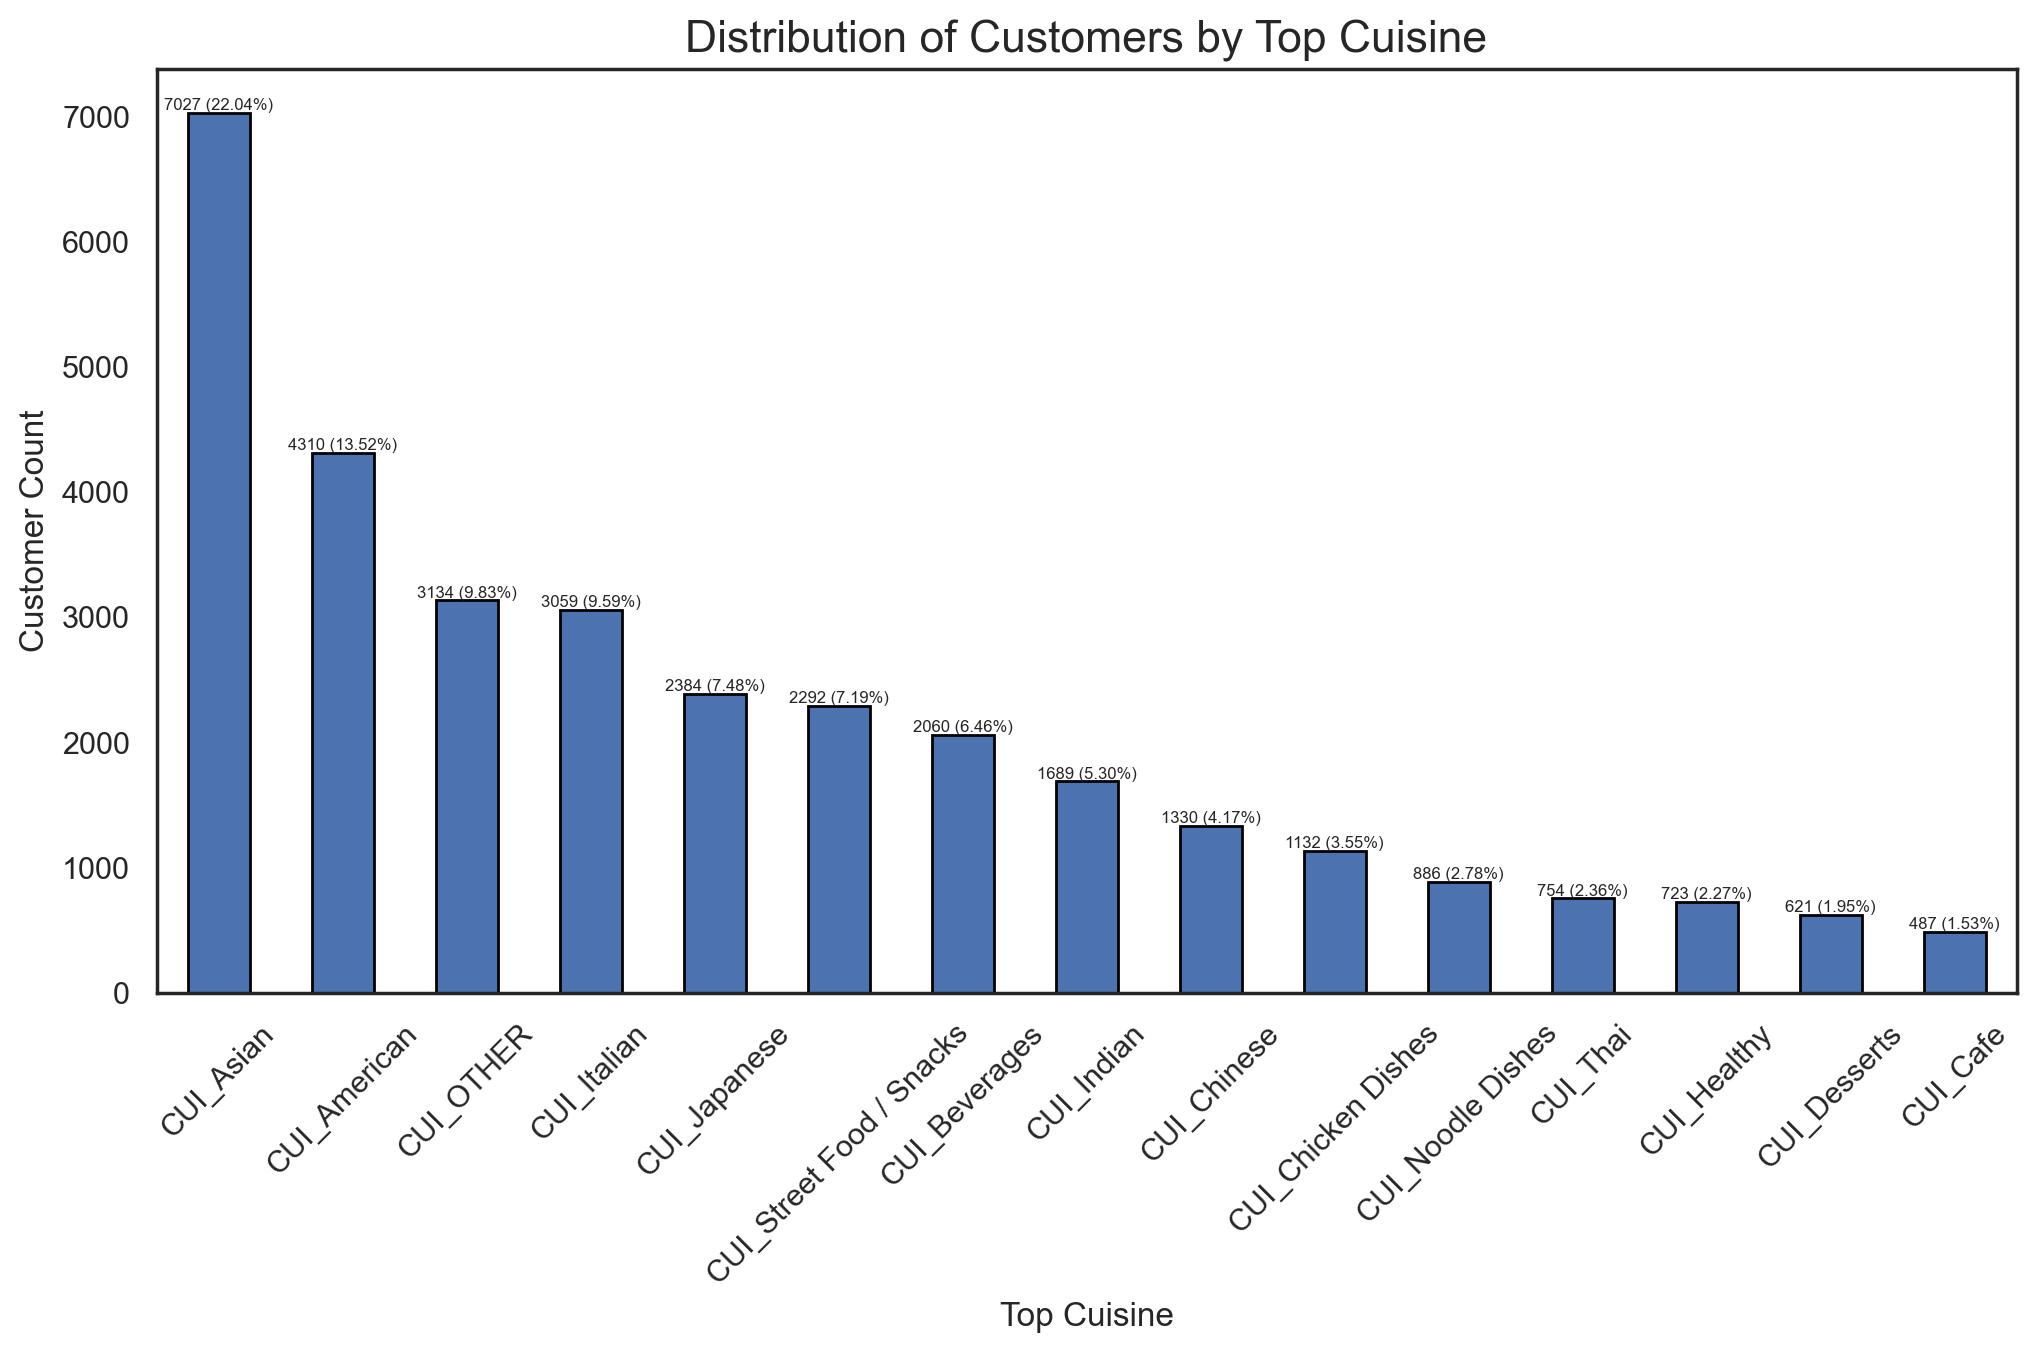

In [188]:
# Create a column which shows which cuisine a customer has spent the most money
customers['top_cuisine'] = customers[cuisine_columns].idxmax(axis=1)
cuisine_type_count = customers["top_cuisine"].value_counts()
cuisine_type_percent = customers["top_cuisine"].value_counts(normalize=True) * 100

sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

cuisine_type_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(round(cuisine_type_count, 1), cuisine_type_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=6)

plt.title("Distribution of Customers by Top Cuisine", fontsize=16)
plt.xlabel("Top Cuisine", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<a class="anchor" id="2nd-bullet">

##### h. DOW_0 to DOW_6
    
</a>

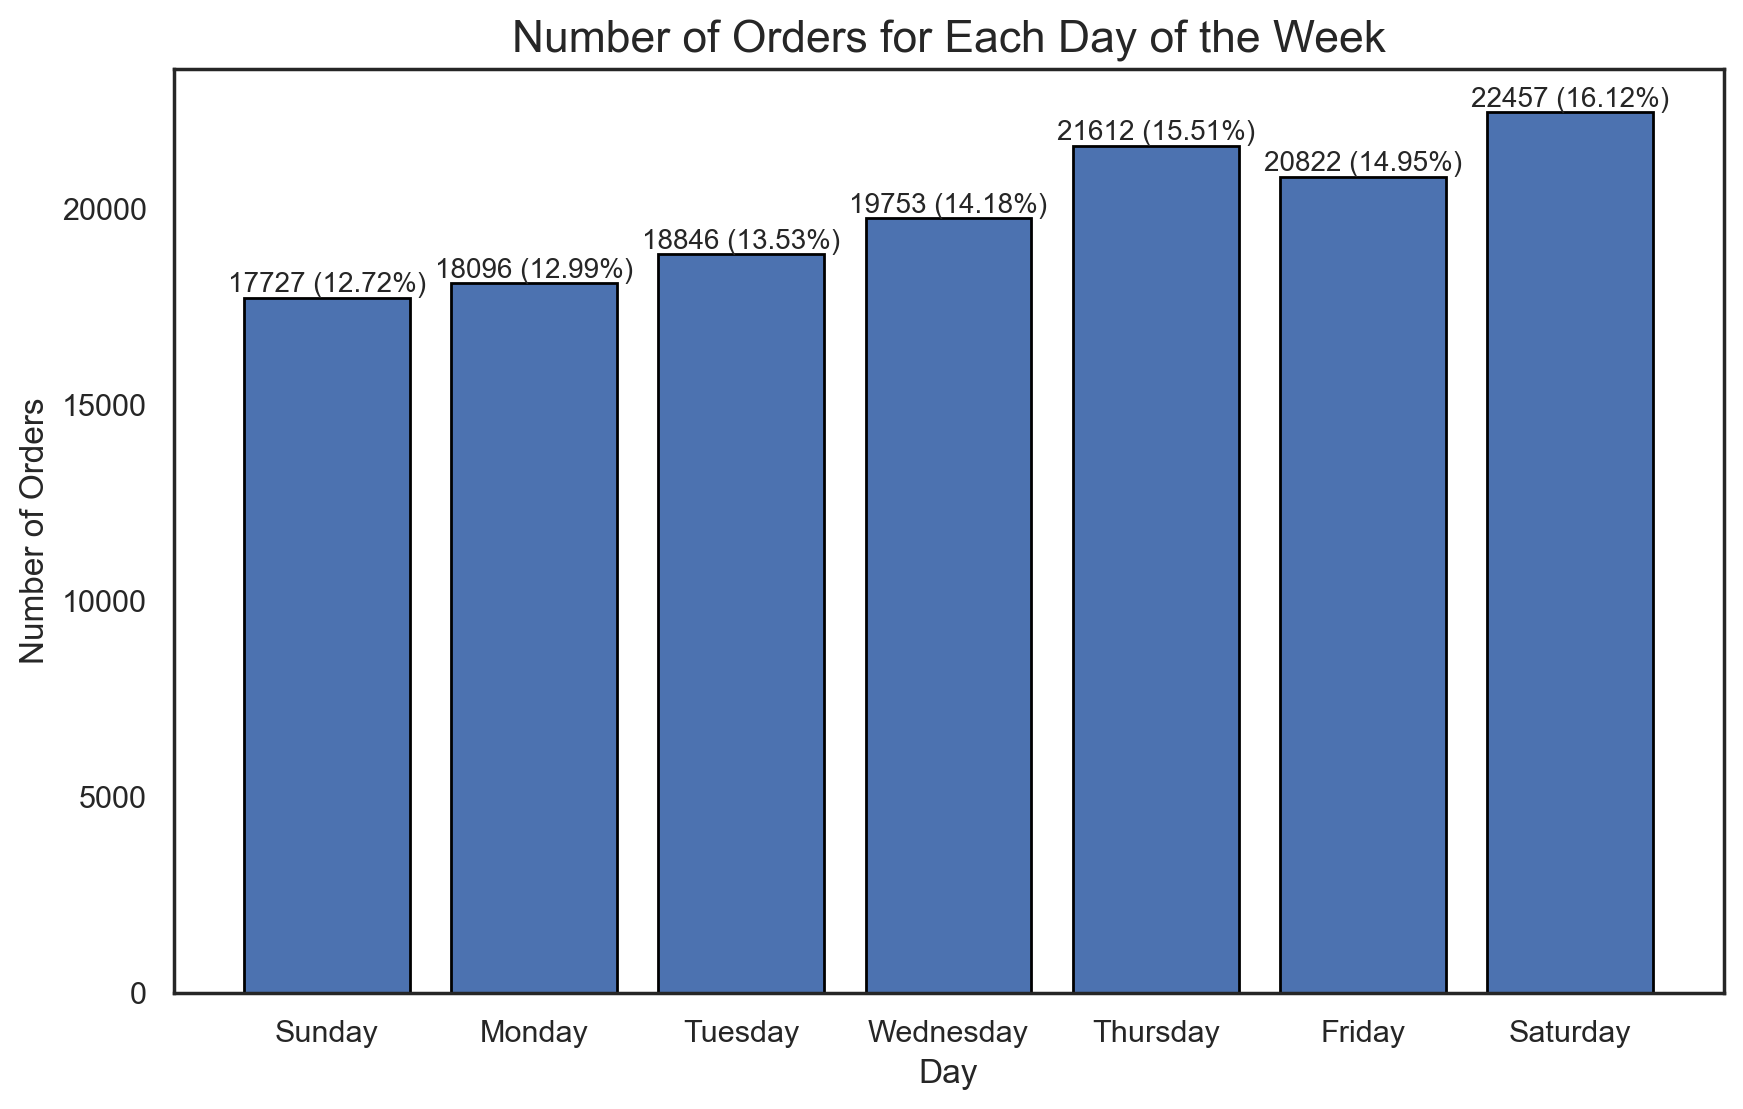

In [189]:
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Create column names in the same format as in the data frame
days_columns = [f"DOW_{i}" for i in range(0, 7)]

# Get all columns with days_columns format
# Calculate the total number of orders by summing across each day column
days_column_sums = customers[days_columns].sum()
days_column_sums_percent = (days_column_sums / days_column_sums.sum()) * 100

# Replace the index of days_column_sums with day_names
days_column_sums.index = day_names

sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))

# Plot the total orders for each day
plt.bar(days_column_sums.index, days_column_sums.values, edgecolor="black")

for index, (count, percent) in enumerate(zip(round(days_column_sums), days_column_sums_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Number of Orders for Each Day of the Week", fontsize=16)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=0)

plt.show()

In [190]:
# Create a column that calculates the total number of orders for each customers
customers["total_number_of_orders"] = customers[days_columns].sum(axis=1)
days_mean = customers["total_number_of_orders"].mean().round(2)
days_median = customers["total_number_of_orders"].median()

print(f"The total_number_of_orders mean ({days_mean}) and median ({days_median}) suggest that "
      f"most customers place a relatively low number of orders during the week")
print(f"The total_number_of_orders ranges from a minimum of {customers['total_number_of_orders'].min()} "
      f"to a maximum of {customers['total_number_of_orders'].max()} orders a week.")
print(f"There are {len(customers[customers['total_number_of_orders'] == 0])} rows with 0 orders.")

The total_number_of_orders mean (4.37) and median (3.0) suggest that most customers place a relatively low number of orders during the week
The total_number_of_orders ranges from a minimum of 0 to a maximum of 94 orders a week.
There are 138 rows with 0 orders.


There are customers that have not placed any orders. This is consistent with the findings in vendor_counts, where it can be assumed that customers just have created accounts without placing any orders.

<a class="anchor" id="2nd-bullet">

##### i. HR_0 to HR_1
    
</a>

In [191]:
missing_count = len(customers[customers['HR_0'].isna()])
non_missing_counts = customers['HR_0'].value_counts()

print(f"In the 'HR_0' variable, there are {missing_count} missing values. "
      f"The only non-missing value is 0, with a count of {non_missing_counts[0]}.")

In the 'HR_0' variable, there are 1165 missing values. The only non-missing value is 0, with a count of 30723.


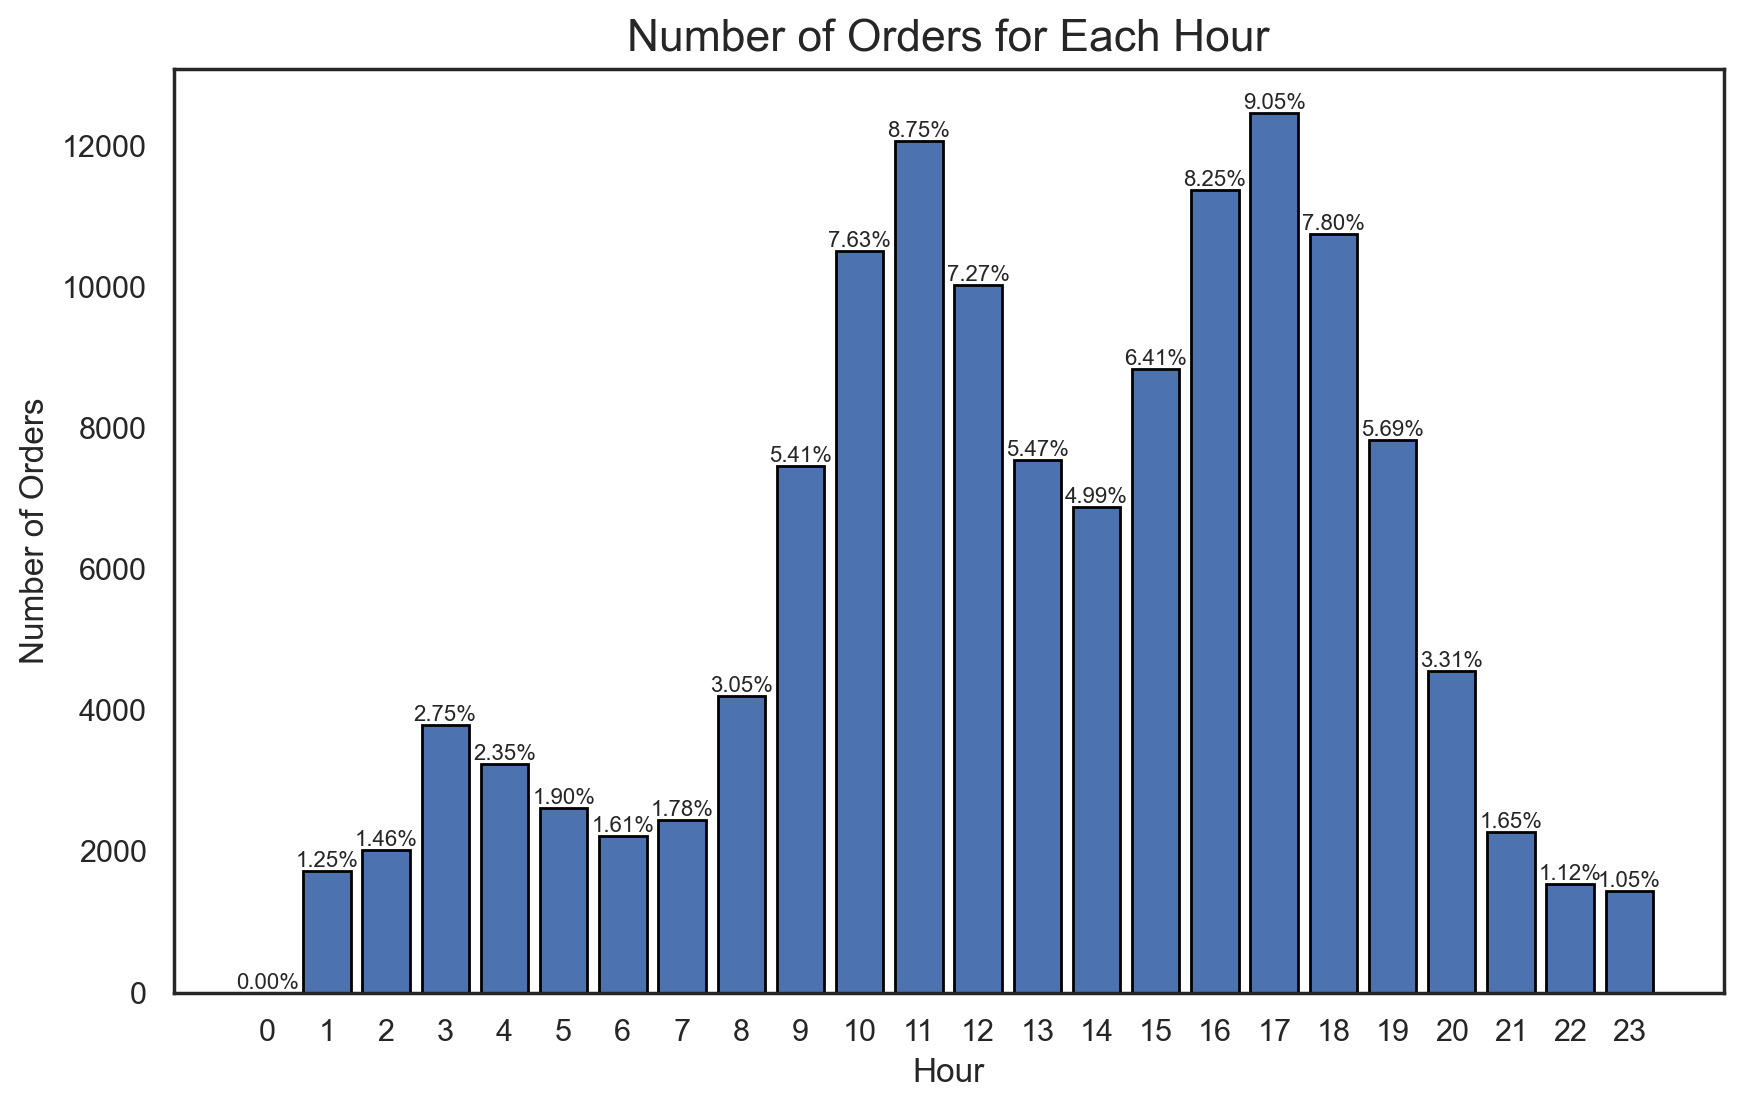

In [192]:
# Create a list of column names from HR_0 to HR_23 (similar to DOW_)
hour_columns = [f"HR_{i}" for i in range(0, 24)]

# Get all columns with hour_columns format
# Calculate the total number of orders by summing across each hour column
hr_column_sums = customers[hour_columns].sum()
hr_column_sums_percent = (hr_column_sums / hr_column_sums.sum()) * 100

# Convert index to string for plotting to avoid getting an error
hr_column_sums.index = hr_column_sums.index.str.replace("HR_", "")

sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))

# Plot the total orders for each hour
plt.bar(hr_column_sums.index, hr_column_sums.values, edgecolor="black")

for index, percent in enumerate(hr_column_sums_percent):
    plt.text(index, hr_column_sums.values[index] + 1, f"{percent:.2f}%", ha='center', va='bottom', fontsize=8)

plt.title("Number of Orders for Each Hour", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=0)

plt.show()

In [193]:
print(f"Total sum of orders across the days of the week: {days_column_sums.sum()}")
print(f"Total sum of orders across the hours of the day: {hr_column_sums.sum()}")

Total sum of orders across the days of the week: 139313
Total sum of orders across the hours of the day: 137760.0


In [194]:
# Check the difference between the two sums, as they should be equal but there are missing values
print(f"Difference: {days_column_sums.sum() - hr_column_sums.sum()}")

Difference: 1553.0


There are 1165 missing values in HR_0. Therefore, the difference betwen the days_column_sums.sum() and hr_column_sums.sum() should be equal to 1165. However, the actual difference is 1553. There is an inconsistency.

<a class="anchor" id="2nd-bullet">

#### 1.4.2 Categorical Variables
    
</a>

<a class="anchor" id="2nd-bullet">

##### a. customer_region
    
</a>

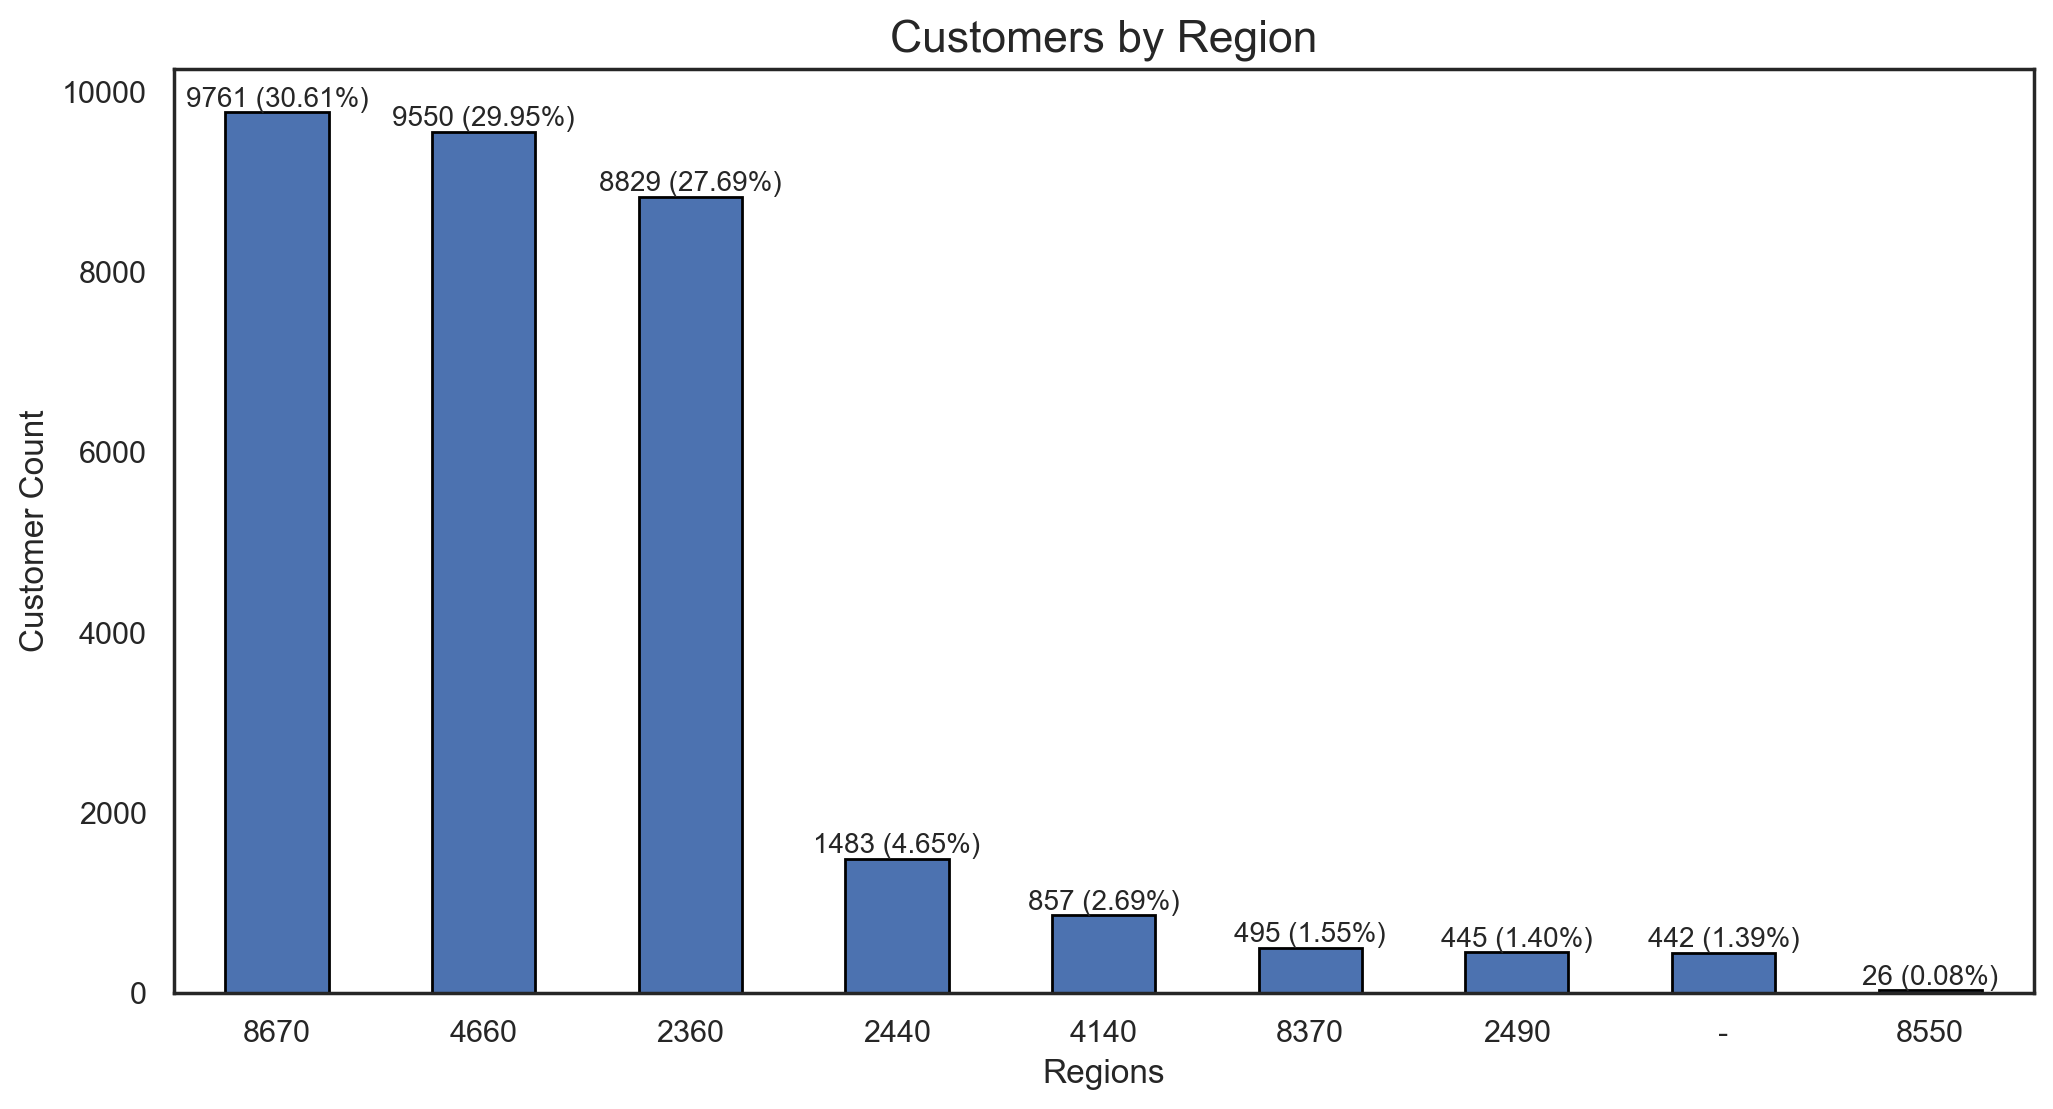

In [195]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

customer_region_count = customers["customer_region"].value_counts()
customer_region_percent = customers["customer_region"].value_counts(normalize=True) * 100

customer_region_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(customer_region_count, customer_region_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Customers by Region", fontsize=16)
plt.xlabel("Regions", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

The top regions are 8670, 4660, and 2360. Each code beginning with the same number can represent the same city. For instance, 8670, 8370 and 8550 could represent the same city, but different areas of the city.

In [196]:
city_mapping = {"8670": "city_8", 
                "8370": "city_8", 
                "8550": "city_8",
                "4660": "city_4", 
                "4140": "city_4",
                "2360": "city_2", 
                "2440": "city_2", 
                "2490": "city_2",
                "-": "-"}

# Create a new column with the cities divided into 3 and "-"
customers["city"] = customers["customer_region"].map(city_mapping)

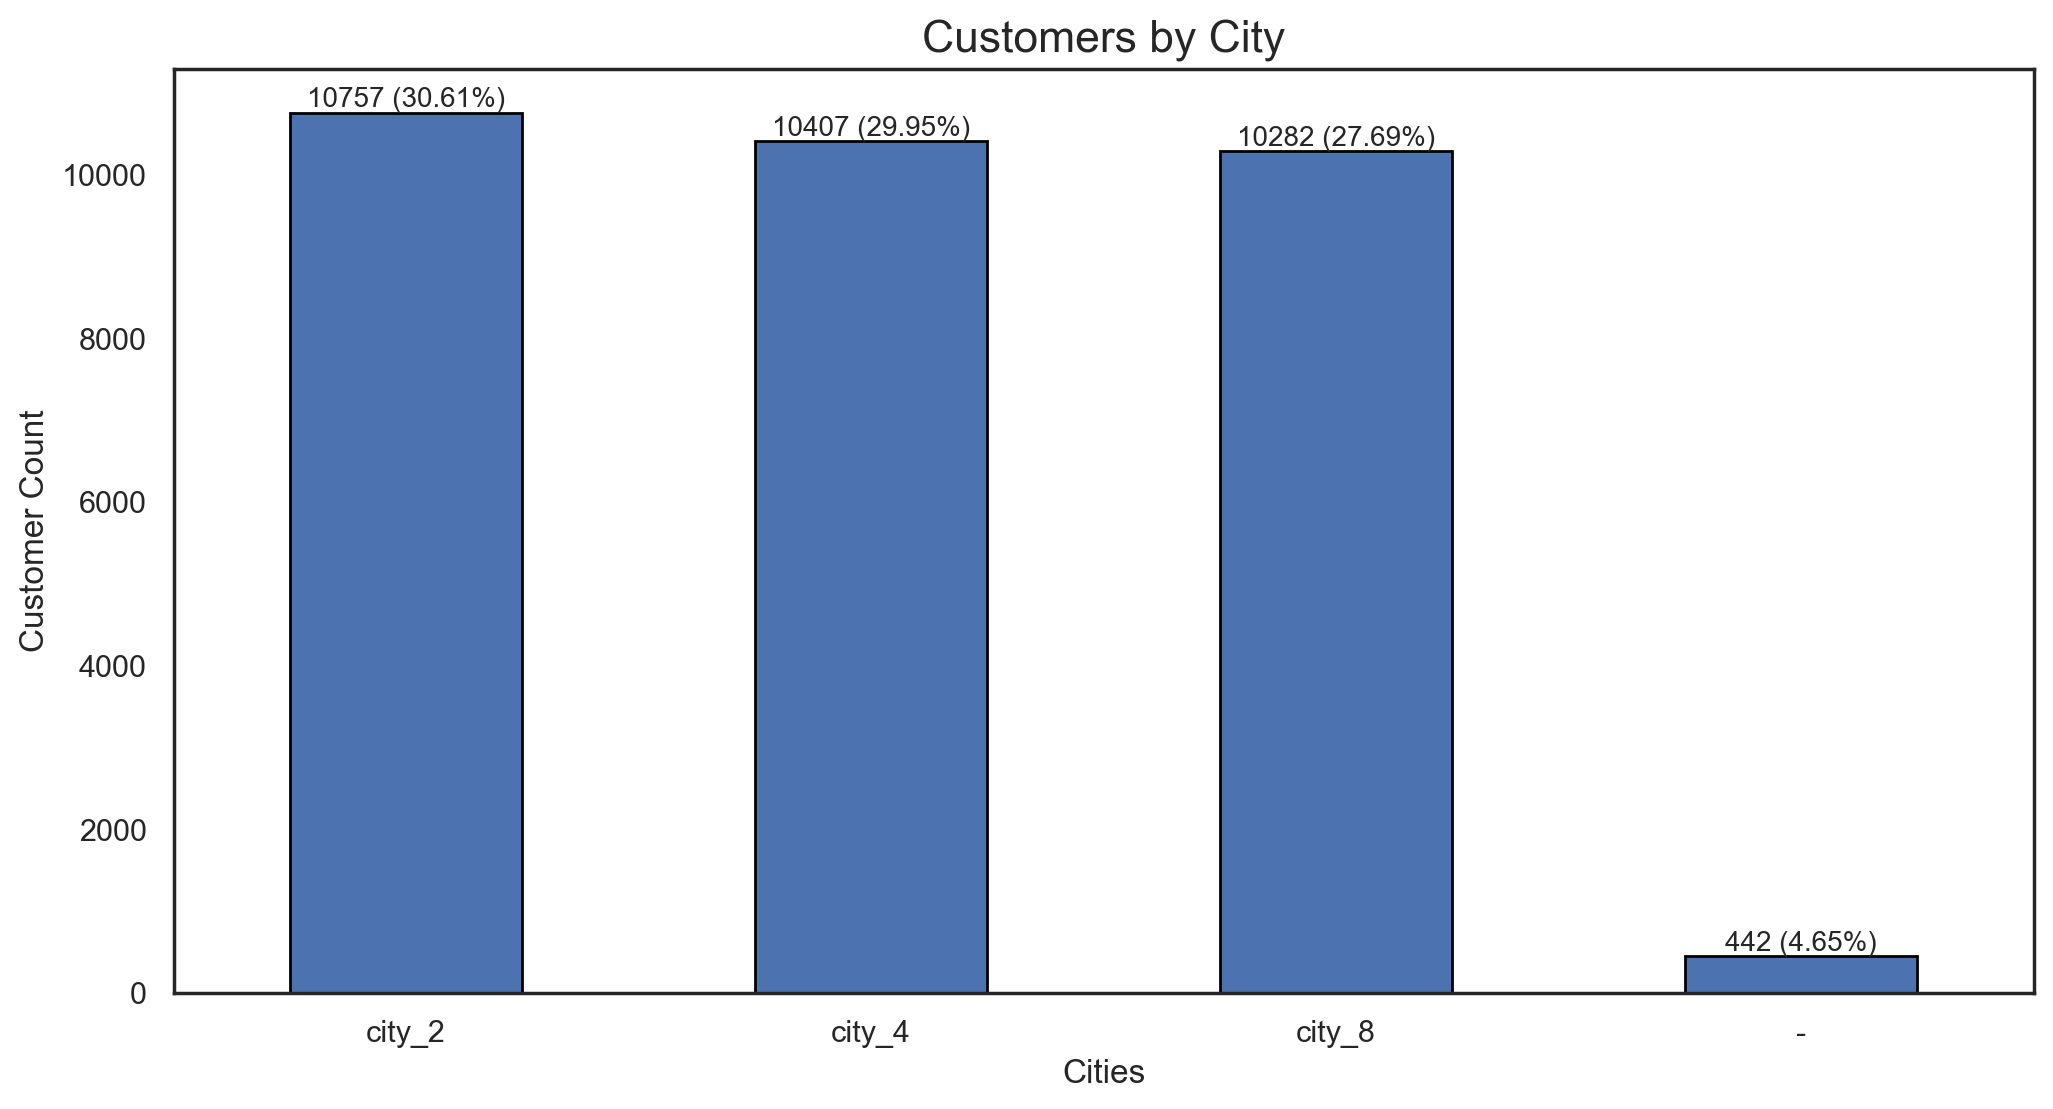

In [197]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

customer_city_count = customers["city"].value_counts()
customer_city_percent = customers["city"].value_counts(normalize=True) * 100

customer_city_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(customer_city_count, customer_region_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Customers by City", fontsize=16)
plt.xlabel("Cities", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="2nd-bullet">

##### b. last_promo
    
</a>

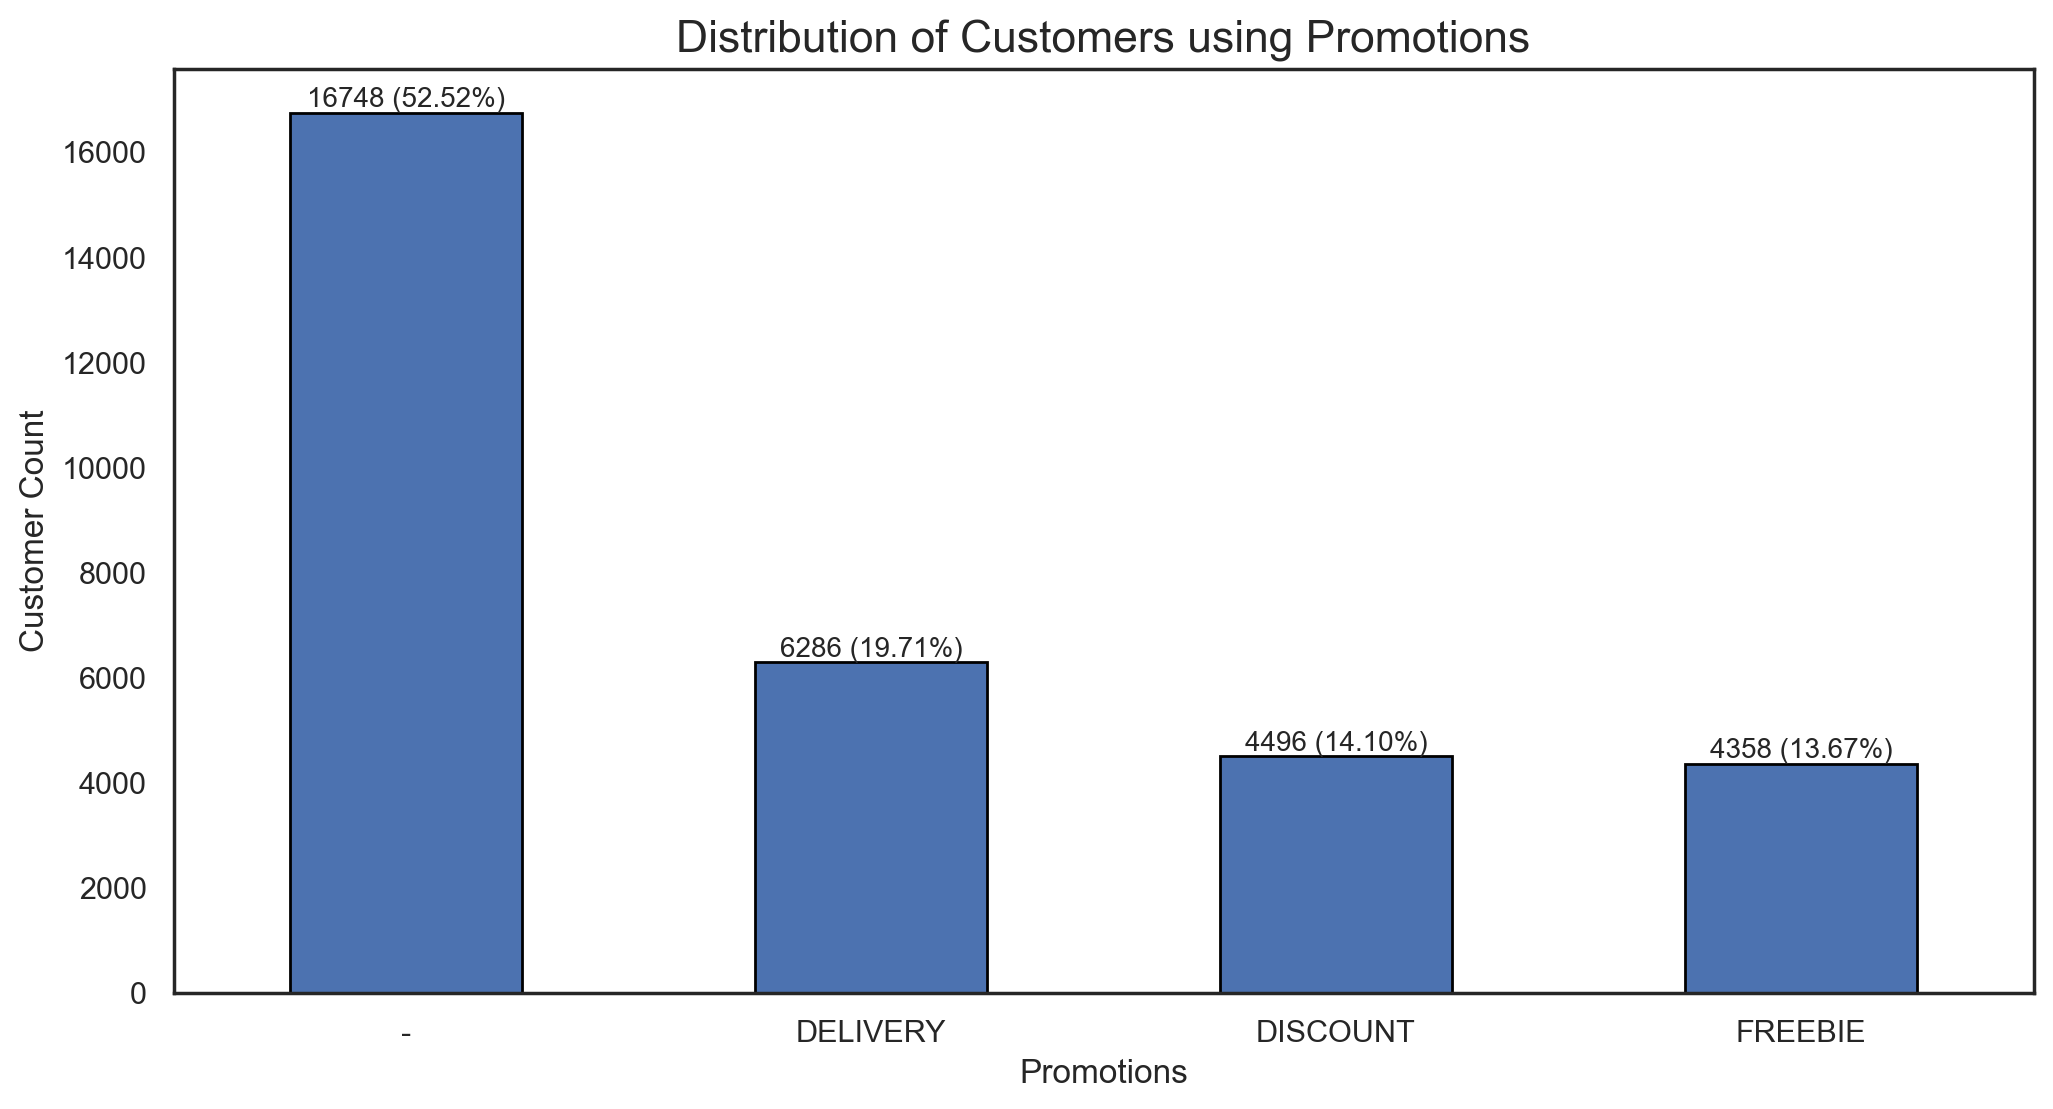

In [198]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

last_promo_count = customers["last_promo"].value_counts()
last_promo_percent = customers["last_promo"].value_counts(normalize=True) * 100

last_promo_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(last_promo_count, last_promo_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Customers using Promotions", fontsize=16)
plt.xlabel("Promotions", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

As last_promo represents the last type of promotion or discount used, it does not give us the most used type of promotion. Therefore, creating a new variable indicating if a promotion or discount was used or not might be more useful.

In [199]:
last_promo_mapping = {"-": "NO",
                      "DELIVERY": "YES",
                      "DISCOUNT": "YES",
                      "FREEBIE": "YES"}

# Create a new column with the cities divided into 3 and "-"
customers["promo_used"] = customers["last_promo"].map(last_promo_mapping)

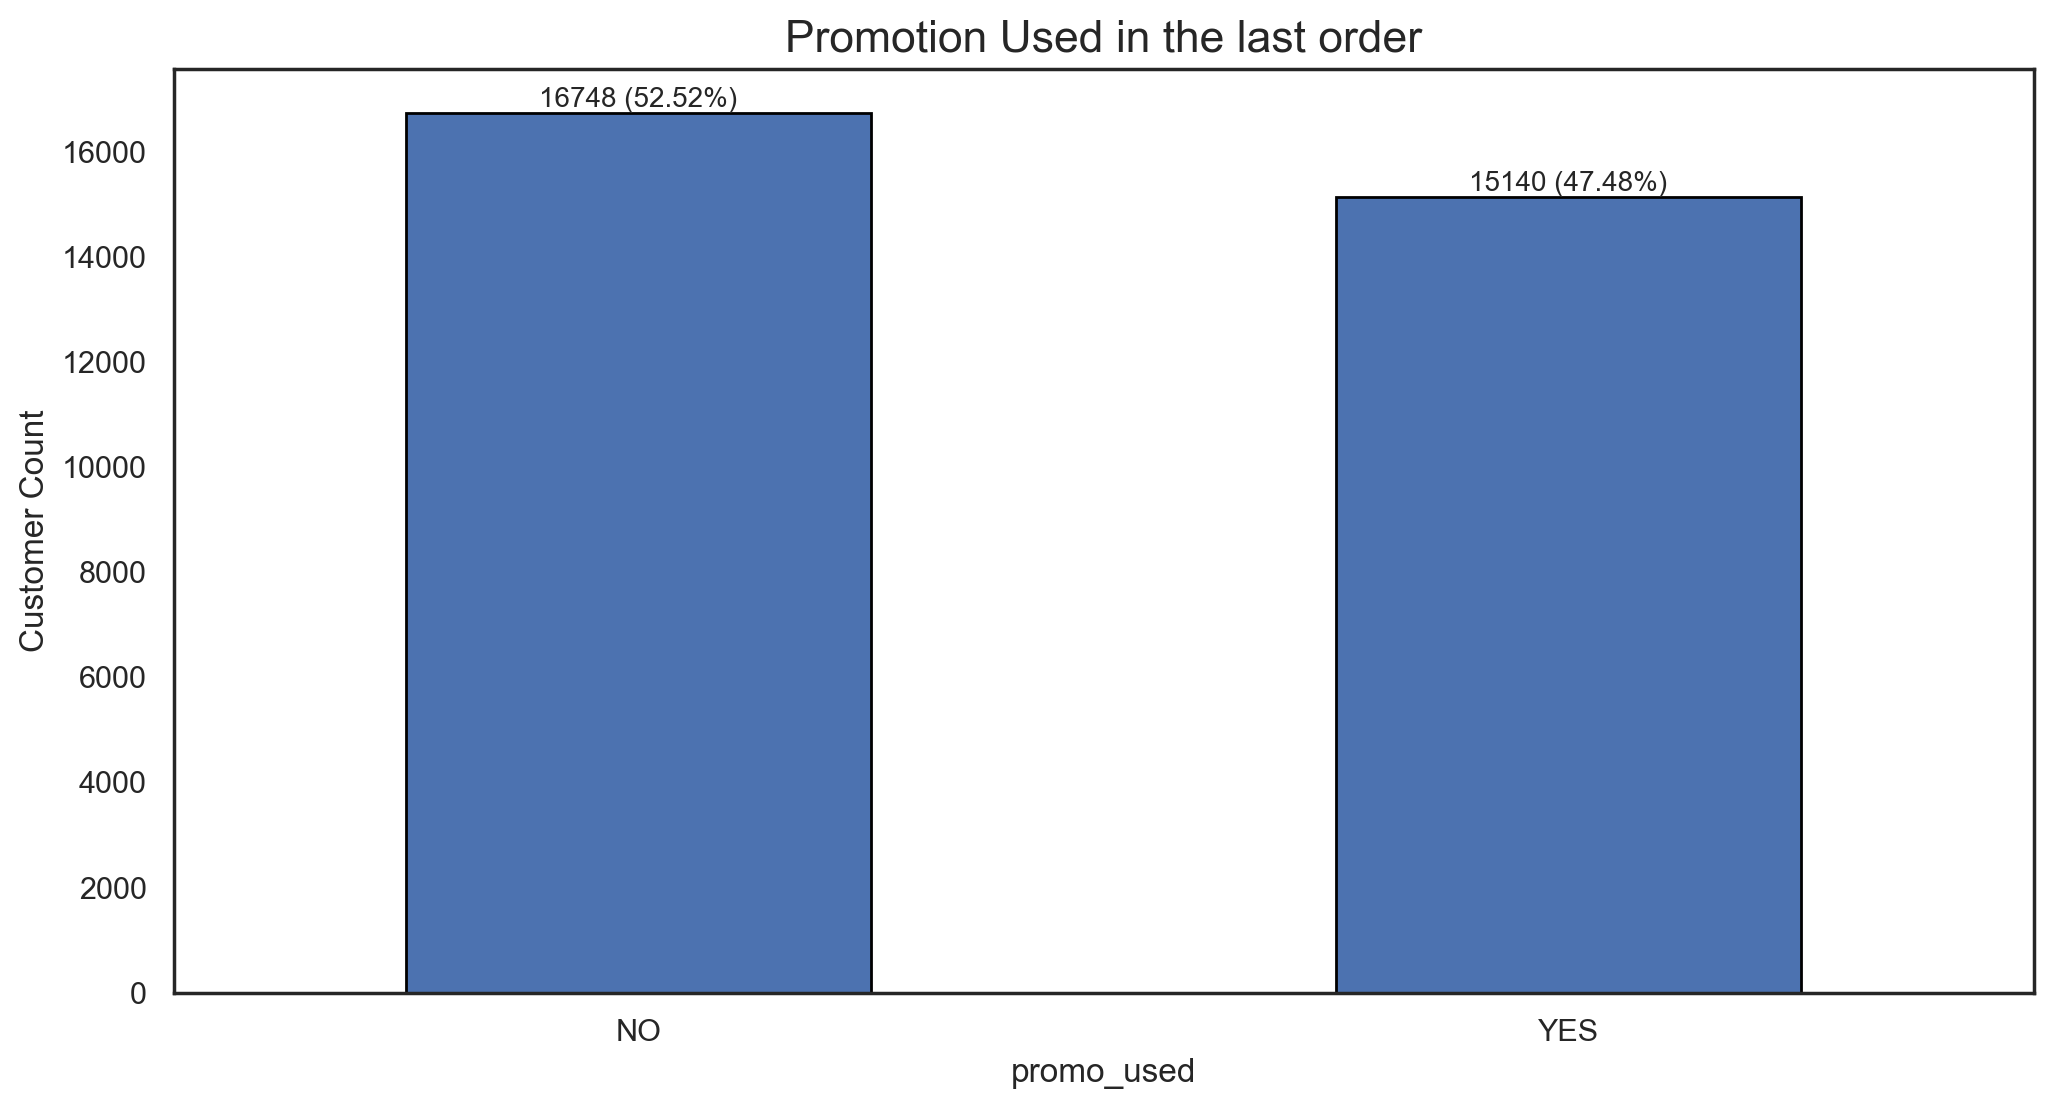

In [200]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

promo_used_count = customers["promo_used"].value_counts()
promo_used_percent = customers["promo_used"].value_counts(normalize=True) * 100

promo_used_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(promo_used_count, promo_used_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Promotion Used in the last order", fontsize=16)
#plt.xlabel("Cities", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="2nd-bullet">

##### c. payment_method
    
</a>

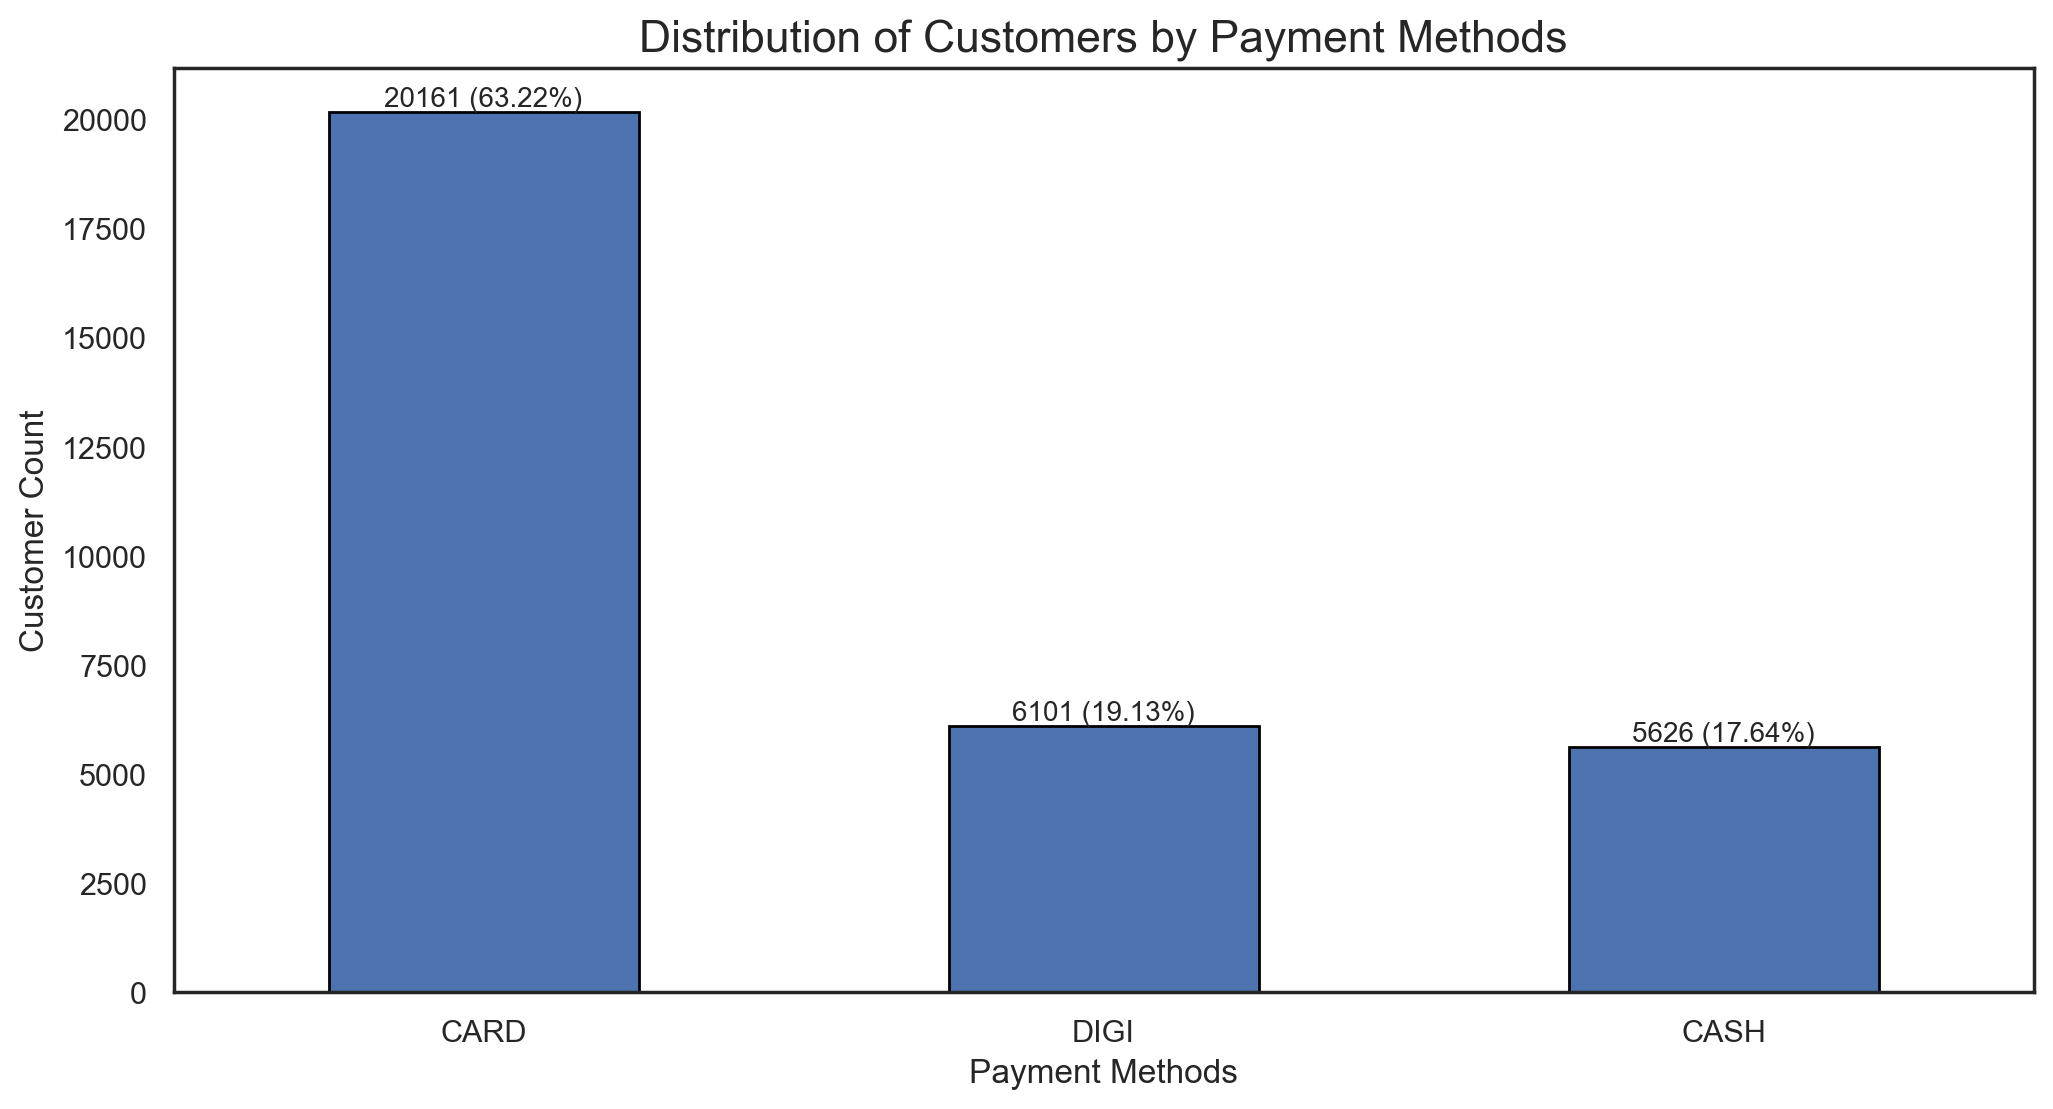

In [201]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

payment_method_count = customers["payment_method"].value_counts()
payment_method_percent = customers["payment_method"].value_counts(normalize=True) * 100

payment_method_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(payment_method_count, payment_method_percent)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Customers by Payment Methods", fontsize=16)
plt.xlabel("Payment Methods", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="2nd-bullet">

### 1.5 Feature Engeneering
    
</a>

In [202]:
customers.columns 

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'age_group',
       'vendor_diversity', 'active_period', 'total_spent', 'top_cuisine',
       'total_number_of_orders', 'city', 'promo_used'],
      dtype='object')

Throught out the analysis of the variables, the columns below have been added to the dataframe:
- 'age_group': categorise custumers into groups - teenagers, young adults, adults, middle-aged, older adults, senior
- 'vendor_diversity': categorise diversity in vendor choice - low diversity, moderate diversity, high diversity
- 'active_period': calculate the number of active days for each customer (i.e. the difference between last_order and first_order)
- 'total_spent': total spending for each customer across different cuisine types based on cuisine types
- 'top_cuisine': cuisine type on which each customer spends the most money most
- 'total_number_of_orders': total number of orders placed by each customer during the week
- 'city': classifies each region code into 3 cities based on the number the code starts with
- 'promo_used': indicates if any type of promotion was used in the last order

<a class="anchor" id="2nd-bullet">

#### 1.5.1 Spending Habit
    
</a>

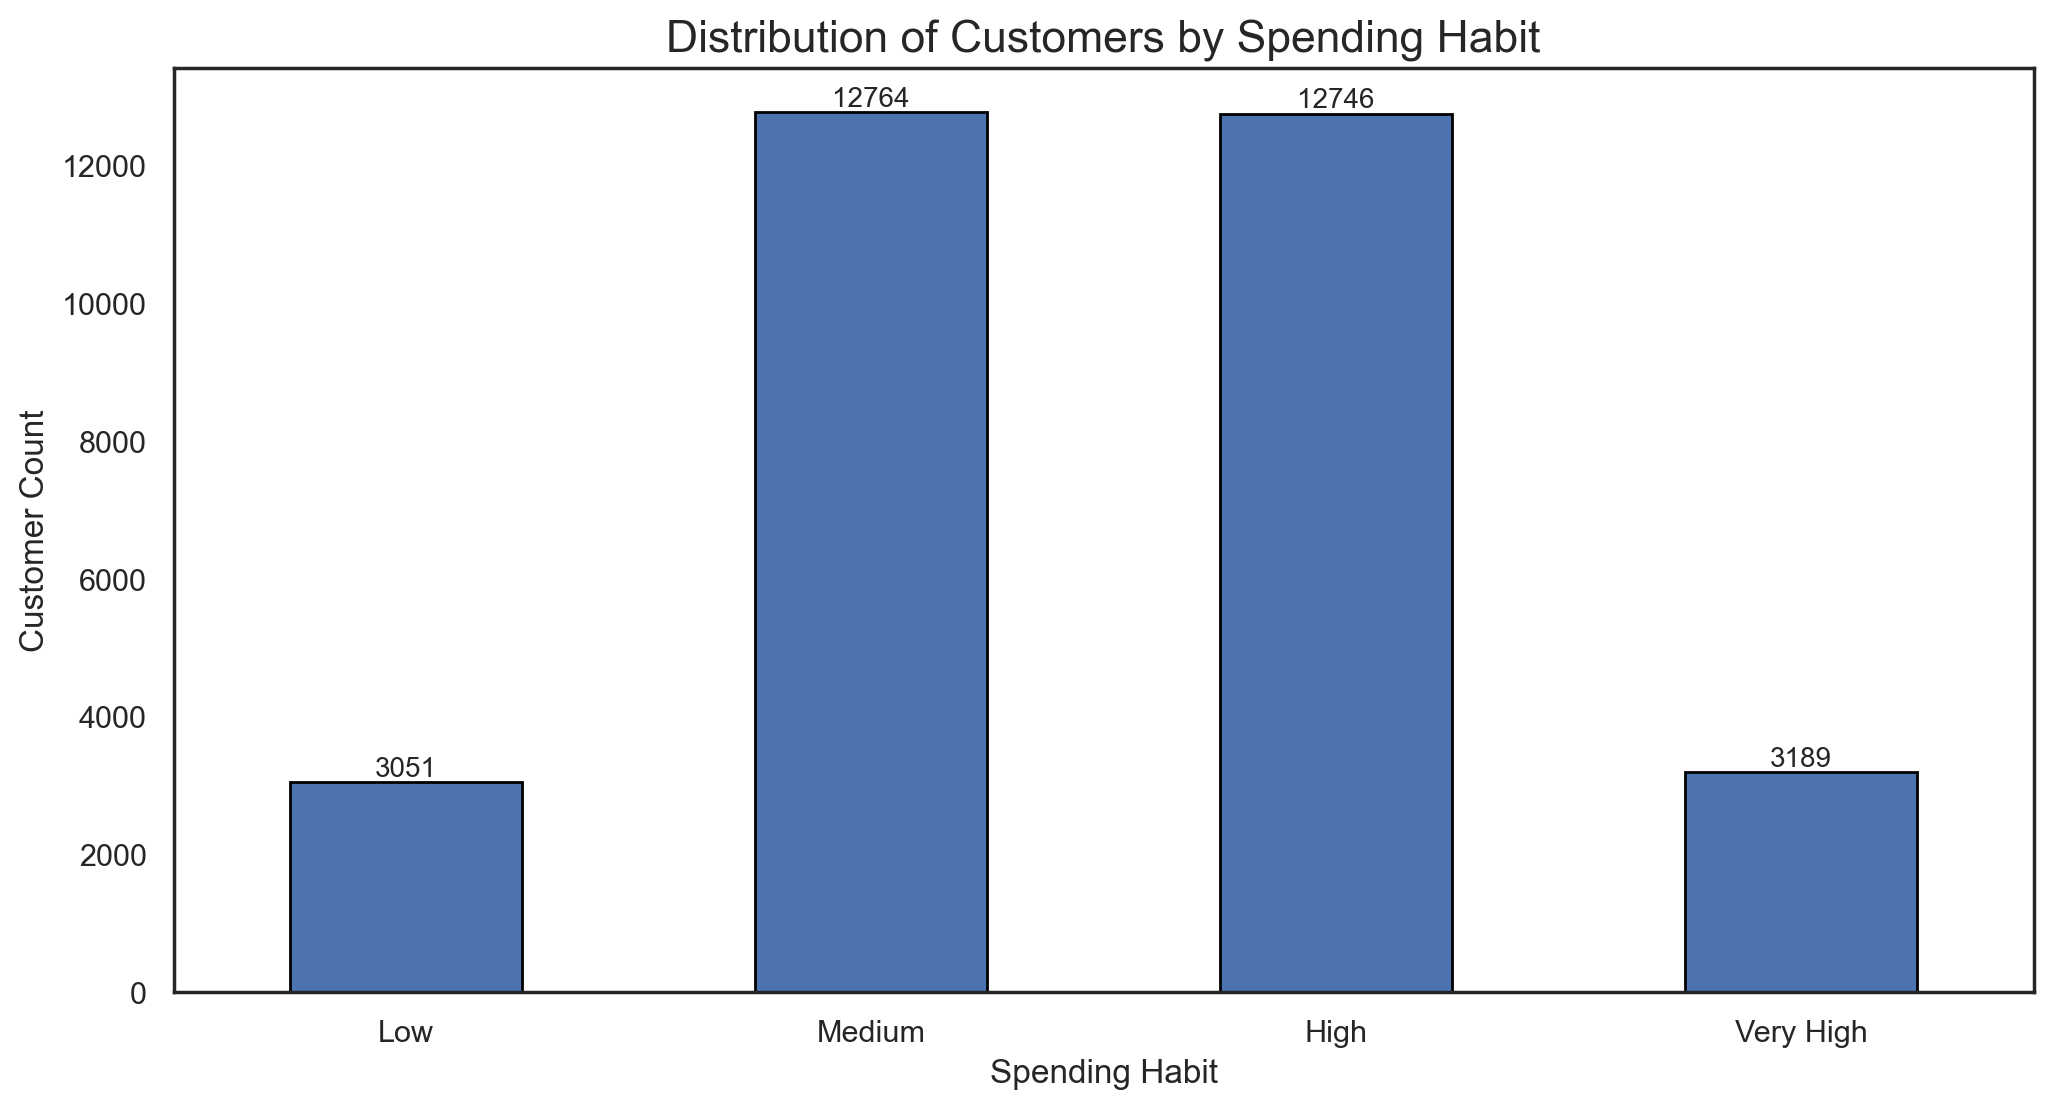

Spending Categories based on total spending:
Low: Customers who spent less than 6.72.
Medium: Customers who spent between 6.72 and 24.14.
High: Customers who spent between 24.14 and 84.34.
Very High: Customers who spent more than 84.34.


In [203]:
# Calculate percentiles 10, 50 and 90
low_cutoff = customers['total_spent'].quantile(0.1)
medium_cutoff = customers['total_spent'].quantile(0.5)
high_cutoff = customers['total_spent'].quantile(0.9)

spending_bins = [0, low_cutoff, medium_cutoff, high_cutoff, float('inf')]
spending_labels = ['Low', 'Medium', 'High', 'Very High']

customers['spending_habit'] = pd.cut(customers['total_spent'], bins=spending_bins, labels=spending_labels, ordered=True)

spending_habit_count = customers['spending_habit'].value_counts().reindex(spending_labels)

sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))
spending_habit_count.plot(kind="bar", edgecolor="black")

for index, value in enumerate(spending_habit_count):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Customers by Spending Habit", fontsize=16)
plt.xlabel("Spending Habit", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)

plt.show()

print(f"Spending Categories based on total spending:")
print(f"Low: Customers who spent less than {low_cutoff:.2f}.")
print(f"Medium: Customers who spent between {low_cutoff:.2f} and {medium_cutoff:.2f}.")
print(f"High: Customers who spent between {medium_cutoff:.2f} and {high_cutoff:.2f}.")
print(f"Very High: Customers who spent more than {high_cutoff:.2f}.")

<a class="anchor" id="2nd-bullet">

#### 1.5.2 Days of the Week and Hours
    
</a>

In [204]:
customers['start_week'] = customers['DOW_1'] + customers['DOW_2']
customers['mid_week'] = customers['DOW_3'] + customers['DOW_4']
customers['end_week'] = customers['DOW_5'] + customers['DOW_6'] + customers['DOW_0']

customers['night'] = customers[['HR_22', 'HR_23', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']].sum(axis=1)
customers['morning'] = customers[['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10']].sum(axis=1)
customers['midday'] = customers[['HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
customers['afternoon'] = customers[['HR_15', 'HR_16', 'HR_17']].sum(axis=1)
customers['evening'] = customers[['HR_18', 'HR_19', 'HR_20', 'HR_21']].sum(axis=1)

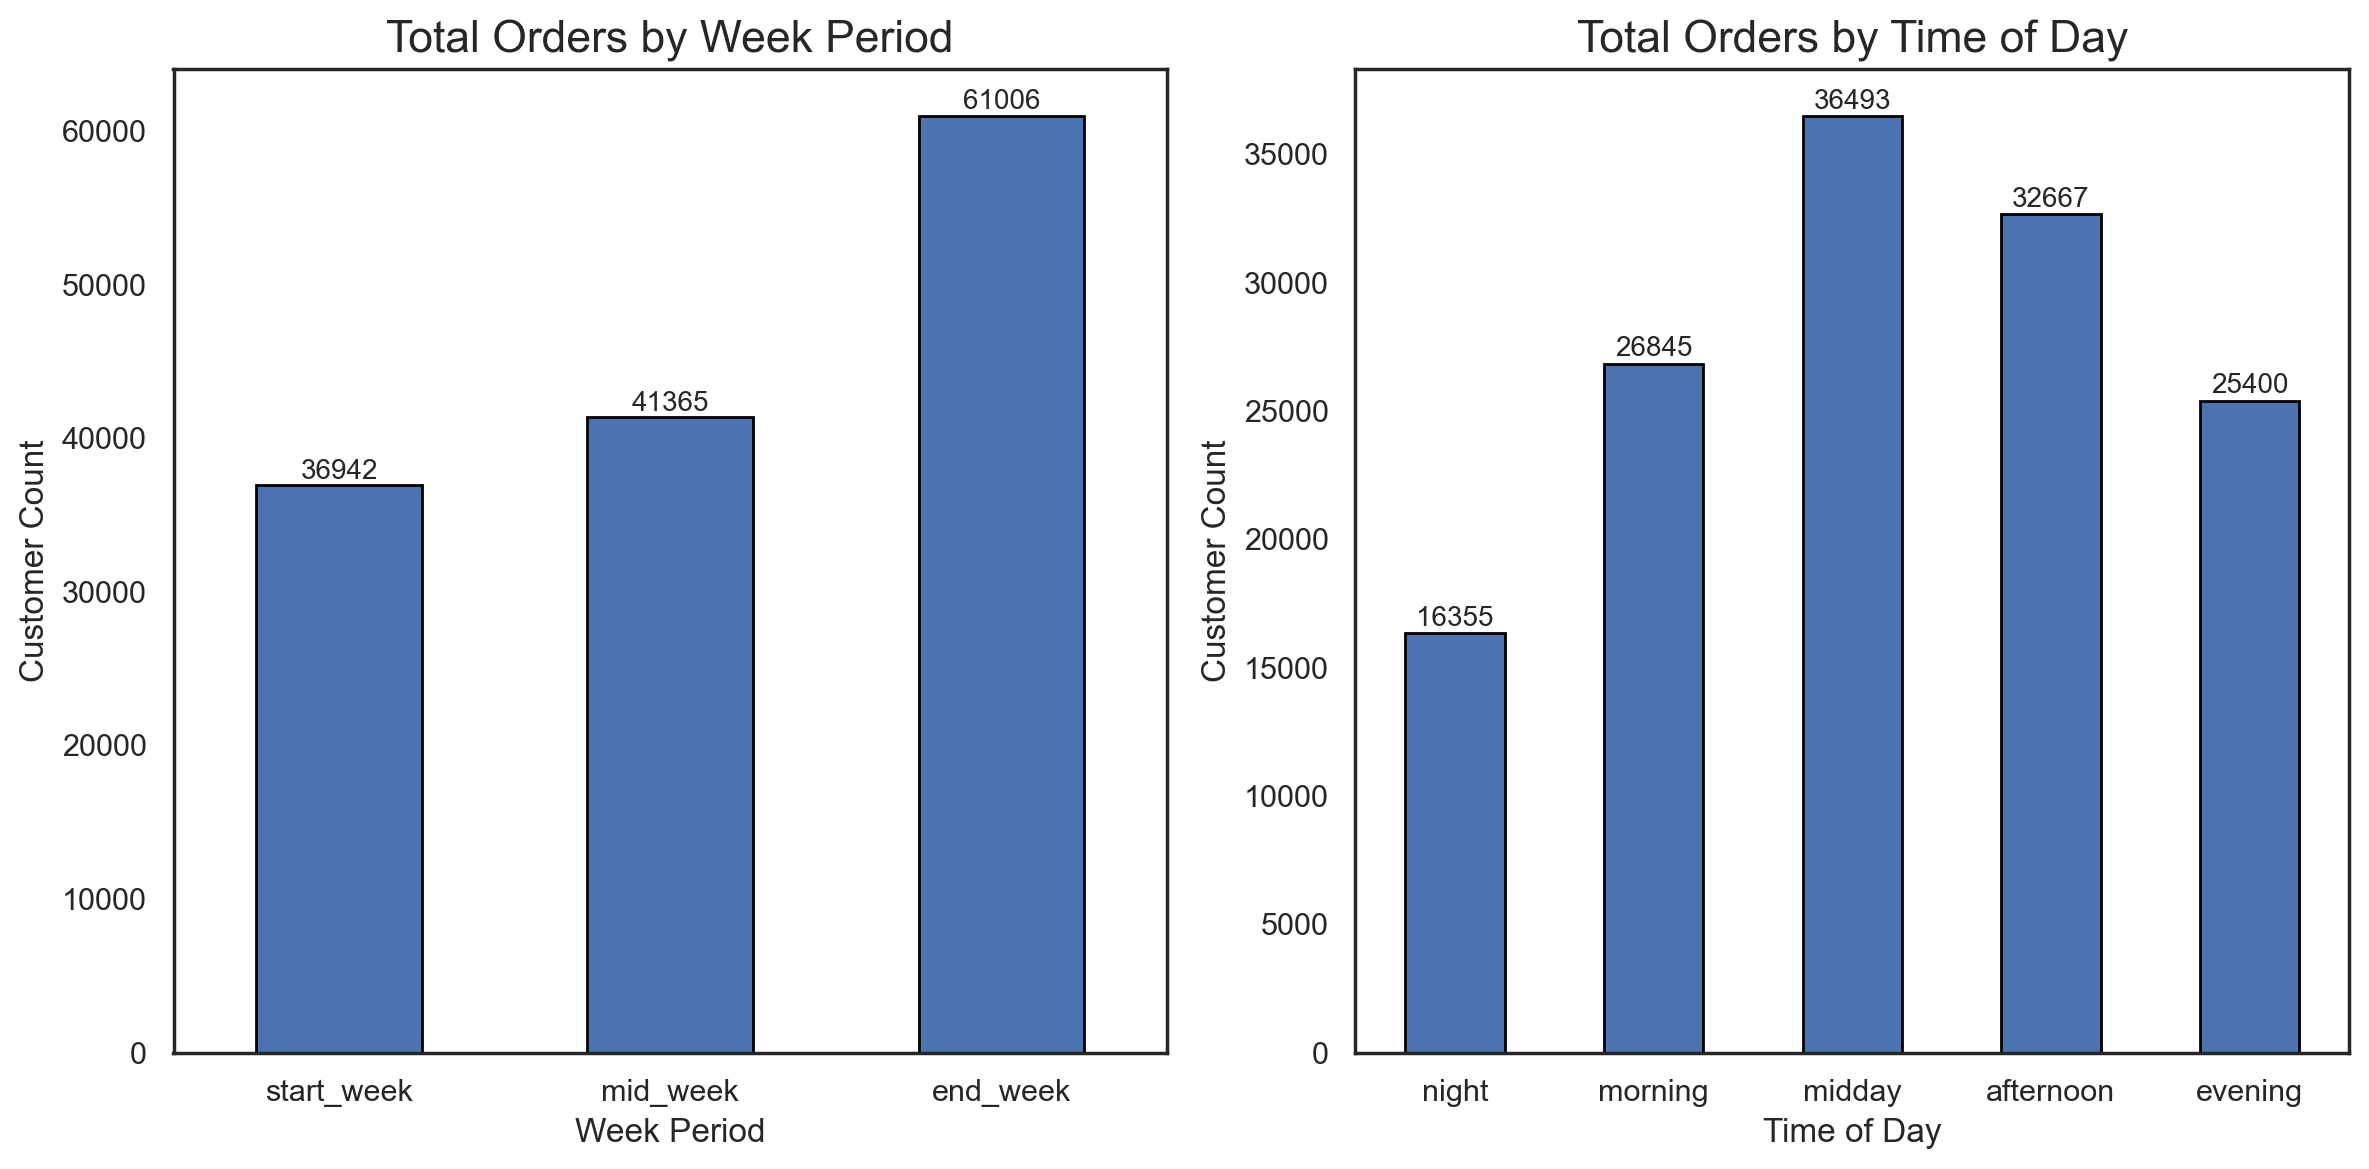

In [205]:
week = ['start_week', 'mid_week', 'end_week']
day = ["night", "morning", "midday", "afternoon", "evening"]

sns.set()
sns.set_style("white")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

week_totals = customers[week].sum()
week_totals.plot(kind='bar', stacked=True, edgecolor="black", ax=ax1)
ax1.set_title("Total Orders by Week Period", fontsize=16)
ax1.set_xlabel("Week Period", fontsize=12)
ax1.set_ylabel("Customer Count", fontsize=12)
ax1.tick_params(axis='x', rotation=0)

for index, value in enumerate(week_totals):
    ax1.text(index, value + 50, str(int(value)), ha='center', va='bottom', fontsize=10)

day_totals = customers[day].sum()
day_totals.plot(kind='bar', stacked=True, edgecolor="black", ax=ax2)
ax2.set_title("Total Orders by Time of Day", fontsize=16)
ax2.set_xlabel("Time of Day", fontsize=12)
ax2.set_ylabel("Customer Count", fontsize=12)
ax2.tick_params(axis='x', rotation=0)

for index, value in enumerate(day_totals):
    ax2.text(index, value + 50, str(int(value)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<a class="anchor" id="2nd-bullet">

#### 1.5.3 Non chain orders & chain preference 
    
</a>

In [206]:
# Calculate the number of non-chain orders
customers['non_chain_orders'] = customers['total_number_of_orders'] - customers['is_chain']

In [207]:
customers[customers['non_chain_orders']<0]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
f687717dc1             8670          21.0             0              0   
376f896388             8670          29.0             0              0   
8a7b681c19             8670          17.0             0              0   
a2b54d0827             8670          24.0             0              0   
...                     ...           ...           ...            ...   
00b63adfed             8670          27.0             0              0   
c3d607c31f             8670          35.0             0              0   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
376f896388          1          7.0           7   DELIVERY           CARD   
8a7b681c19          1          7.0           7          -           CASH   
a2b54d0827          1          7.0           7   DELIVERY           CASH   
...               ...          ...         ...        ...            ...   
00b63adfed          1         84.0          84   DELIVERY           CASH   
c3d607c31f          1         85.0          85   DISCOUNT           DIGI   
177ede2420          1         86.0          86          -           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
4c06e104de          1         89.0          89          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
4903041977            0.0        0.0            0.0       0.0   
f687717dc1            0.0        0.0            0.0       0.0   
376f896388            0.0        0.0            0.0       0.0   
8a7b681c19            0.0        0.0            0.0       0.0   
a2b54d0827            0.0        0.0            0.0       0.0   
...                   ...        ...            ...       ...   
00b63adfed            0.0        0.0            0.0       0.0   
c3d607c31f            0.0        0.0            0.0       0.0   
177ede2420            0.0        0.0            0.0       0.0   
0039059c9c            0.0        0.0            0.0       0.0   
4c06e104de            0.0        0.0            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
4903041977                  0.0          0.0           0.0          0.0   
f687717dc1                  0.0          0.0           0.0          0.0   
376f896388                  0.0          0.0           0.0          0.0   
8a7b681c19                  0.0          0.0           0.0          0.0   
a2b54d0827                  0.0          0.0           0.0          0.0   
...                         ...          ...           ...          ...   
00b63adfed                  0.0          0.0           0.0          0.0   
c3d607c31f                  0.0          0.0           0.0          0.0   
177ede2420                  0.0          0.0           0.0          0.0   
0039059c9c                  0.0          0.0           0.0          0.0   
4c06e104de                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
4903041977          0.0          0.0           0.0                0.0   
f687717dc1         

non_chain_orders represents orders from non-chain restaurants and should give a non-negative number for every customer. However, there are 75 rows where non_chain_orders is negative, which is incoherent. A possible solution is to remove after treating duplicates, missing values and other inconsistencies found earlier as there are only 75 ou + 31000 rows.

In [208]:
# Remove rows where non_chain_orders is negative, since there are only 75 out of +31000 rows
# customers = customers[customers['non_chain_orders'] >= 0]
# print(f"Remaining rows after removal: {len(customers)}")

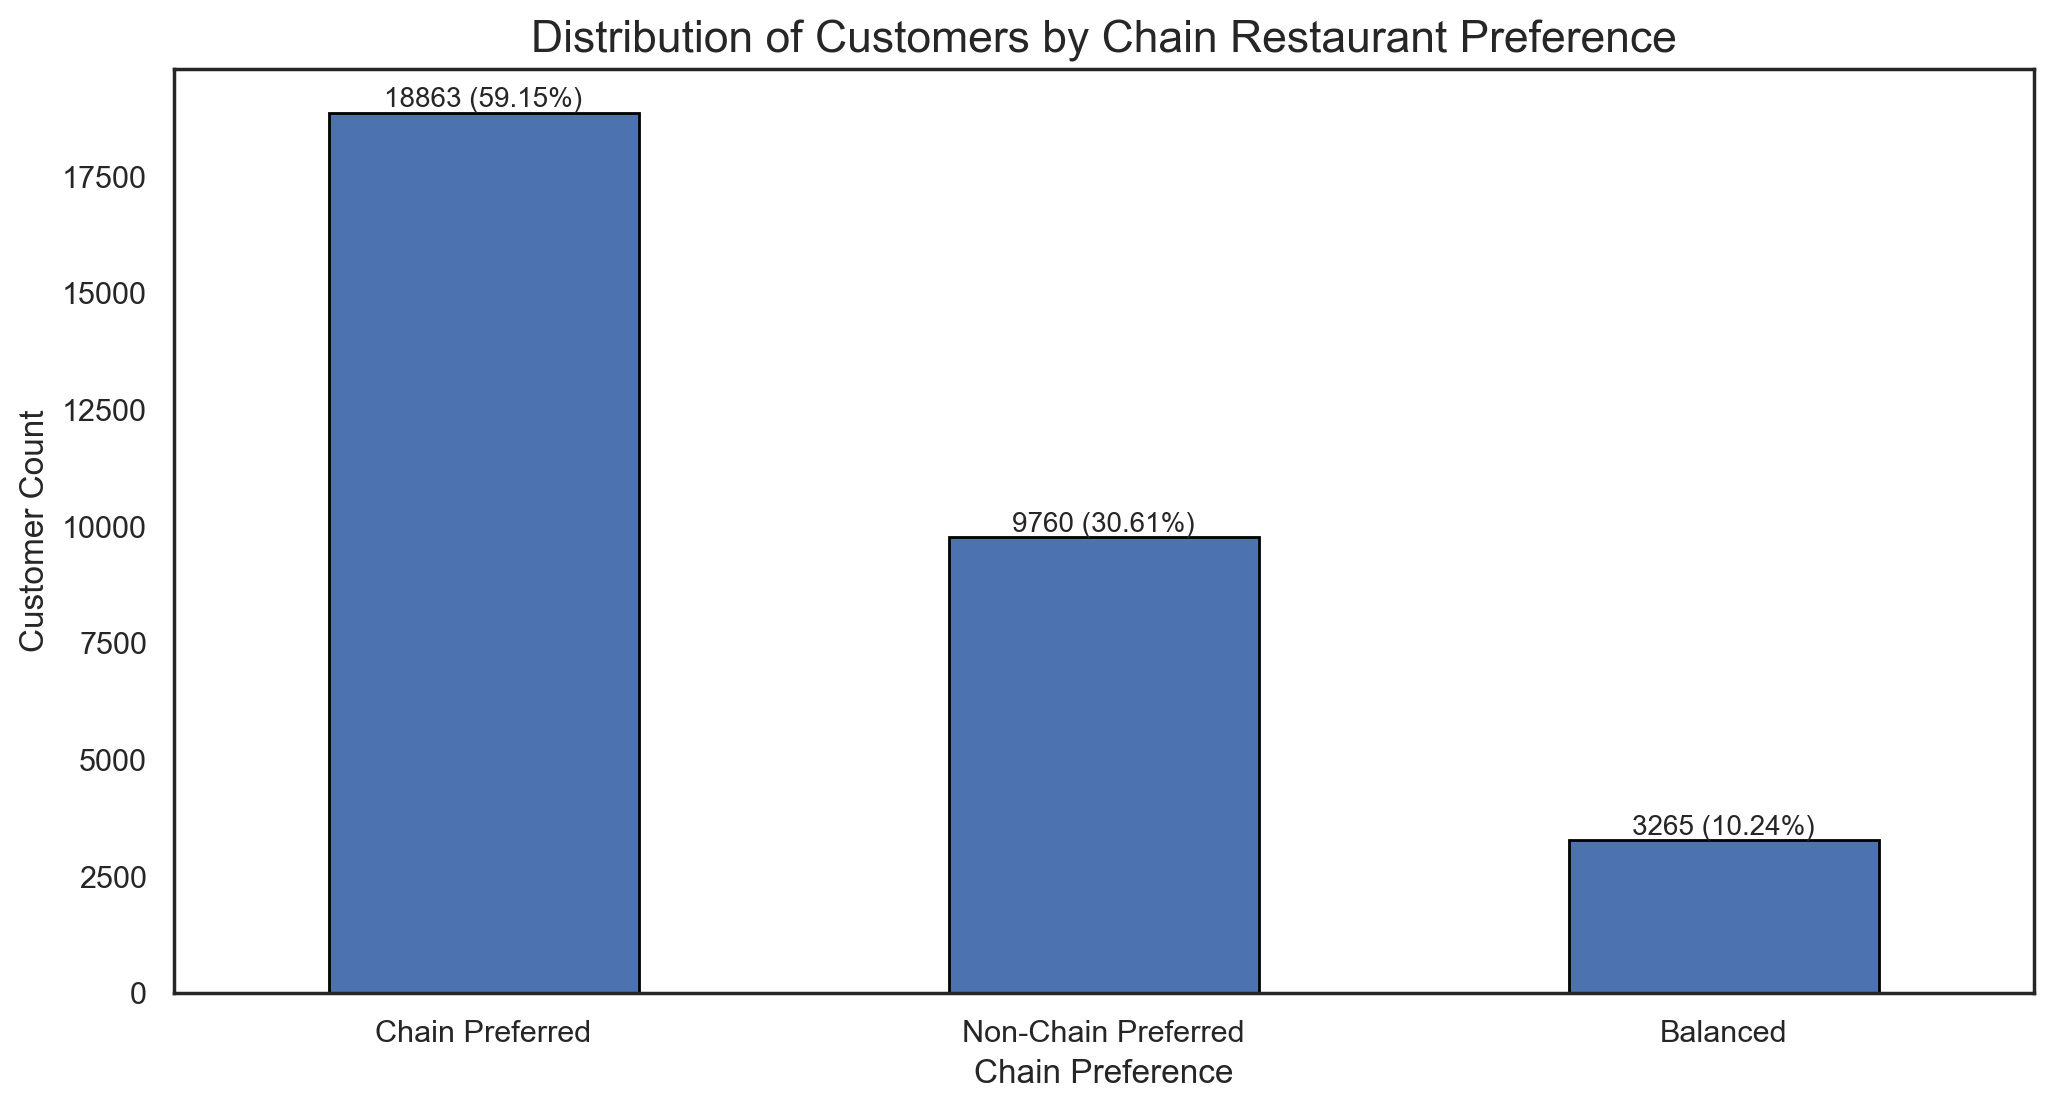

In [209]:
# Define preference based on the comparison between chain and non-chain orders
def classify_preference(row):
    if row['is_chain'] > row['non_chain_orders']:
        return 'Chain Preferred'
    elif row['non_chain_orders'] > row['is_chain']:
        return 'Non-Chain Preferred'
    else:
        return 'Balanced'

# Apply the function to classify each customer's preference
customers['chain_preference'] = customers.apply(classify_preference, axis=1)

sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))

chain_preference_count = customers['chain_preference'].value_counts()
chain_prefernce_percentage = customers['chain_preference'].value_counts(normalize=True) * 100

chain_preference_count.plot(kind="bar", edgecolor="black")

for index, (count, percent) in enumerate(zip(chain_preference_count, chain_prefernce_percentage)):
    plt.text(index, count + 1, f"{count} ({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Customers by Chain Restaurant Preference", fontsize=16)
plt.xlabel("Chain Preference", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="2nd-bullet">

### 1.6 Multivariate Analysis
    
</a>

<a class="anchor" id="2nd-bullet">

##### a. payment_method & product_count
    
</a>

Investigate whether customers using different payment methods behave differently in terms of order volume and engagement.

payment_method
CARD    6.358613
CASH    4.137220
DIGI    4.798722
Name: product_count, dtype: float64


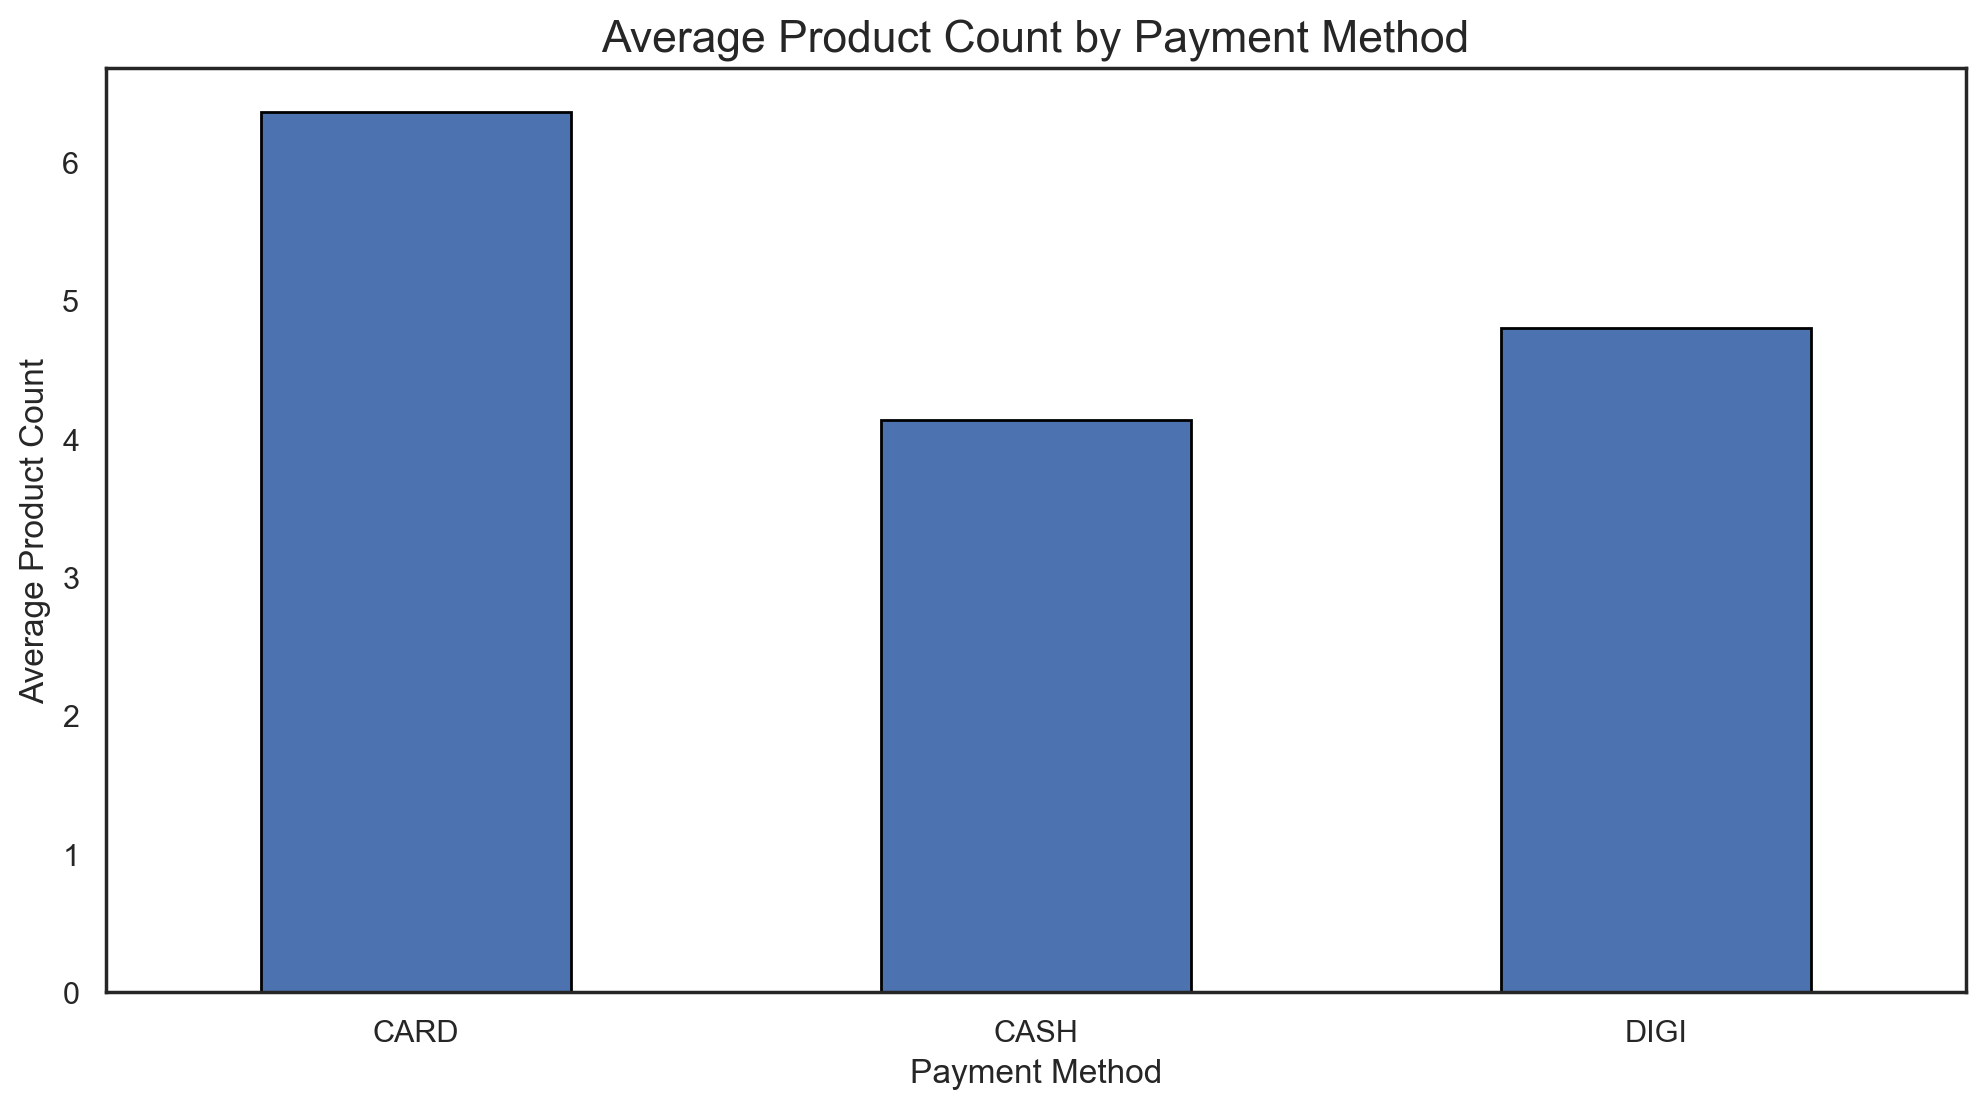

In [210]:
# Calculate the average product_count per payment method
payment_product_count = customers.groupby('payment_method')['product_count'].mean()
print(payment_product_count)

sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))
payment_product_count.plot(kind='bar', edgecolor='black')

plt.title('Average Product Count by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Average Product Count', fontsize=12)
plt.xticks(rotation=0)

plt.show()

Customers who pay by CARD tend to purchase more products on average than those who use CASH or DIGI (digital payment methods).

<a class="anchor" id="2nd-bullet">

##### b. city & last_promo/ payment_method
    
</a>

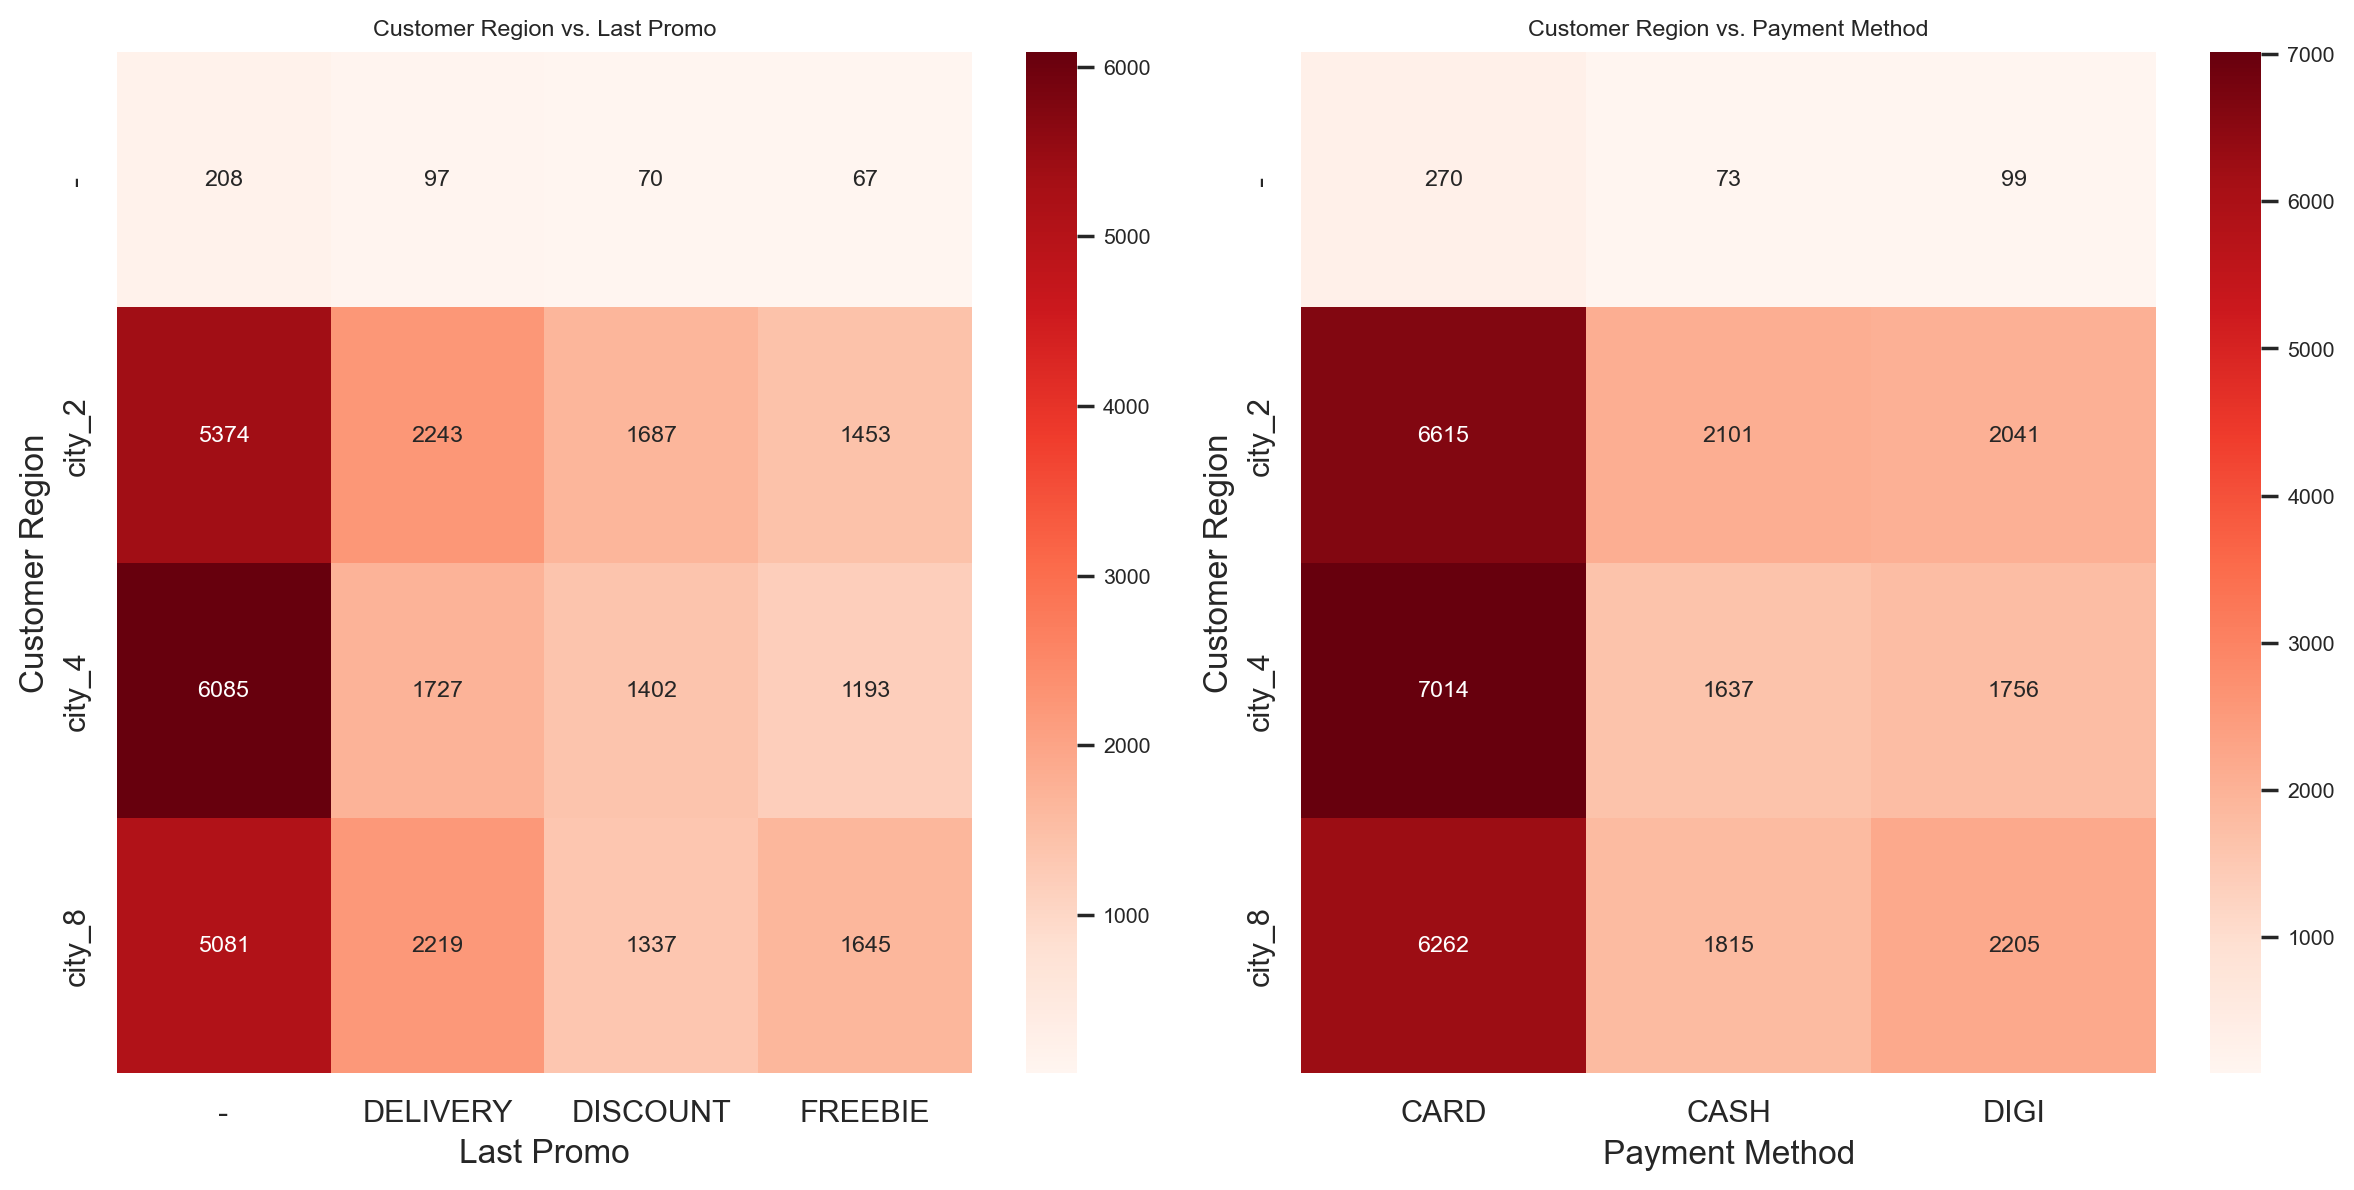

In [211]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.set(font_scale=0.7)

crosstab1 = pd.crosstab(customers['city'], customers['last_promo'])
crosstab2 = pd.crosstab(customers['city'], customers['payment_method'])

sns.heatmap(crosstab1, annot=True, fmt="d", cmap="Reds", ax = ax1)
ax1.set_title("Customer Region vs. Last Promo")
ax1.set_xlabel("Last Promo")
ax1.set_ylabel("Customer Region")

sns.heatmap(crosstab2, annot=True, fmt="d", cmap="Reds", ax = ax2)
ax2.set_title("Customer Region vs. Payment Method")
ax2.set_xlabel("Payment Method")
ax2.set_ylabel("Customer Region")

plt.tight_layout()
plt.show()

<a class="anchor" id="2nd-bullet">

##### c. vendor_diversity & customer_age/ product_count
    
</a>

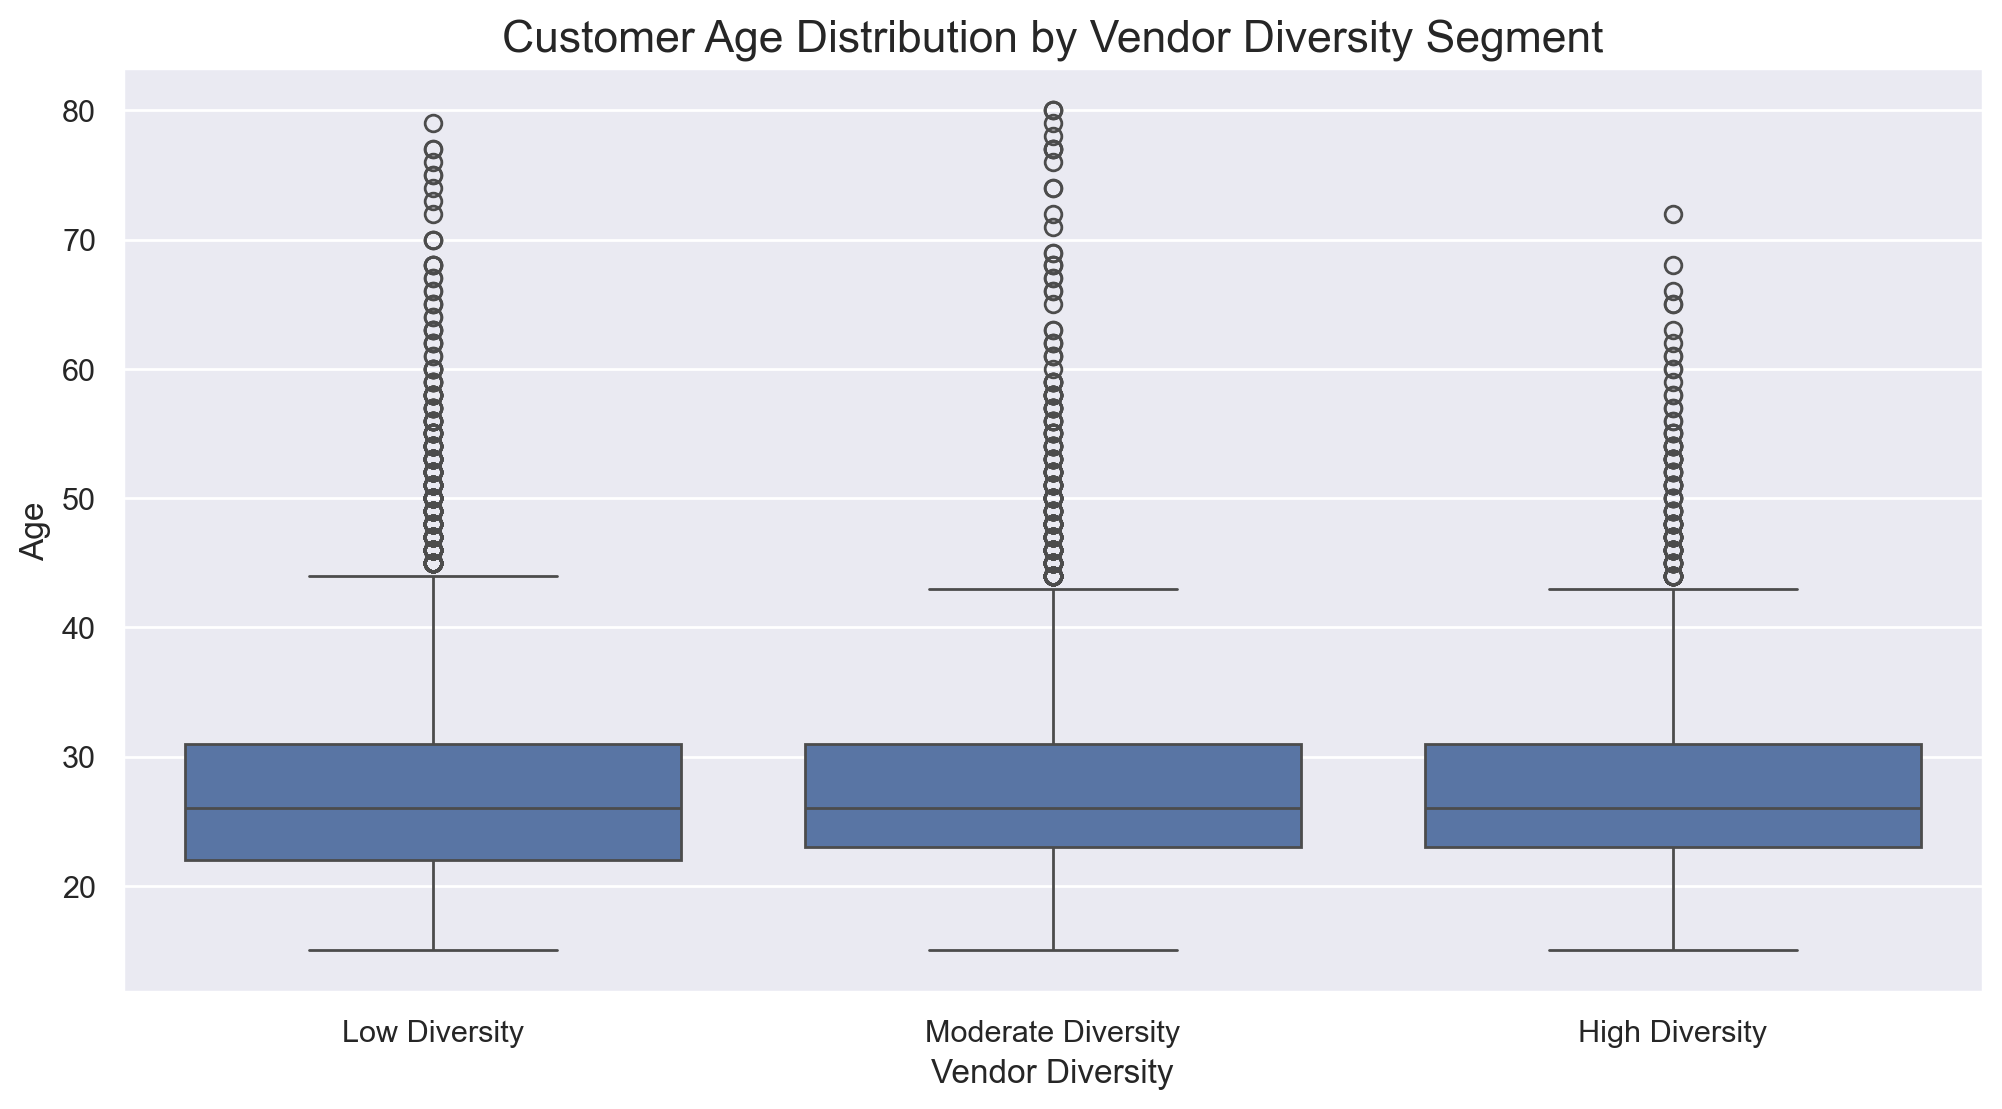

In [212]:
# Re-run the line of code to update customers_no_duplicates with new variables
customers_no_duplicates = customers[~customers.index.duplicated(keep="first")]

sns.set()
plt.figure(figsize=(12, 6))
sns.boxplot(x='vendor_diversity', y='customer_age', data=customers_no_duplicates)

plt.title("Customer Age Distribution by Vendor Diversity Segment", fontsize=16)
plt.xlabel("Vendor Diversity", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(rotation=0)

plt.show()

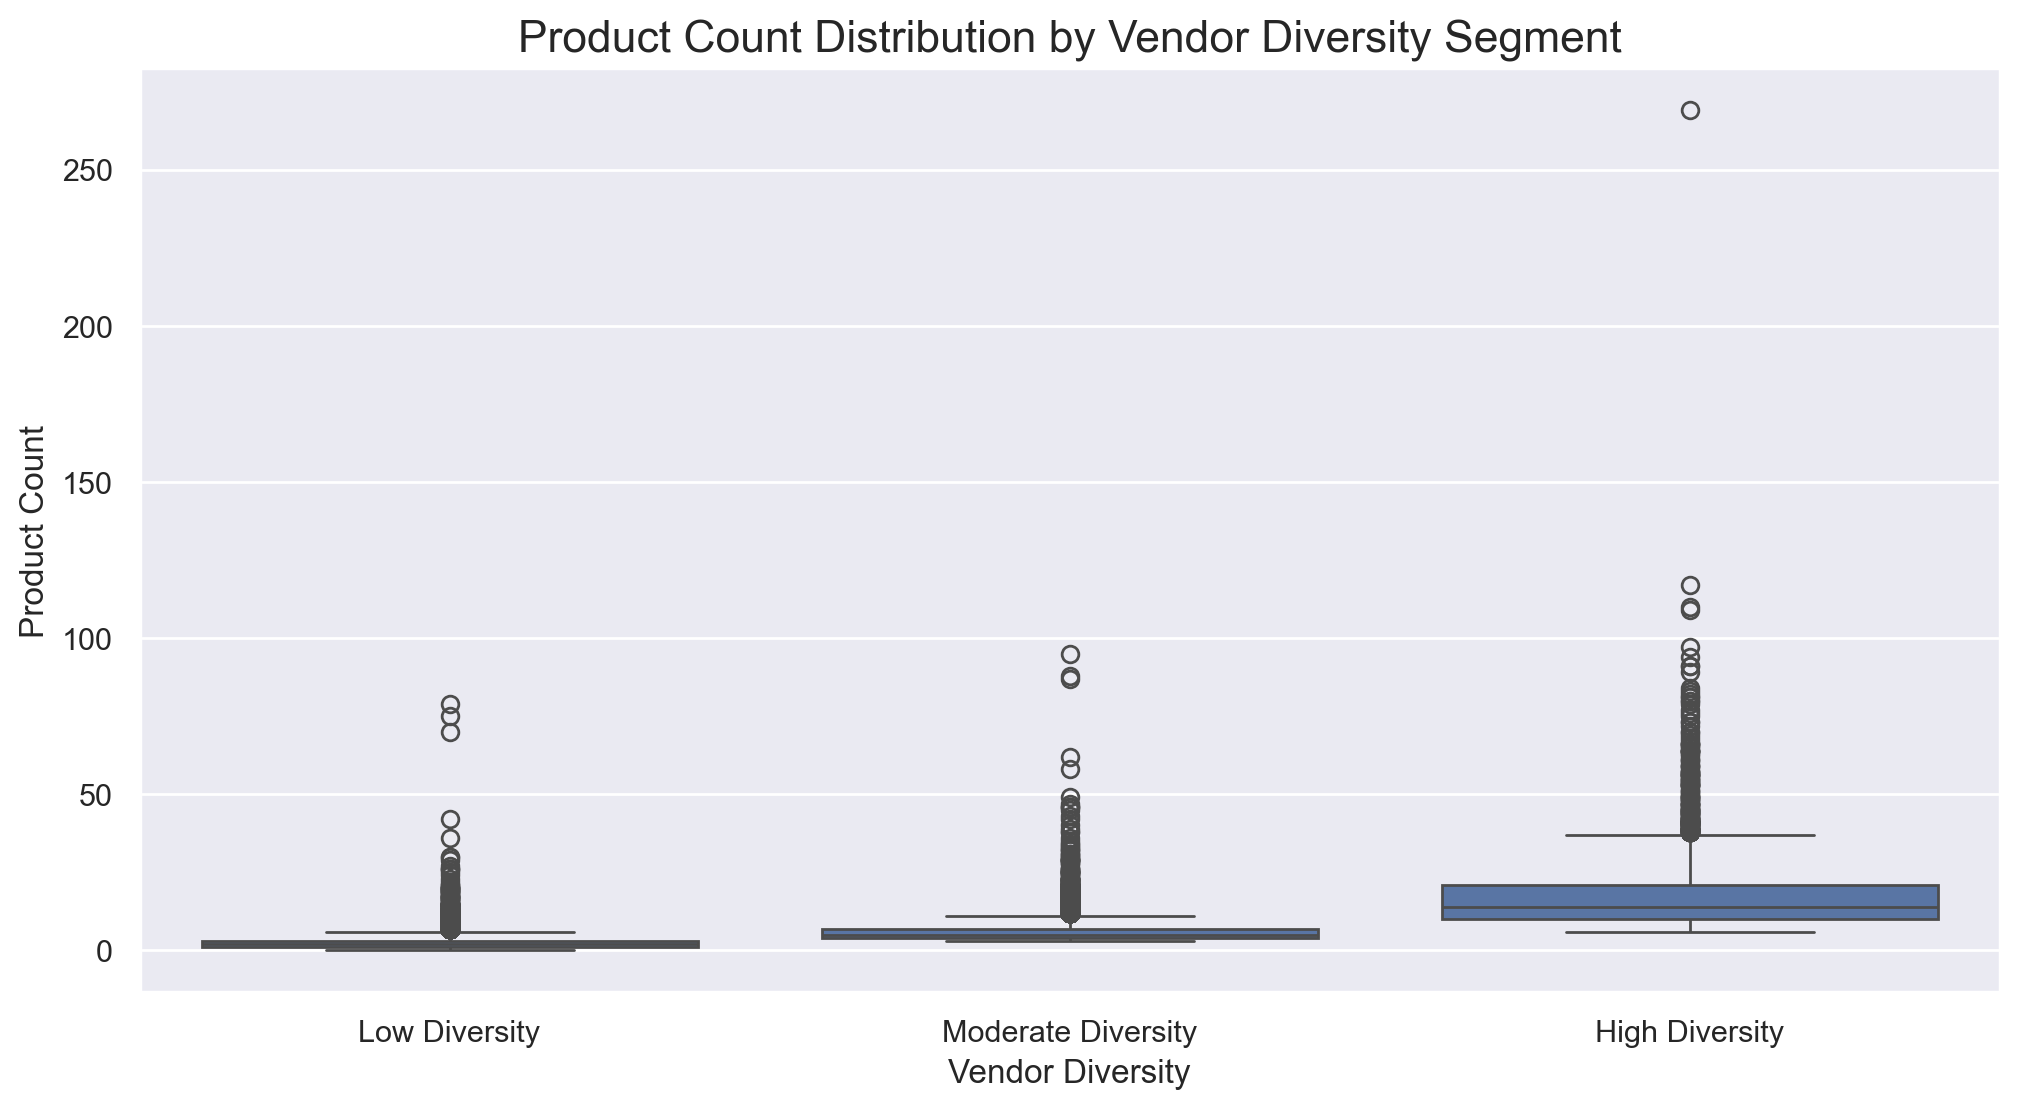

In [213]:
sns.set()
plt.figure(figsize=(12, 6))
sns.boxplot(x='vendor_diversity', y='product_count', data=customers_no_duplicates)

plt.title("Product Count Distribution by Vendor Diversity Segment", fontsize=16)
plt.xlabel("Vendor Diversity", fontsize=12)
plt.ylabel("Product Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="2nd-bullet">

##### d. top_cuisine & city
    
</a>

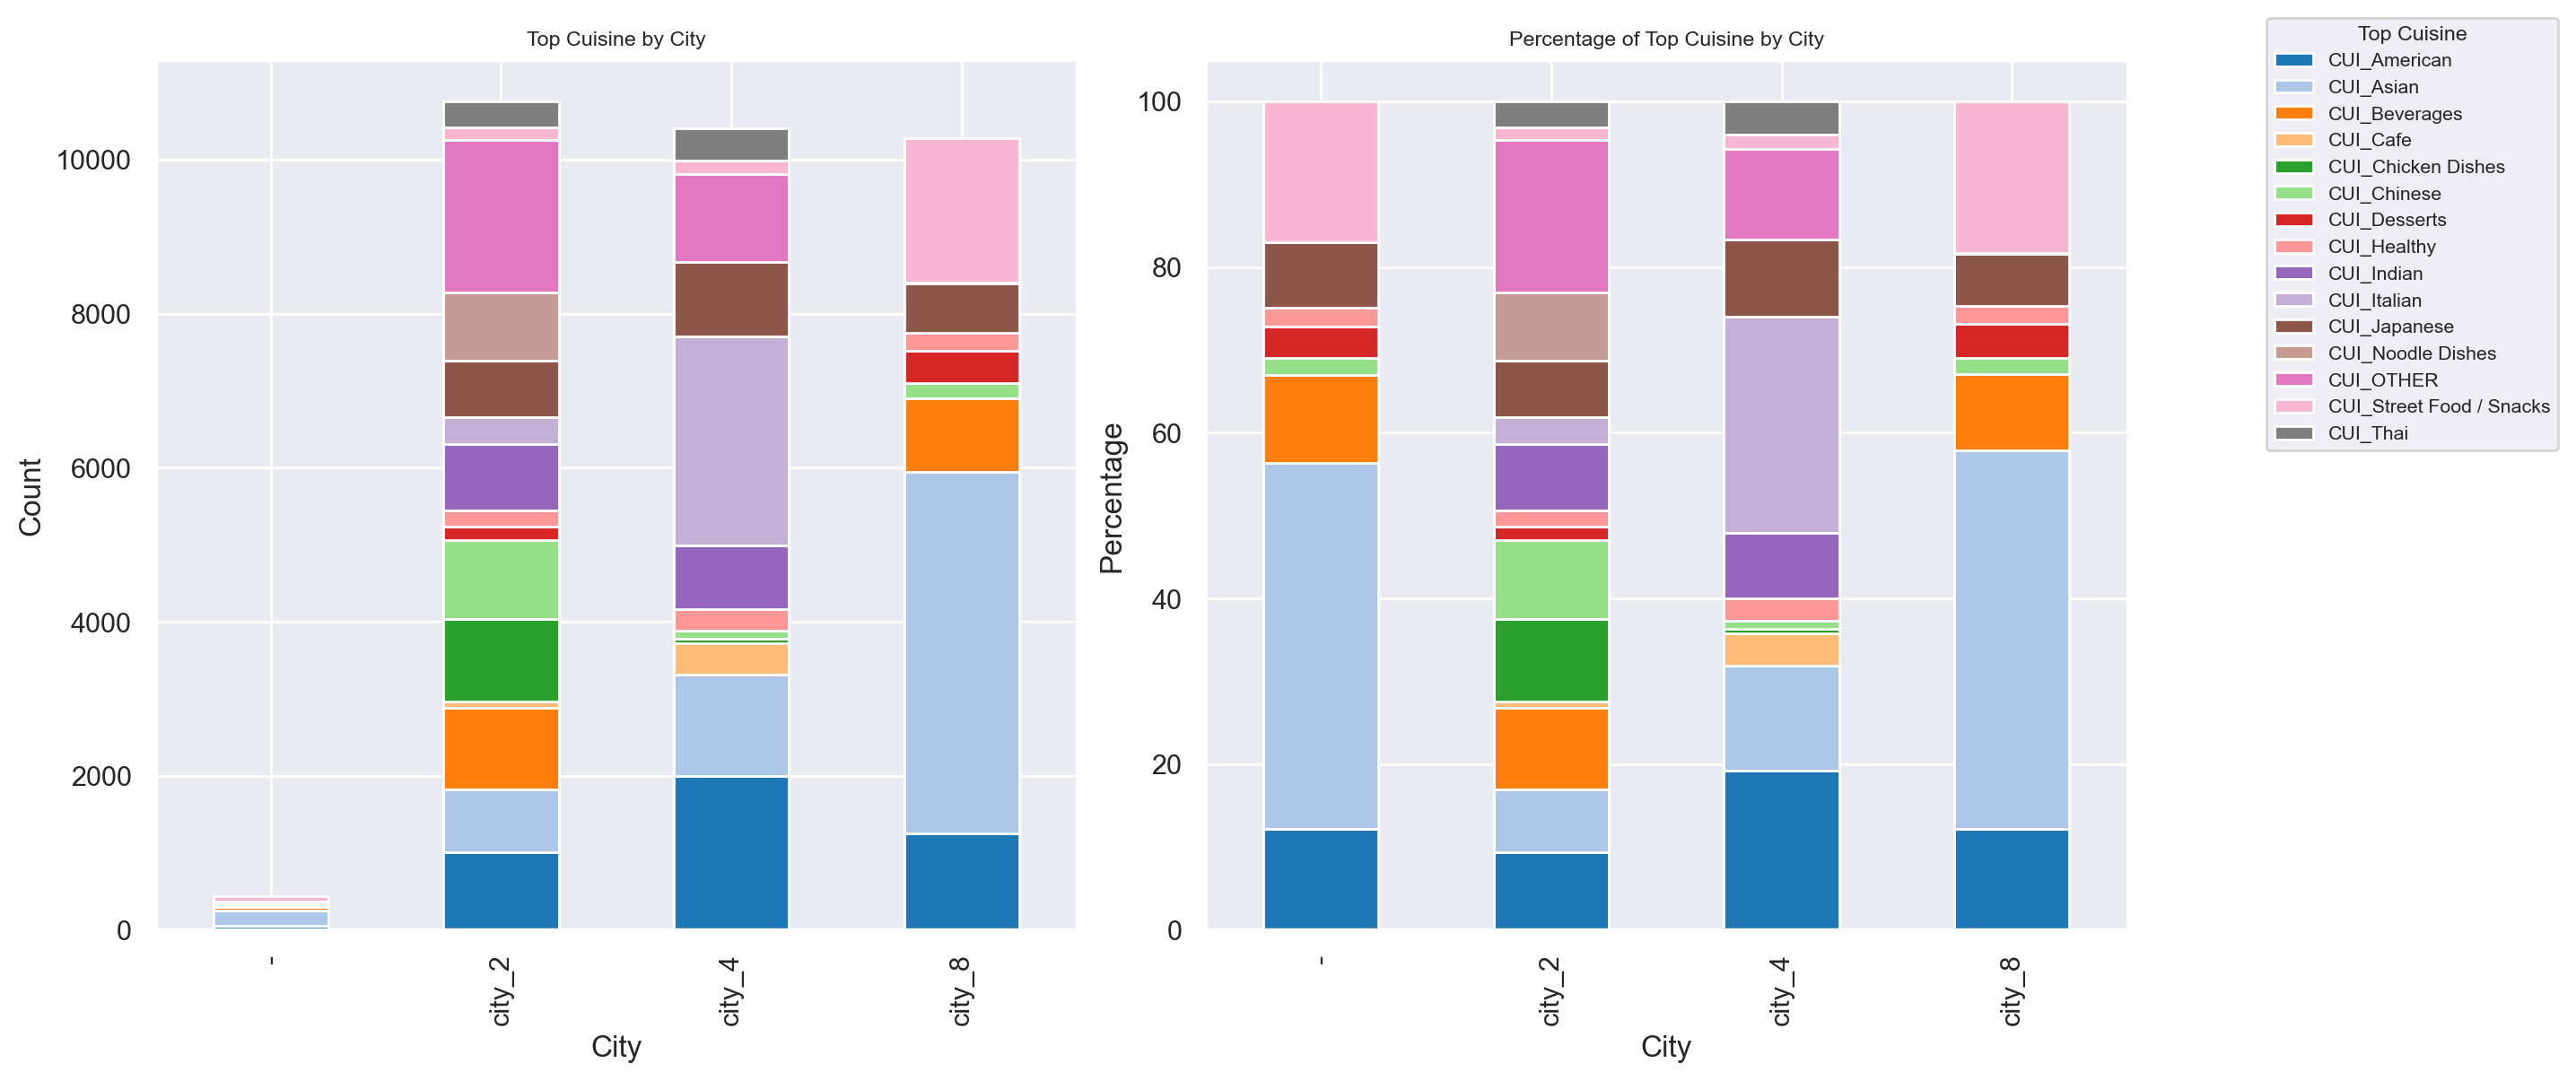

In [214]:
sns.set()
colors = sns.color_palette("tab20", n_colors=15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.set(font_scale=0.7)

preferred_cuisine_by_region = customers.groupby(['city', 'top_cuisine']).size().unstack()
preferred_cuisine_by_region_proportions = preferred_cuisine_by_region.div(preferred_cuisine_by_region.sum(axis=1), axis=0) * 100

preferred_cuisine_by_region.plot(kind='bar', stacked=True, ax=ax1, legend=False, color=colors)
ax1.set_title("Top Cuisine by City")
ax1.set_xlabel("City")
ax1.set_ylabel("Count")

preferred_cuisine_by_region_proportions.plot(kind='bar', stacked=True, ax=ax2, legend=False, color=colors)
ax2.set_title("Percentage of Top Cuisine by City")
ax2.set_xlabel("City")
ax2.set_ylabel("Percentage")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, title="Top Cuisine", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<a class="anchor" id="2nd-bullet">

##### e. Spending Habits and Order Behavior
    
</a>

**Objective**: Determine if there’s a relationship between customers’ spending habits and their order behavior, such as order frequency and vendor diversity.

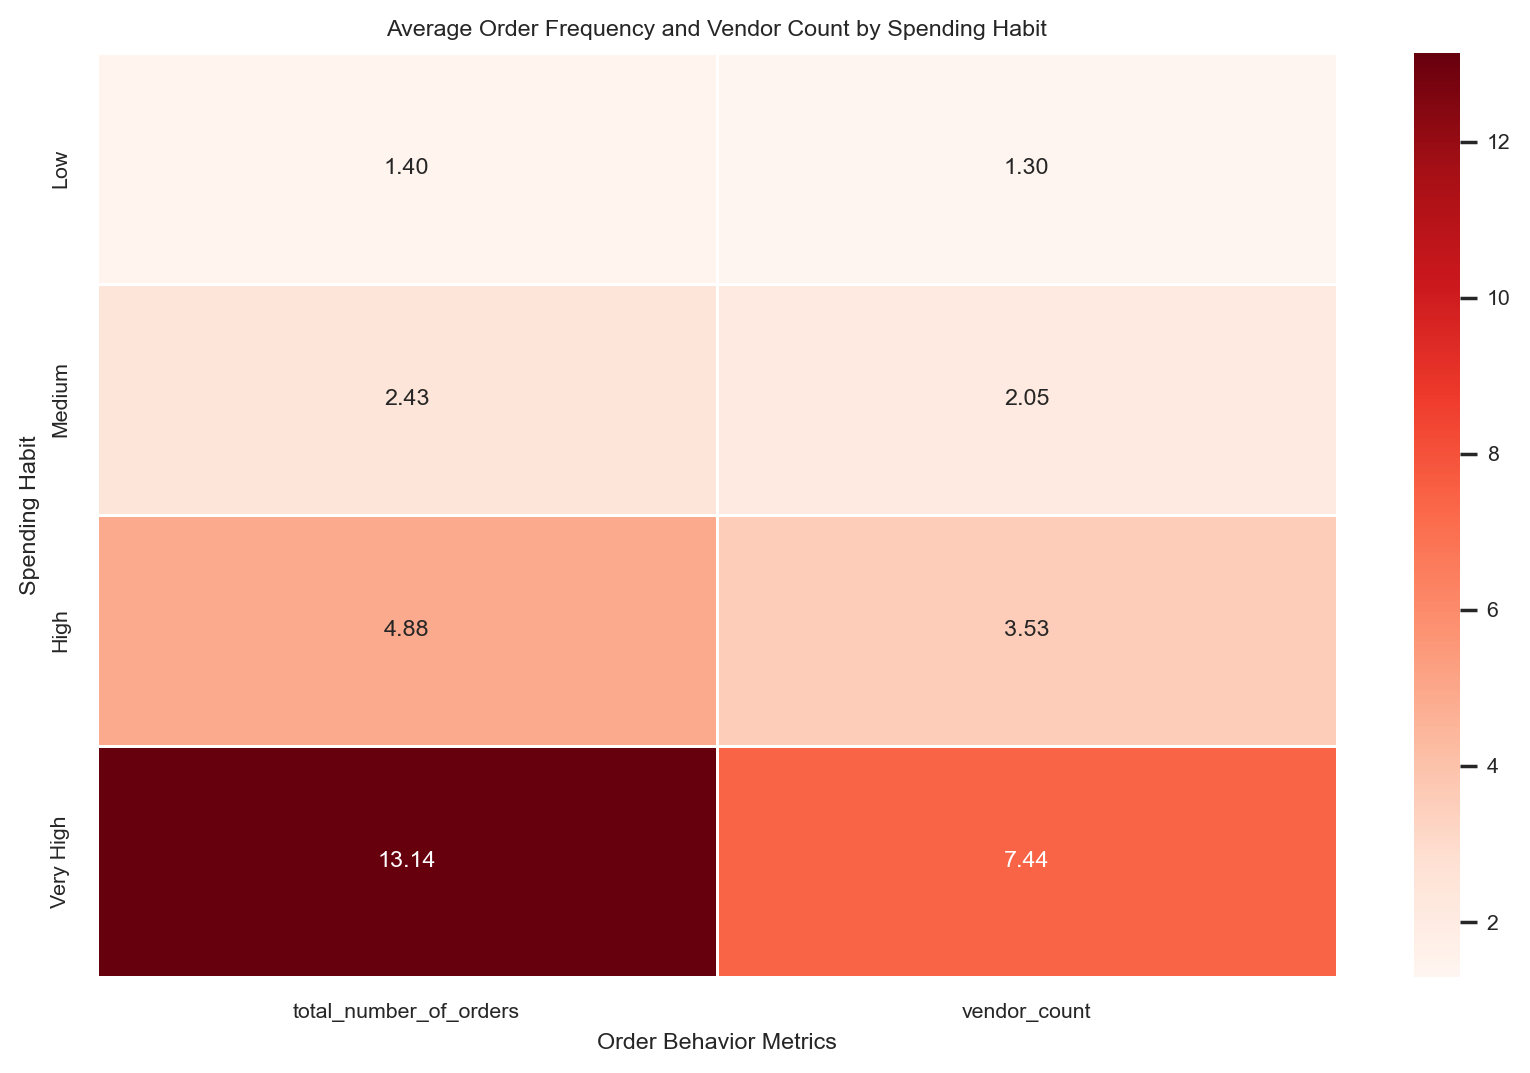

In [215]:
# observed=False to avoid warning and ensure all categories in the categorical are included
spending_behavior = customers.groupby('spending_habit', observed=False)[['total_number_of_orders', 'vendor_count']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(spending_behavior, annot=True, cmap="Reds", fmt=".2f", linewidths=.5)

plt.title("Average Order Frequency and Vendor Count by Spending Habit")
plt.xlabel("Order Behavior Metrics")
plt.ylabel("Spending Habit")

plt.show()

Based on the heatmap, we can conclude that **higher spending customers tend to place more frequent orders and order from a greater number of vendors**. Specifically, customers in the “Very High” spending category have significantly higher average order frequency (13.14 orders) and vendor diversity (7.44 vendors) compared to lower spending categories. This suggests that high spenders are also more engaged with the platform, both in terms of frequency and variety of vendors.

<a class="anchor" id="2nd-bullet">

##### f. Promotion Usage and Spending Patterns
    
</a>

**Objective**: Examine if certain promotions (e.g., discounts, free delivery) are associated with higher spending or higher product count.

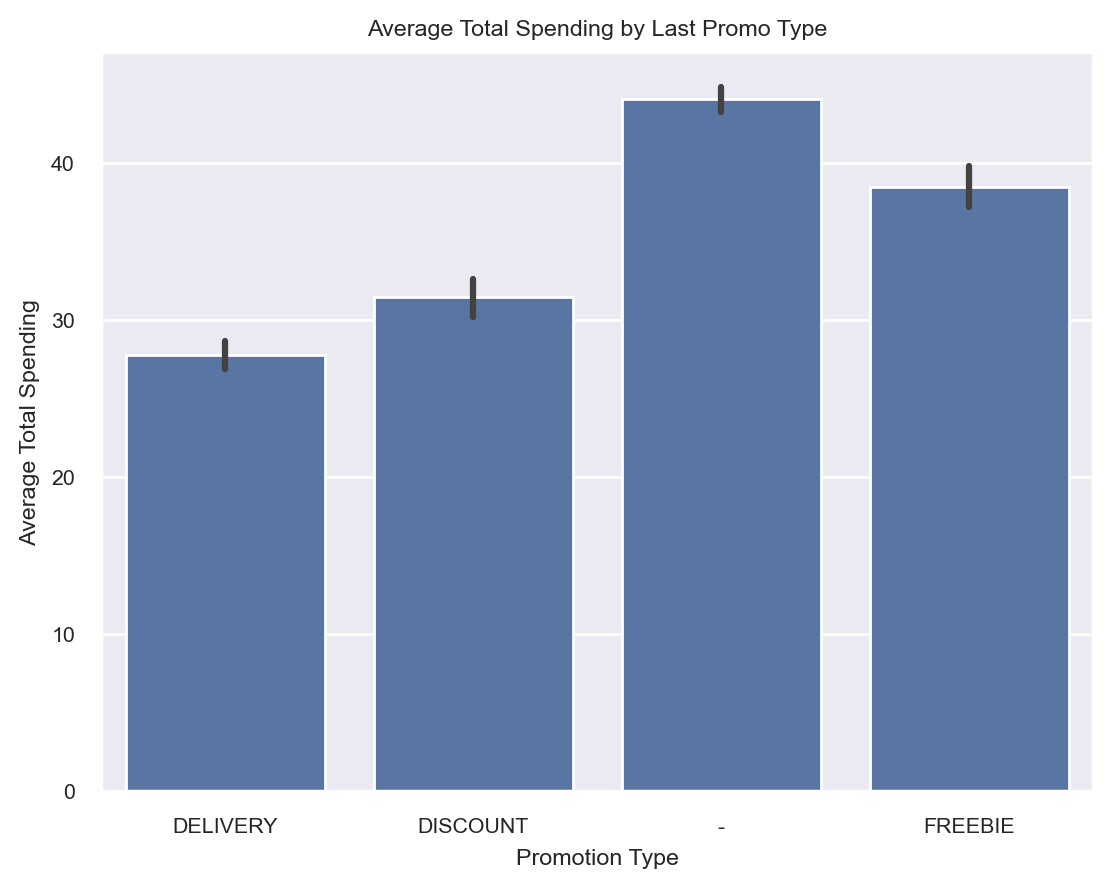

In [216]:
sns.barplot(x='last_promo', y='total_spent', data=customers, estimator='mean')
plt.title("Average Total Spending by Last Promo Type")
plt.xlabel("Promotion Type")
plt.ylabel("Average Total Spending")
plt.show()

Based on the barplot, customers who did not use a promotion (”-”) have the highest average total spending, followed closely by those who used “Freebie” promotions. <br>
This suggests that non-promotion users and freebie users may tend to be higher spenders, while “Delivery” and “Discount” promotions are associated with slightly lower spending on average.

<a class="anchor" id="2nd-bullet">

##### g. Payment Method Preferences by Spending and Promotion Usage
    
</a>

**Objective**: Examine if certain payment methods are preferred by high spenders or those who use specific promotions, which could guide partnership or payment-incentive strategies.

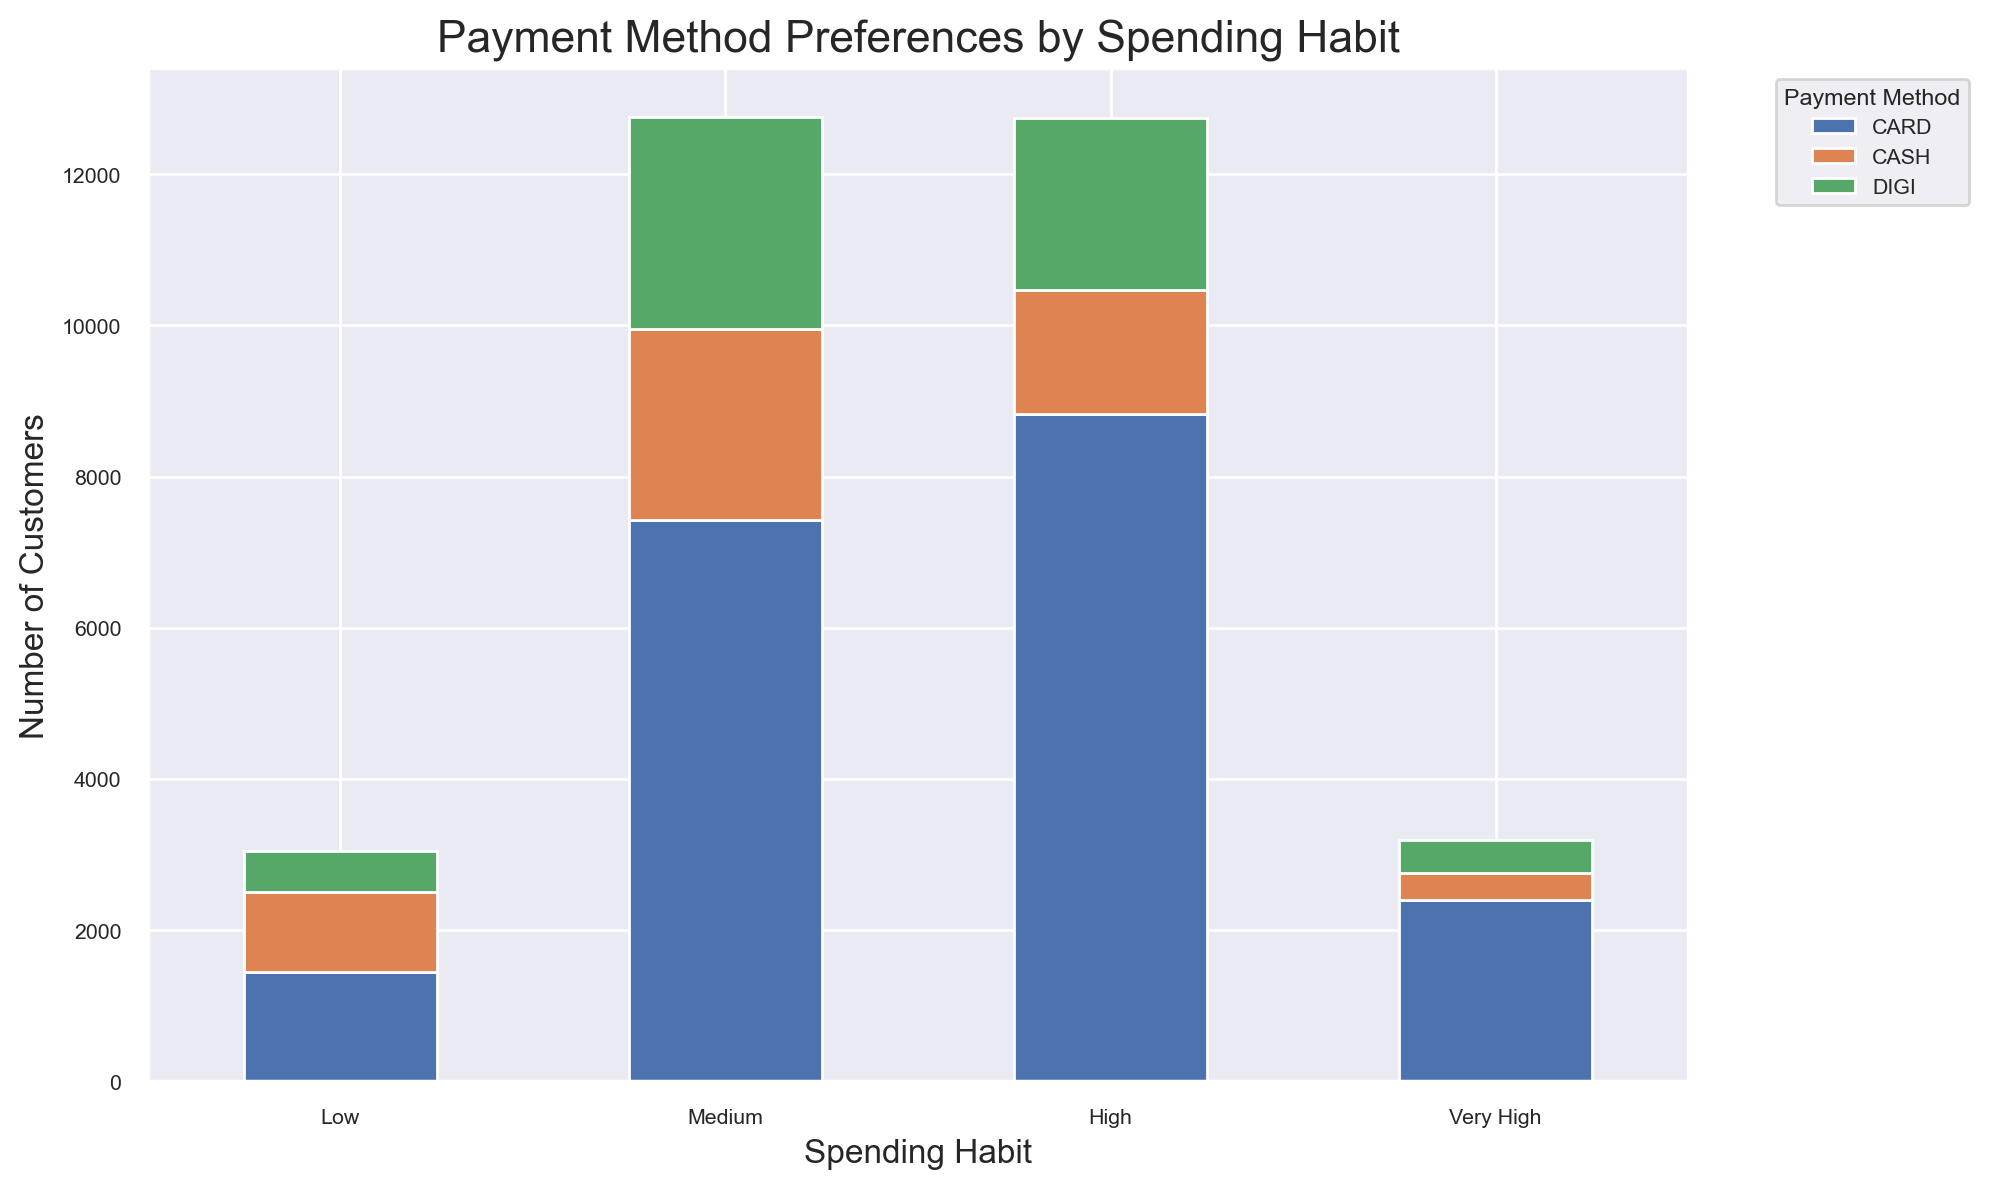

In [217]:
# Group by spending habit and payment method, then count the occurrences
spending_payment = customers.groupby(['spending_habit', 'payment_method'], observed=False).size().unstack(fill_value=0)

spending_payment.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Payment Method Preferences by Spending Habit", fontsize=16)
plt.xlabel("Spending Habit", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot for clarity
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

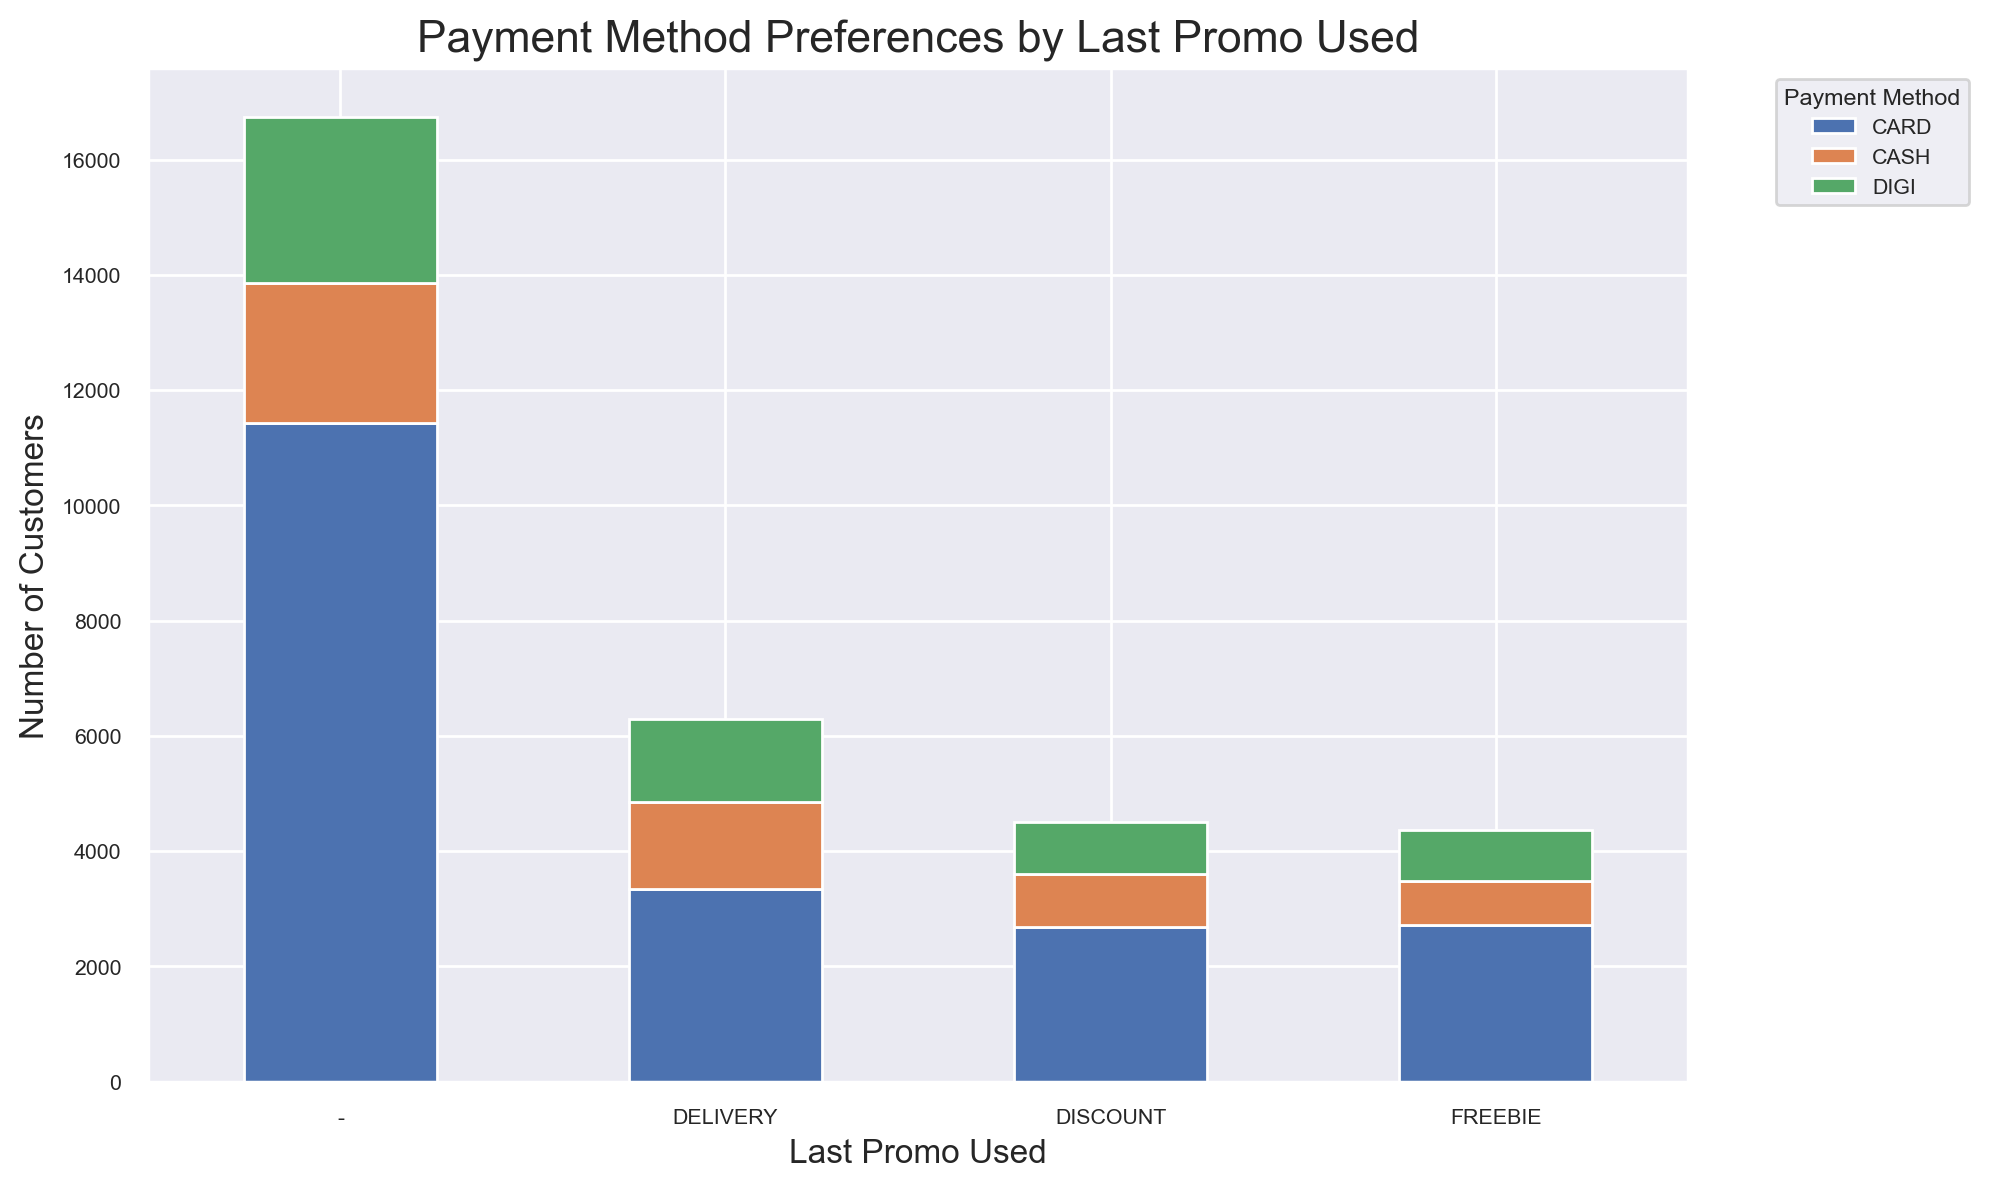

In [218]:
# Group by last promo used and payment method, then count the occurrences
promo_payment = customers.groupby(['last_promo', 'payment_method']).size().unstack(fill_value=0)

promo_payment.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Payment Method Preferences by Last Promo Used", fontsize=16)
plt.xlabel("Last Promo Used", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

High spenders predominantly use card payments but also utilize cash and digital options more frequently, suggesting diverse payment preferences at higher spending levels. Additionally, while card remains the top method across all promotions, specific promotions like “Delivery” and “Discount” show increased use of cash and digital payments, indicating opportunities for targeted payment incentives aligned with spending and promotional preferences.

<a class="anchor" id="2nd-bullet">

##### h. Chain Restaurant Preferences
    
</a>

**Objective**: Explore if chain vs. non-chain preference impacts spending

In [219]:
# Calculate average and median spending for each preference group
preference_spending = customers.groupby('chain_preference')['total_spent'].agg(['mean', 'median'])
print("Average and Median Spending by Chain vs. Non-Chain Preference:")
print(preference_spending)

Average and Median Spending by Chain vs. Non-Chain Preference:
                          mean  median
chain_preference                      
Balanced             33.357247  24.460
Chain Preferred      34.762222  21.060
Non-Chain Preferred  46.800841  29.685


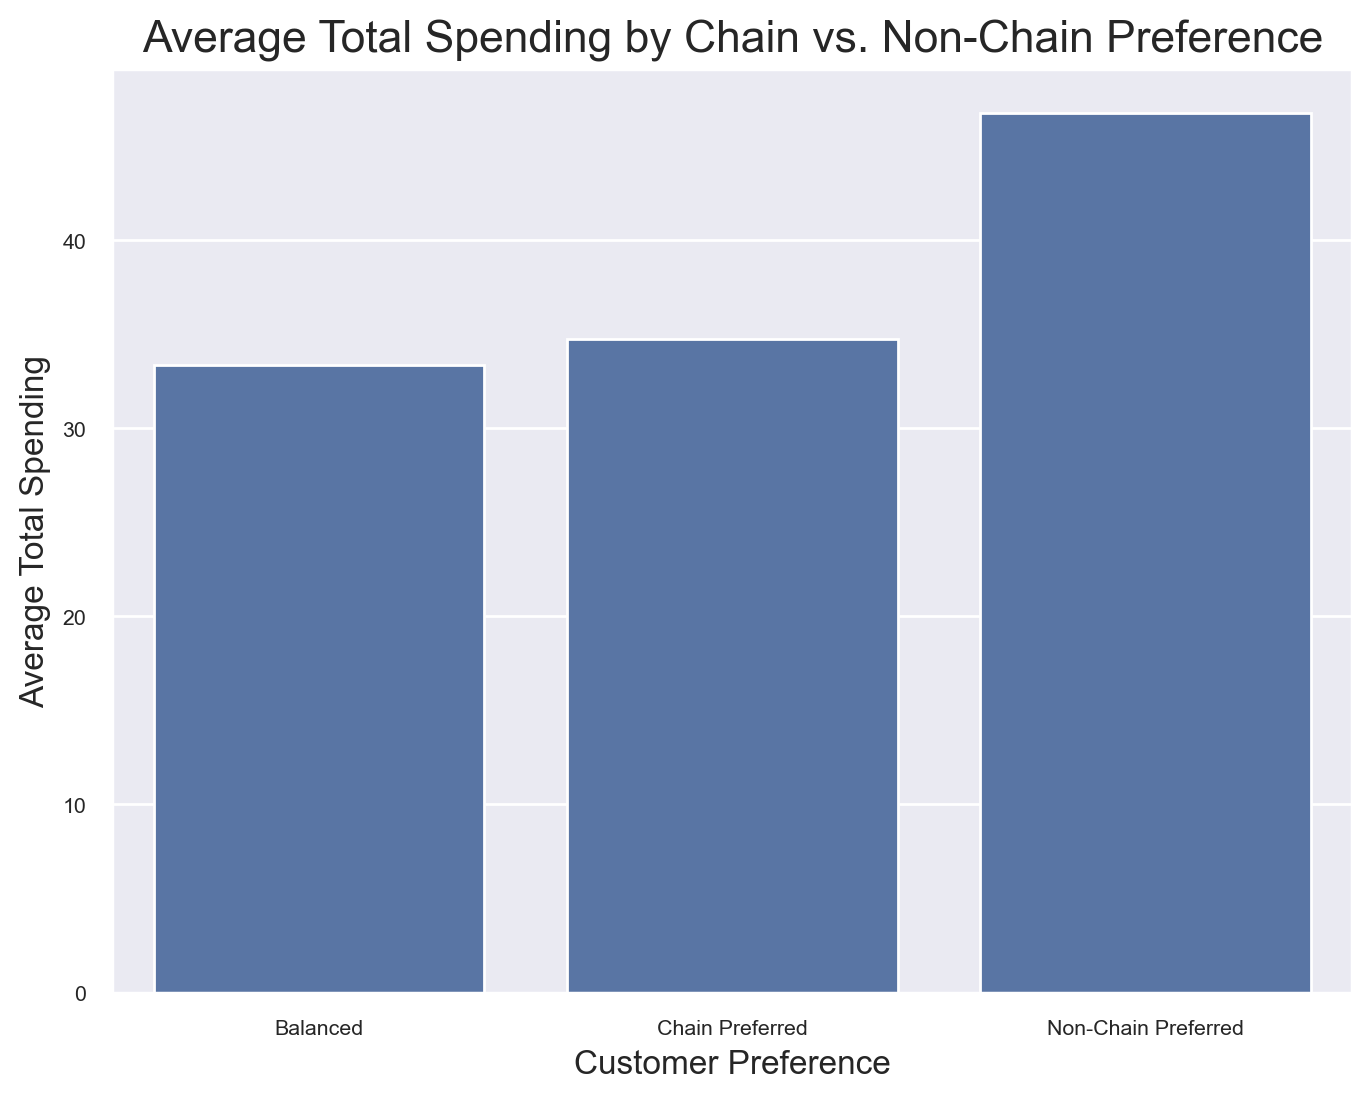

In [220]:
# Calculate average spending for each preference group
preference_spending_avg = customers.groupby('chain_preference')['total_spent'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='chain_preference', y='total_spent', data=preference_spending_avg)

# Add titles and labels
plt.title("Average Total Spending by Chain vs. Non-Chain Preference", fontsize=16)
plt.xlabel("Customer Preference", fontsize=12)
plt.ylabel("Average Total Spending", fontsize=12)

plt.show()

Customers who prefer non-chain restaurants have the highest average total spending, followed by those with chain-preferred, while balanced preferences customers show the lowest average spending. <br>
This suggests that **non-chain customers may be more willing to spend more per order or have a stronger preference for premium options.**

<a class="anchor" id="2nd-bullet">

##### i. Week period and time of day
    
</a>

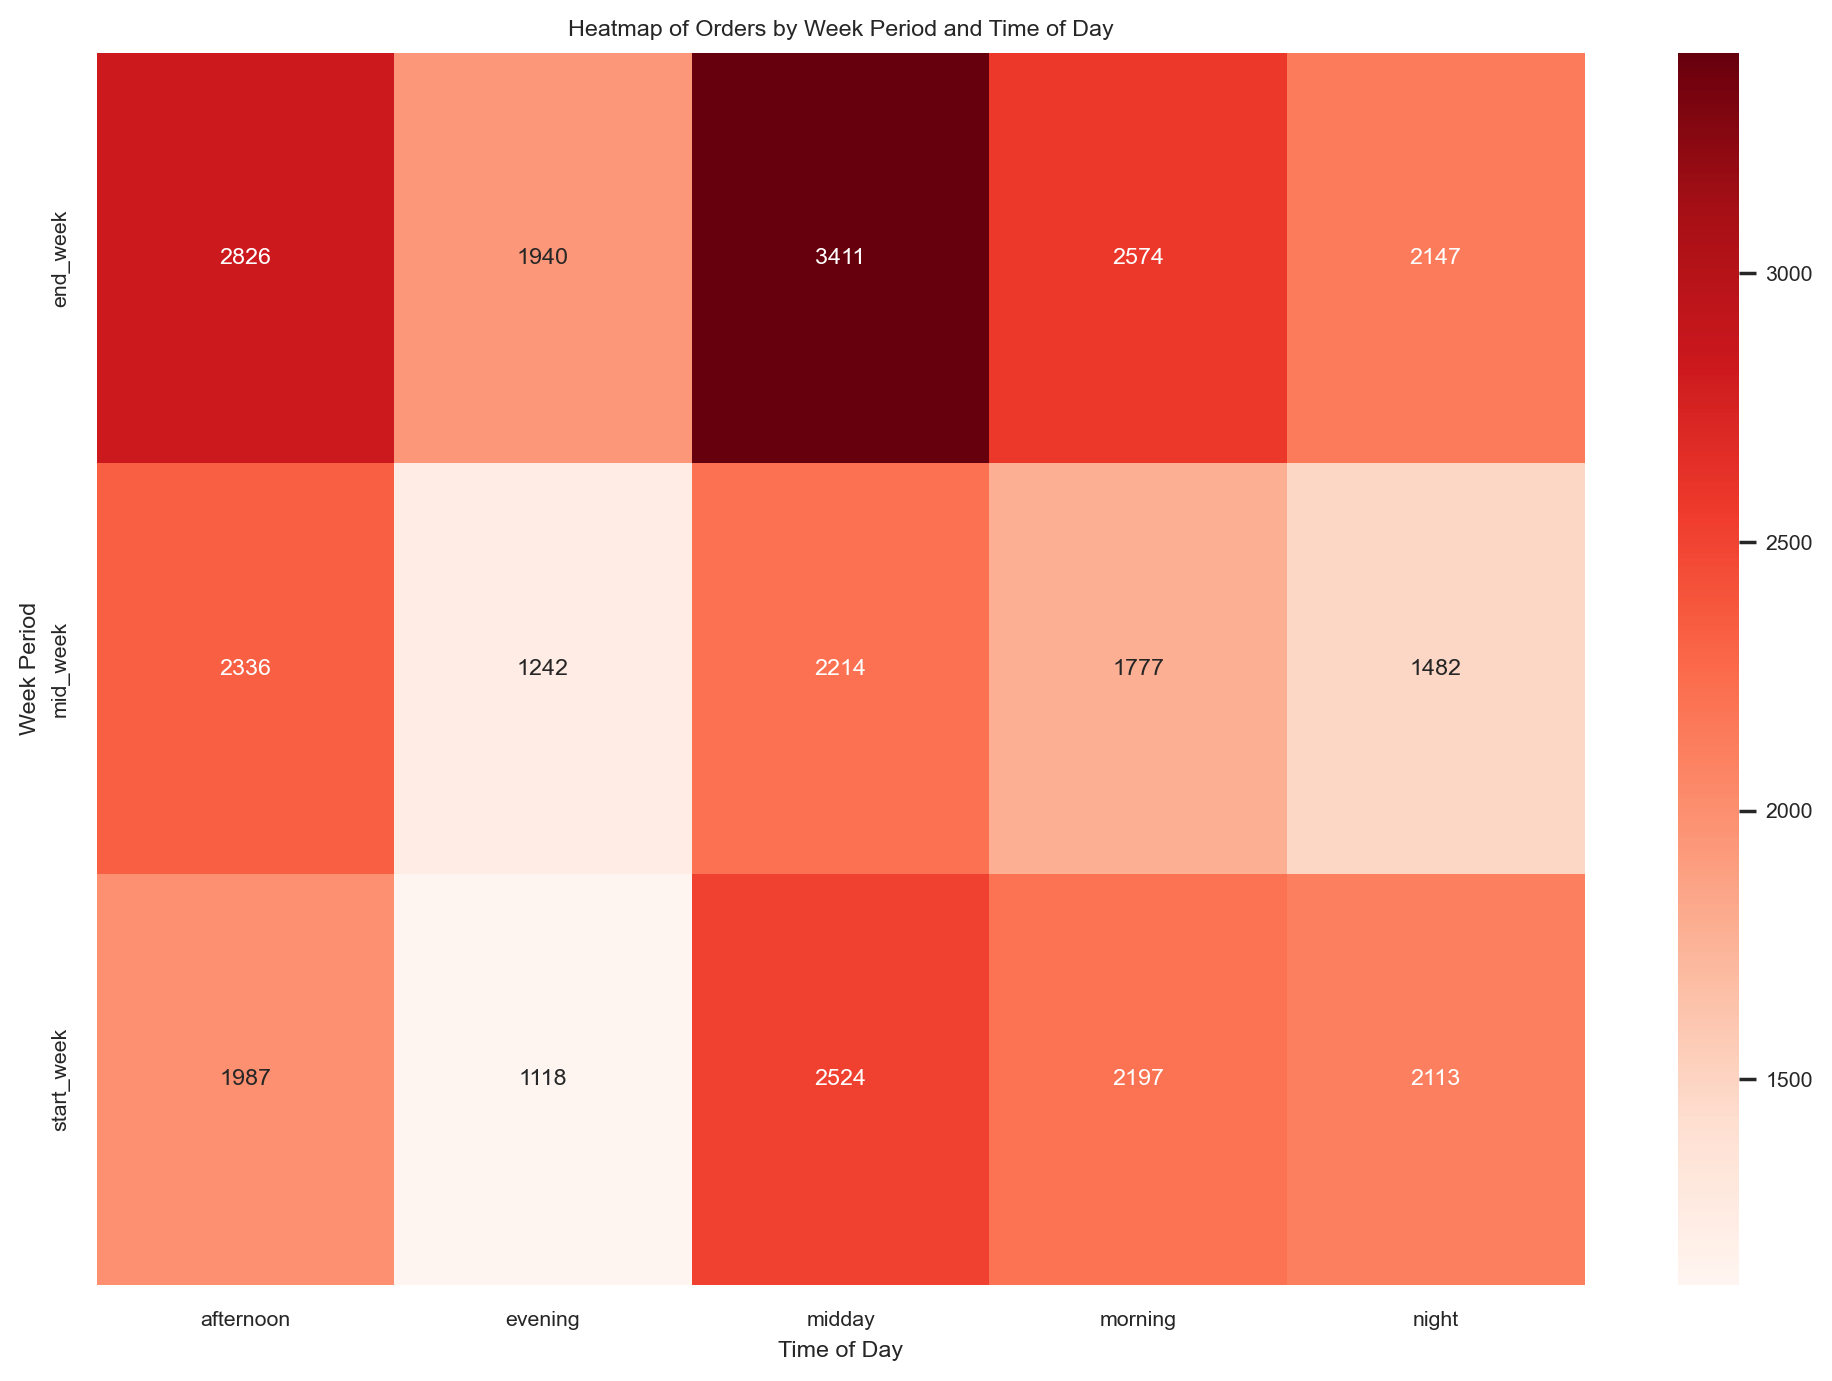

In [221]:
# Define the day and hour columns based on your new week period and time period categories

# Create a DataFrame for the heatmap based on max activity by day period and time period
week_day_periods = customers[week + day].copy()
week_day_periods['week_period'] = week_day_periods[week].idxmax(axis=1)
week_day_periods['day_time'] = week_day_periods[day].idxmax(axis=1)

# Calculate the count of occurrences for each day-hour combination
week_day_counts = pd.crosstab(week_day_periods['week_period'], week_day_periods['day_time'])

plt.figure(figsize=(12, 8))
sns.heatmap(week_day_counts, annot=True, fmt="d",cmap="Reds")
plt.title("Heatmap of Orders by Week Period and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Week Period")
plt.show()

<a class="anchor" id="2nd-bullet">

##### j. Spending habits in cities & in top cuisines
    
</a>

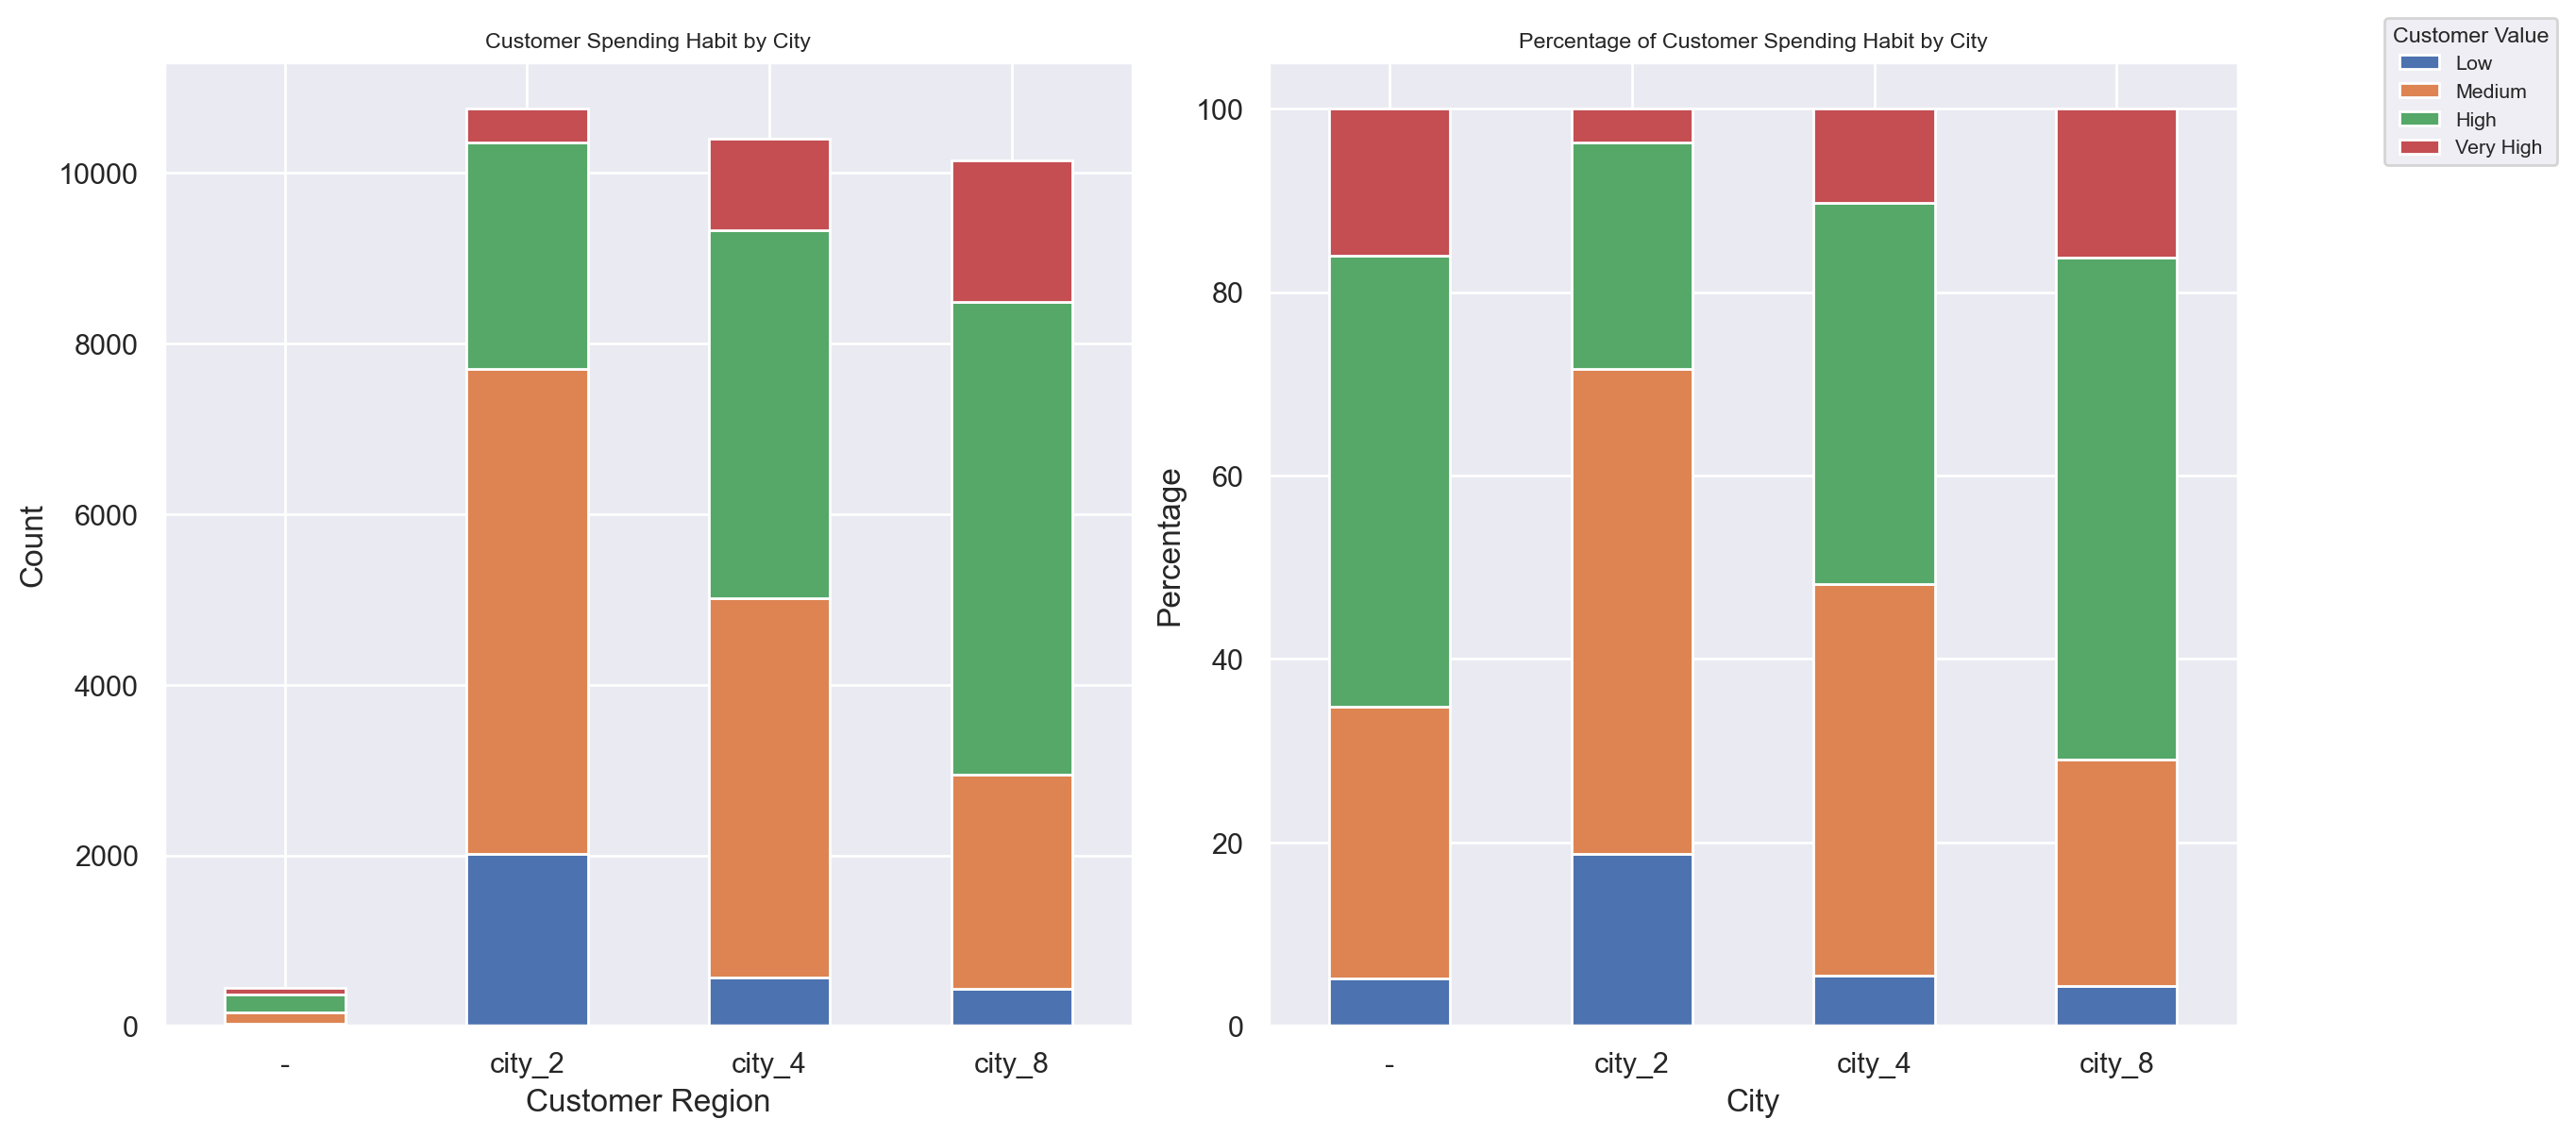

In [222]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.set(font_scale=0.7)

customer_value_by_region = customers.groupby(['city', 'spending_habit'], observed=False).size().unstack()
customer_value_by_region_proportions = customer_value_by_region.div(customer_value_by_region.sum(axis=1), axis=0) * 100

customer_value_by_region.plot(kind='bar', stacked=True, ax = ax1, legend=False)
ax1.set_title("Customer Spending Habit by City")
ax1.set_xlabel("Customer Region")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=0)

customer_value_by_region_proportions.plot(kind='bar', stacked=True, ax = ax2, legend=False)
ax2.set_title("Percentage of Customer Spending Habit by City")
ax2.set_xlabel("City")
ax2.set_ylabel("Percentage")
ax2.tick_params(axis='x', rotation=0)


handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, title="Customer Value", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

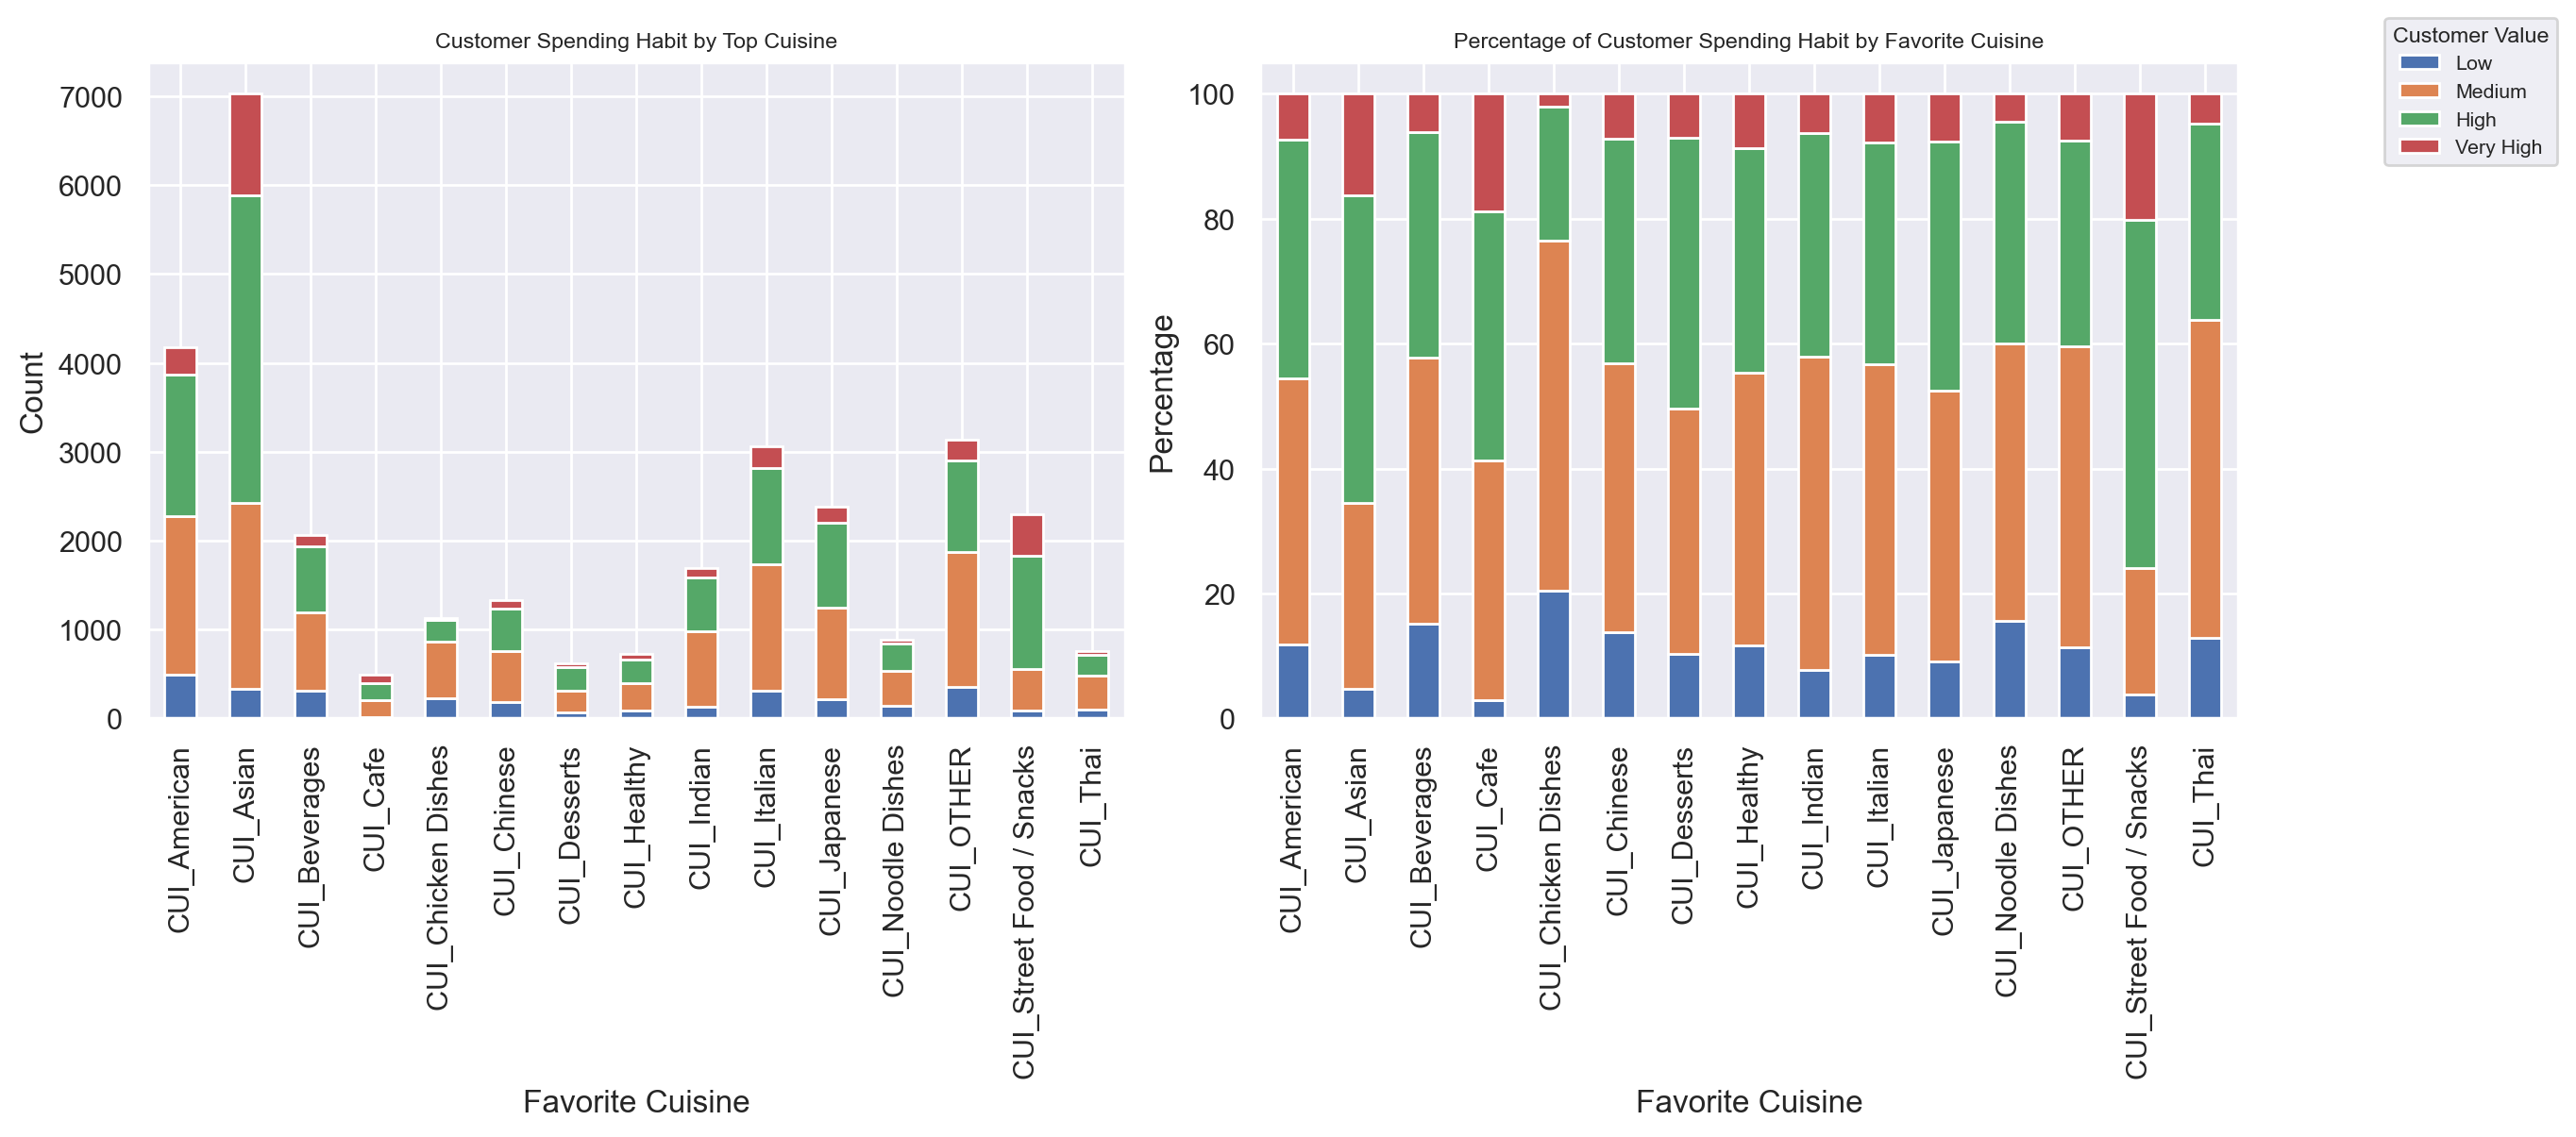

In [223]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.set(font_scale=0.7)

customer_value_by_favorite_cuisine = customers.groupby(['top_cuisine', 'spending_habit'], observed=False).size().unstack()
customer_value_by_favorite_cuisine_proportions = customer_value_by_favorite_cuisine.div(customer_value_by_favorite_cuisine.sum(axis=1), axis=0) * 100

customer_value_by_favorite_cuisine.plot(kind='bar', stacked=True, ax = ax1, legend=False)
ax1.set_title("Customer Spending Habit by Top Cuisine")
ax1.set_xlabel("Favorite Cuisine")
ax1.set_ylabel("Count")

customer_value_by_favorite_cuisine_proportions.plot(kind='bar', stacked=True, ax = ax2, legend=False)
ax2.set_title("Percentage of Customer Spending Habit by Favorite Cuisine")
ax2.set_xlabel("Favorite Cuisine")
ax2.set_ylabel("Percentage")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, title="Customer Value", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Data preprocessing

In [224]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_region           31888 non-null  object  
 1   customer_age              31161 non-null  float64 
 2   vendor_count              31888 non-null  int64   
 3   product_count             31888 non-null  int64   
 4   is_chain                  31888 non-null  int64   
 5   first_order               31782 non-null  float64 
 6   last_order                31888 non-null  int64   
 7   last_promo                31888 non-null  object  
 8   payment_method            31888 non-null  object  
 9   CUI_American              31888 non-null  float64 
 10  CUI_Asian                 31888 non-null  float64 
 11  CUI_Beverages             31888 non-null  float64 
 12  CUI_Cafe                  31888 non-null  float64 
 13  CUI_Chicken Dishes        31888 non-n

In [225]:
#Changing category type to object type?
#customers['age_group'] = customers['age_group'].astype('object')
#customers['vendor_diversity'] = customers['vendor_diversity'].astype('object')
#customers['spending_habit'] = customers['spending_habit'].astype('object')

### Handling missing values

In [226]:
# number of missing values for each column
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

customer_age         727
first_order          106
HR_0                1165
age_group            727
vendor_diversity     138
active_period        106
spending_habit       138
dtype: int64

#### customer_age

The customer_age distribution is skewed, so we will impute the missing values with the median.

In [227]:
customers['customer_age'].median()
print(f'The median to be imputed is {customers["customer_age"].median()}.')

The median to be imputed is 26.0.


In [228]:
customers['customer_age'] = customers['customer_age'].fillna(customers['customer_age'].median())

#### First_order

In [229]:
customers[customers["first_order"].isna()]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
0366fbb035             8670          24.0             1              1   
039d7c8a20             4660          23.0             1              1   
04c9d25c93             8670          27.0             1              1   
09118ae9e7             8670          36.0             1              1   
0d1f298bbd             4660          22.0             1              1   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670          26.0             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
0366fbb035          0          NaN           0          -           DIGI   
039d7c8a20          0          NaN           0   DELIVERY           DIGI   
04c9d25c93          1          NaN           0   DISCOUNT           CASH   
09118ae9e7          0          NaN           0          -           CARD   
0d1f298bbd          1          NaN           0   DISCOUNT           CASH   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0          -           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
0366fbb035           0.00      11.87           0.00       0.0   
039d7c8a20           0.00       0.00           0.00       0.0   
04c9d25c93          18.16       0.00           0.00       0.0   
09118ae9e7           0.00       6.02           0.00       0.0   
0d1f298bbd           5.22       0.00           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
0366fbb035                  0.0          0.0          0.00          0.0   
039d7c8a20                  0.0          0.0          0.00          0.0   
04c9d25c93                  0.0          0.0          0.00          0.0   
09118ae9e7                  0.0          0.0          0.00          0.0   
0d1f298bbd                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
0366fbb035         0.00         0.00           0.0                0.0   
039d7c8a20        1

Since for the columns with first_order missing, the last_order is 0, we will imput 0 to first_order, meaning that tis orders will have been placed on the first day of the period and which also was their last order.

In [230]:
customers['first_order'] = customers['first_order'].fillna(0)

In [231]:
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

HR_0                1165
age_group            727
vendor_diversity     138
active_period        106
spending_habit       138
dtype: int64

#### HR_0

We will drop this column because it has 100% missing values.

In [232]:
customers['sum of orders by week']=customers[days_columns].sum(axis=1)
customers['sum of orders by hour']=customers[hour_columns].sum(axis=1)
diference = customers['sum of orders by week'] - customers['sum of orders by hour']
rows_with_difference = customers[diference != 0]
print(rows_with_difference)

            customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
ae38da6386             8670          21.0             2              3   
a21a839c77             4140          19.0             1              4   
9237d23413             8670          22.0             3              4   
8c6ffd7357             4660          25.0             3              4   
67c6c9f9c4             4660          24.0             1              3   
...                     ...           ...           ...            ...   
37b72b449d             2360          23.0             1              4   
ac382ddfd1                -          28.0             1              2   
96f1fc25e3             8670          25.0             2              2   
d7c7face7e             2440          26.0             1              1   
6624e03cdd             8670          28.0             1              2   

             is_chain  first_order  l

In [233]:
# input the difference in HR_0
customers['HR_0'] = customers['HR_0'].fillna(diference)

In [234]:
hr_column_sums = customers[hour_columns].sum()
days_column_sums = customers[days_columns].sum()
check = hr_column_sums.sum() - days_column_sums.sum()
print(check)

0.0


In [235]:
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

age_group           727
vendor_diversity    138
active_period       106
spending_habit      138
dtype: int64

####  age_group

Age group is a variable created by us using customer_age variable, which at the time it was created still had missing values. <br>

Now that customer_age missing values have been delt with, we will update the age_group variable.

In [236]:
customers["age_group"] = customers["age_group"].fillna(
    pd.cut(customers.loc[customers["age_group"].isna(), "customer_age"], bins=age_bins, labels=age_labels))

In [237]:
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

vendor_diversity    138
active_period       106
spending_habit      138
dtype: int64

#### active_period

active_period was created using the first_order column, which at the time had missing values.

We have treated those missing values, so we will drop the column and create it again.

In [238]:
# drop the column created before
customers = customers.drop(columns=['active_period'], errors='ignore')

# create the column again
customers["active_period"] = customers["last_order"] - customers["first_order"]

In [239]:
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

vendor_diversity    138
spending_habit      138
dtype: int64

#### vendor_diversity

In [240]:
customers[(customers['vendor_count']==0) & (customers['vendor_diversity'].isna())]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
c94b288475             8670          26.0             0              0   
f687717dc1             8670          21.0             0              0   
c6cf0b76fb             8670          38.0             0              0   
1b7c34738e             8670          24.0             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
0e60632fe2             8670          23.0             0              0   
28ed1f1e3f             8670          20.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
c94b288475          0          1.0           1   DELIVERY           CASH   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
c6cf0b76fb          0          2.0           2   DELIVERY           CASH   
1b7c34738e          0          3.0           3          -           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1         86.0          86          -           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
0e60632fe2          0         89.0          89   DISCOUNT           CARD   
28ed1f1e3f          0         89.0          89   DELIVERY           DIGI   
4c06e104de          1         89.0          89          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
4903041977            0.0        0.0            0.0       0.0   
c94b288475            0.0        0.0            0.0       0.0   
f687717dc1            0.0        0.0            0.0       0.0   
c6cf0b76fb            0.0        0.0            0.0       0.0   
1b7c34738e            0.0        0.0            0.0       0.0   
...                   ...        ...            ...       ...   
177ede2420            0.0        0.0            0.0       0.0   
0039059c9c            0.0        0.0            0.0       0.0   
0e60632fe2            0.0        0.0            0.0       0.0   
28ed1f1e3f            0.0        0.0            0.0       0.0   
4c06e104de            0.0        0.0            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
4903041977                  0.0          0.0           0.0          0.0   
c94b288475                  0.0          0.0           0.0          0.0   
f687717dc1                  0.0          0.0           0.0          0.0   
c6cf0b76fb                  0.0          0.0           0.0          0.0   
1b7c34738e                  0.0          0.0           0.0          0.0   
...                         ...          ...           ...          ...   
177ede2420                  0.0          0.0           0.0          0.0   
0039059c9c                  0.0          0.0           0.0          0.0   
0e60632fe2                  0.0          0.0           0.0          0.0   
28ed1f1e3f                  0.0          0.0           0.0          0.0   
4c06e104de                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
4903041977          0.0          0.0           0.0                0.0   
c94b288475         

In [241]:
customers['vendor_diversity'].value_counts()

vendor_diversity
Low Diversity         17615
Moderate Diversity    10035
High Diversity         4100
Name: count, dtype: int64

In [242]:
# Add the new category to the list of categories
customers['vendor_diversity'] = customers['vendor_diversity'].cat.add_categories('No Diversity')
customers['vendor_diversity'] = customers['vendor_diversity'].fillna('No Diversity')

In [243]:
customers['vendor_diversity'].value_counts()

vendor_diversity
Low Diversity         17615
Moderate Diversity    10035
High Diversity         4100
No Diversity            138
Name: count, dtype: int64

In [244]:
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

spending_habit    138
dtype: int64

#### spending_habit

In [245]:
customers[(customers['total_spent']==0) & (customers['spending_habit'].isna())]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
c94b288475             8670          26.0             0              0   
f687717dc1             8670          21.0             0              0   
c6cf0b76fb             8670          38.0             0              0   
1b7c34738e             8670          24.0             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
0e60632fe2             8670          23.0             0              0   
28ed1f1e3f             8670          20.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
c94b288475          0          1.0           1   DELIVERY           CASH   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
c6cf0b76fb          0          2.0           2   DELIVERY           CASH   
1b7c34738e          0          3.0           3          -           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1         86.0          86          -           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
0e60632fe2          0         89.0          89   DISCOUNT           CARD   
28ed1f1e3f          0         89.0          89   DELIVERY           DIGI   
4c06e104de          1         89.0          89          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
4903041977            0.0        0.0            0.0       0.0   
c94b288475            0.0        0.0            0.0       0.0   
f687717dc1            0.0        0.0            0.0       0.0   
c6cf0b76fb            0.0        0.0            0.0       0.0   
1b7c34738e            0.0        0.0            0.0       0.0   
...                   ...        ...            ...       ...   
177ede2420            0.0        0.0            0.0       0.0   
0039059c9c            0.0        0.0            0.0       0.0   
0e60632fe2            0.0        0.0            0.0       0.0   
28ed1f1e3f            0.0        0.0            0.0       0.0   
4c06e104de            0.0        0.0            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
4903041977                  0.0          0.0           0.0          0.0   
c94b288475                  0.0          0.0           0.0          0.0   
f687717dc1                  0.0          0.0           0.0          0.0   
c6cf0b76fb                  0.0          0.0           0.0          0.0   
1b7c34738e                  0.0          0.0           0.0          0.0   
...                         ...          ...           ...          ...   
177ede2420                  0.0          0.0           0.0          0.0   
0039059c9c                  0.0          0.0           0.0          0.0   
0e60632fe2                  0.0          0.0           0.0          0.0   
28ed1f1e3f                  0.0          0.0           0.0          0.0   
4c06e104de                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
4903041977          0.0          0.0           0.0                0.0   
c94b288475         

In [246]:
customers['spending_habit'].value_counts()

spending_habit
Medium       12764
High         12746
Very High     3189
Low           3051
Name: count, dtype: int64

In [247]:
# Add the new category to the list of categories
customers['spending_habit'] = customers['spending_habit'].cat.add_categories('Null')
customers['spending_habit'] = customers['spending_habit'].fillna('Null')

In [248]:
customers['vendor_diversity'].value_counts()

vendor_diversity
Low Diversity         17615
Moderate Diversity    10035
High Diversity         4100
No Diversity            138
Name: count, dtype: int64

In [249]:
missing_values = customers.isnull().sum()
missing_values[missing_values>0]

Series([], dtype: int64)

### Outliers

In [250]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_region           31888 non-null  object  
 1   customer_age              31888 non-null  float64 
 2   vendor_count              31888 non-null  int64   
 3   product_count             31888 non-null  int64   
 4   is_chain                  31888 non-null  int64   
 5   first_order               31888 non-null  float64 
 6   last_order                31888 non-null  int64   
 7   last_promo                31888 non-null  object  
 8   payment_method            31888 non-null  object  
 9   CUI_American              31888 non-null  float64 
 10  CUI_Asian                 31888 non-null  float64 
 11  CUI_Beverages             31888 non-null  float64 
 12  CUI_Cafe                  31888 non-null  float64 
 13  CUI_Chicken Dishes        31888 non-n

In [251]:
# select the float columns
float_col = customers.select_dtypes(include='float64').columns

In [252]:
customers[float_col] = customers[float_col].astype('int64')

In [253]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_region           31888 non-null  object  
 1   customer_age              31888 non-null  int64   
 2   vendor_count              31888 non-null  int64   
 3   product_count             31888 non-null  int64   
 4   is_chain                  31888 non-null  int64   
 5   first_order               31888 non-null  int64   
 6   last_order                31888 non-null  int64   
 7   last_promo                31888 non-null  object  
 8   payment_method            31888 non-null  object  
 9   CUI_American              31888 non-null  int64   
 10  CUI_Asian                 31888 non-null  int64   
 11  CUI_Beverages             31888 non-null  int64   
 12  CUI_Cafe                  31888 non-null  int64   
 13  CUI_Chicken Dishes        31888 non-n

In [254]:
num_col = customers.select_dtypes(include='int64').columns
num_col

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_spent',
       'total_number_of_orders', 'start_week', 'mid_week', 'end_week', 'night',
       'morning', 'midday', 'afternoon', 'evening', 'non_chain_orders',
       'sum of orders by week', 'sum of orders by hour', 'active_period'],
      dtype='object')

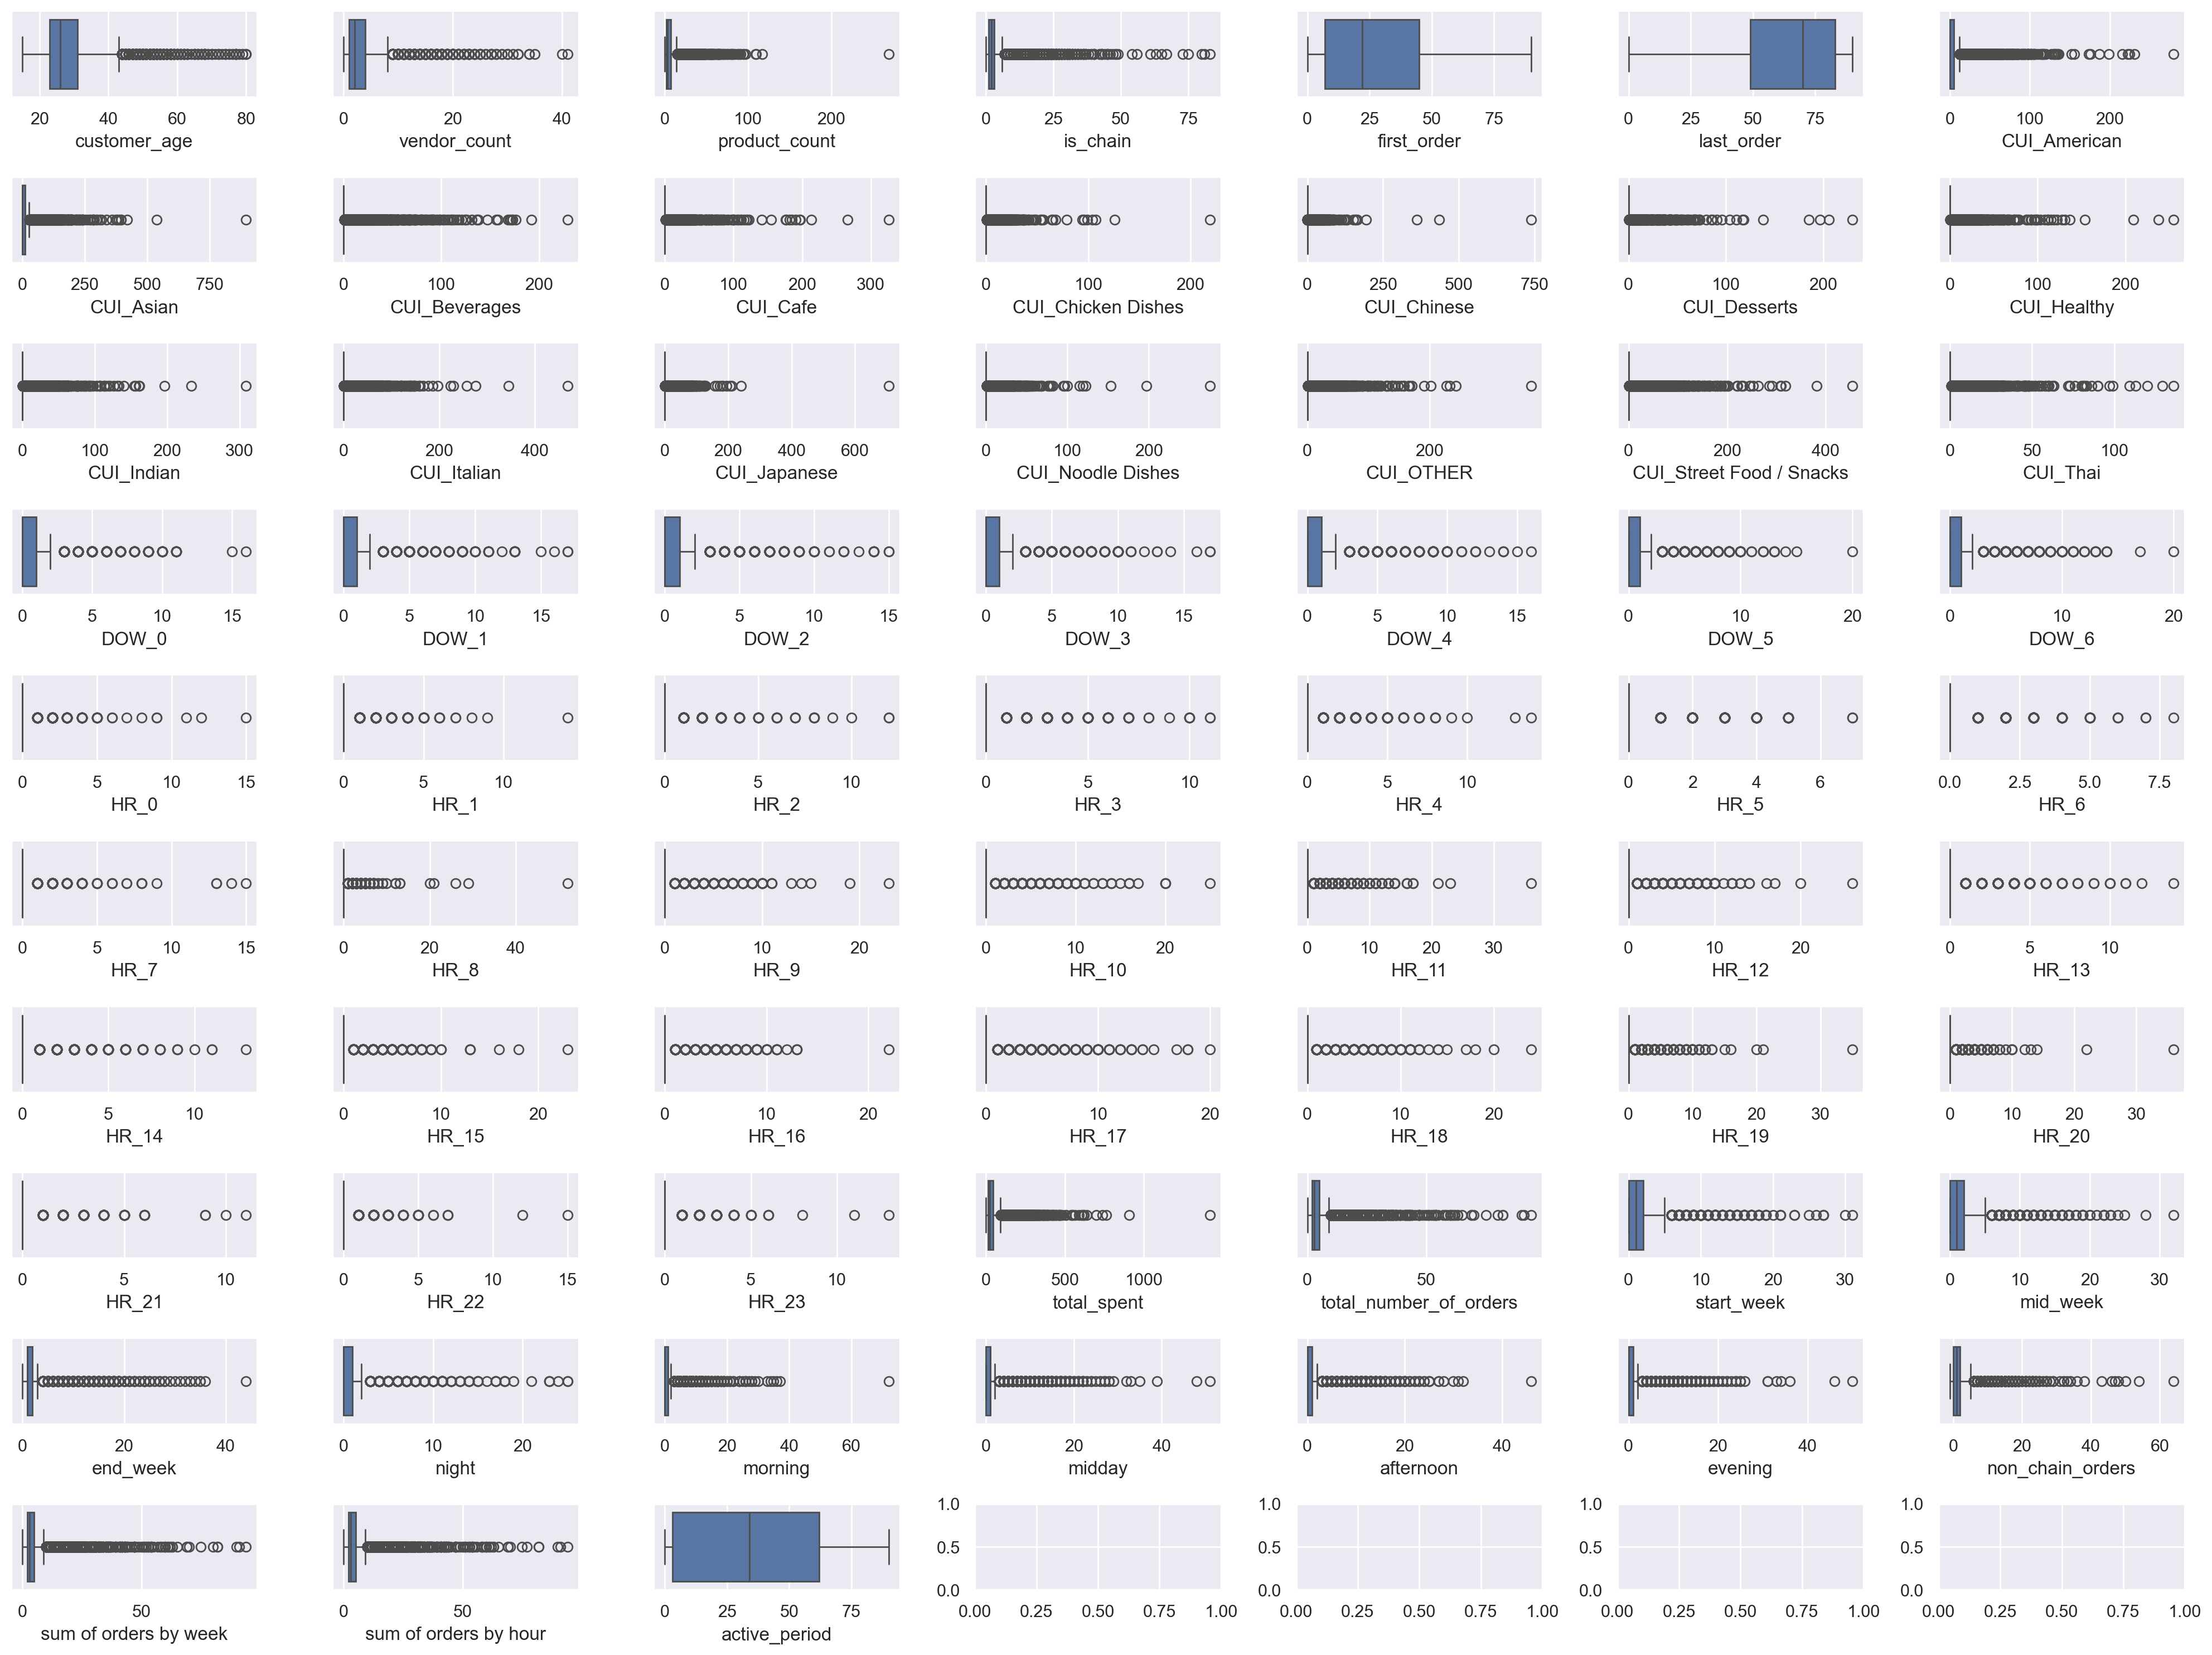

In [255]:
# Plot box plots for all numeric columns

# The code below keeps the 1st time a duplicate appears 
# This is necessary to plot box plots 
# customers_no_duplicates = customers[~customers.index.duplicated(keep="first")]

sns.set()
fig, axes = plt.subplots(10, 7, figsize=(20, 15))

for ax, feat in zip(axes.flatten(), num_col): 
    sns.boxplot(x=customers[feat], ax=ax)

plt.tight_layout()
plt.show()

## Clustering 

### Hierarchical Clustering

In [256]:
from sklearn.cluster import DBSCAN
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering , KMeans
from scipy.cluster.hierarchy import dendrogram

In [257]:
num_col

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_spent',
       'total_number_of_orders', 'start_week', 'mid_week', 'end_week', 'night',
       'morning', 'midday', 'afternoon', 'evening', 'non_chain_orders',
       'sum of orders by week', 'sum of orders by hour', 'active_period'],
      dtype='object')

In [279]:
feat

'active_period'

In [283]:
customers['vendor_diversity'].value_counts()

vendor_diversity
Low Diversity         17615
Moderate Diversity    10035
High Diversity         4100
No Diversity            138
Name: count, dtype: int64

In [284]:
metric_feature = ['product_count', 'is_chain', 'first_order', 'last_order', 'total_spent', 'active_period', 'vendor_count', 'sum of orders by week', 'sum of orders by hour','start_week', 'mid_week', 'end_week', 'night',
       'morning', 'midday', 'afternoon', 'evening']

In [285]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(customers[metric_feature]) 
hc_labels

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [286]:
def get_ss(customers, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = customers[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    
    return ss 


def get_ssw(customers, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_k = customers[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), 
                                                       include_groups=False)

    return df_k.sum()

In [287]:
# 
def get_rsq(customers, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(customers, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(customers, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)

In [288]:
def get_r2_hc(customers, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    feats = customers.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(customers) 
        
        # concat df with labels
        df_concat = pd.concat([customers, pd.Series(hclabels, name='labels', index=customers.index)], axis=1)  
        
        
        # append the R2 of the given cluster solution
        r2.append(get_rsq(df_concat, feats, 'labels'))
        
    return np.array(r2)

In [289]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(customers[metric_feature], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

In [290]:
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

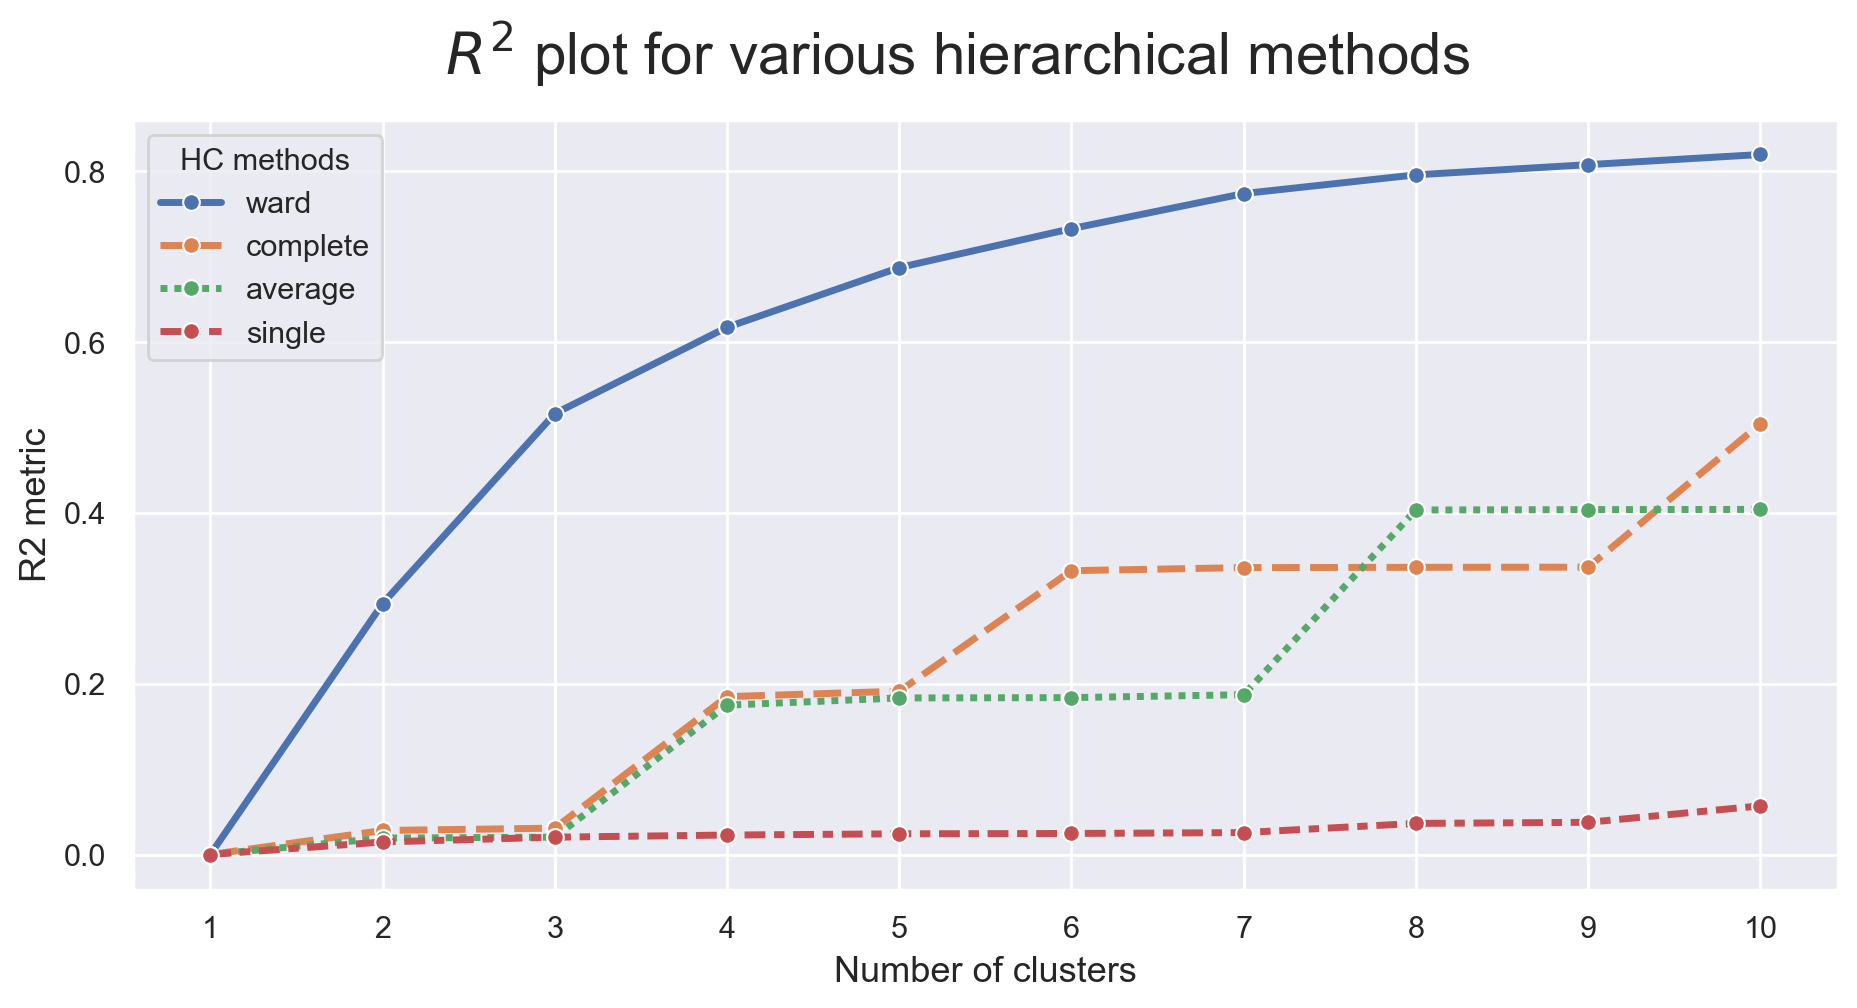

In [291]:
sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

I just imported the code from lab 9 and ajusted into the notebook

Maybe we should specify the features that we want to keep. Don't know if we can do feature selection like in ML.

In [292]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(customers[metric_feature])


array([26791, 18961, 20978, ...,     5,     2,     0], dtype=int64)

In [293]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

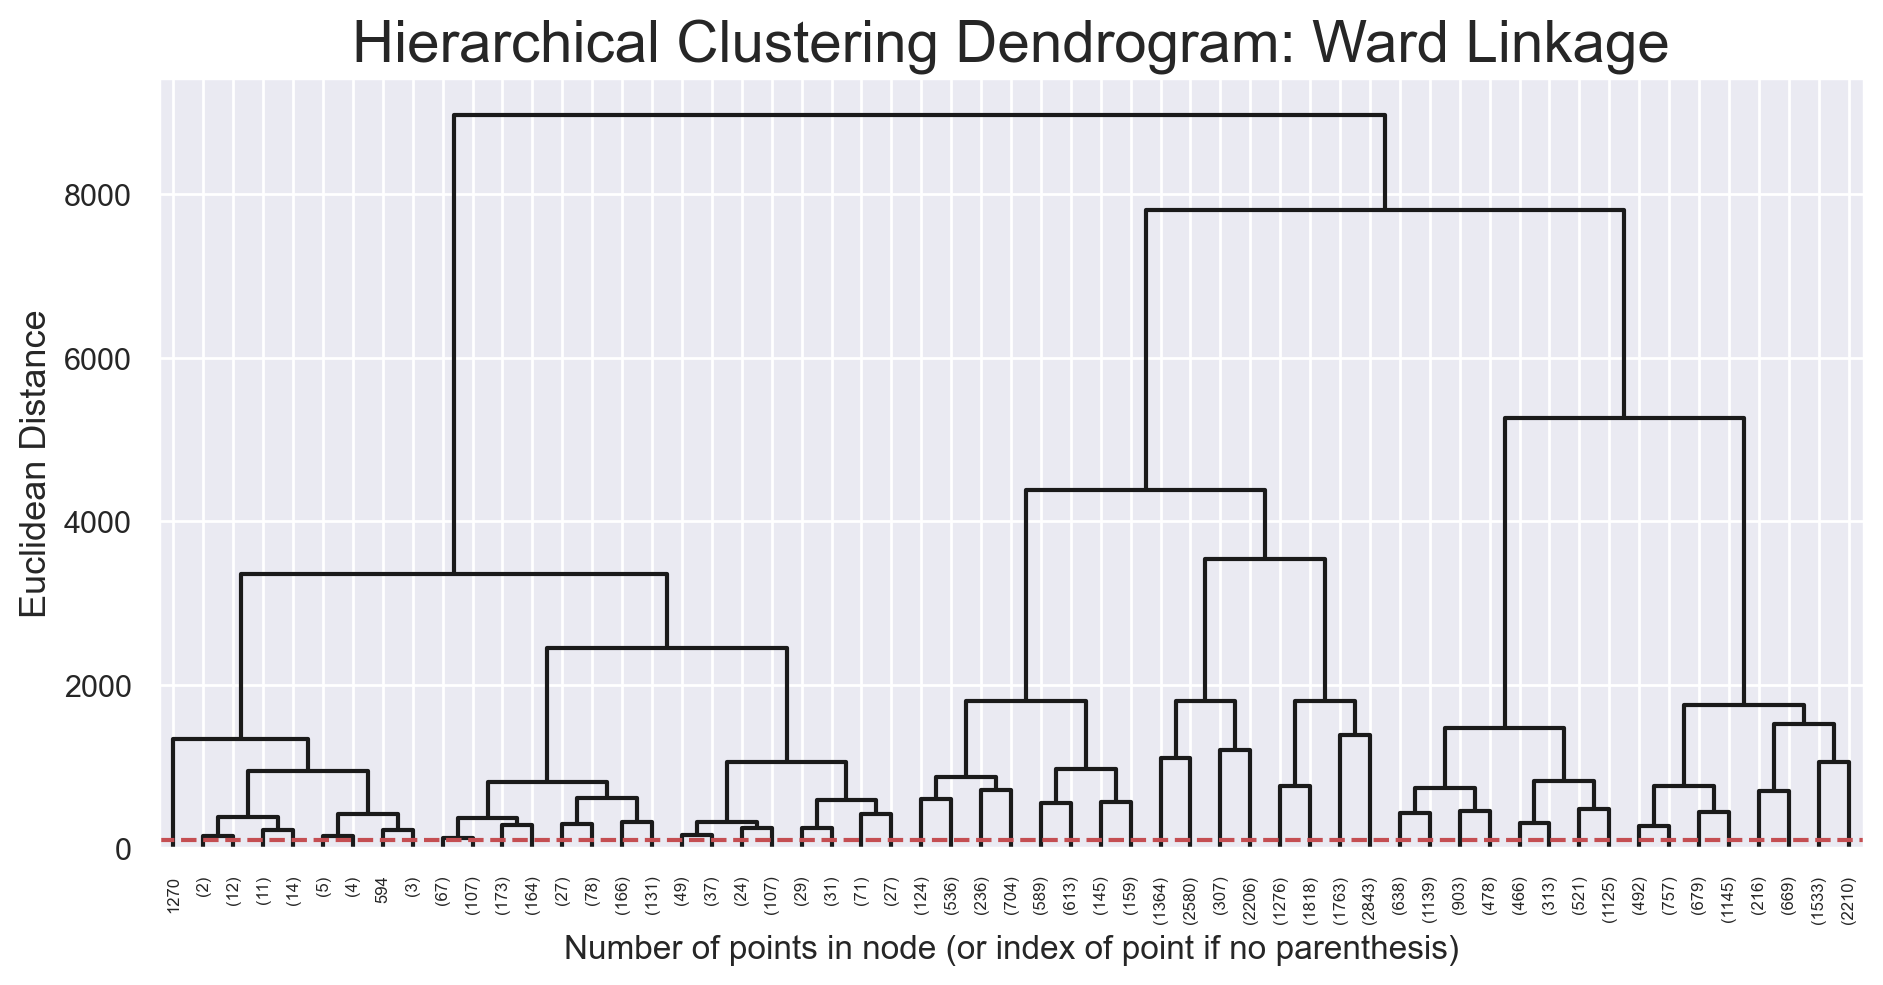

In [294]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [295]:
hclabels = hclust.fit_predict(customers[metric_feature])

In [296]:
# Characterizing the 4 clusters
df_concat = pd.concat([customers[metric_feature], 
                       pd.Series(hc_labels, 
                                 name='labels', 
                                 index=customers.index)], 
                    axis=1)

df_concat.groupby('labels').mean()

product_count  is_chain  first_order  last_order  total_spent  \
labels                                                                  
0            5.602458  3.249770    17.106661   70.373949    29.825104   
1           23.917972  8.523490     9.708427   82.898583   198.554064   
2            2.479029  1.160369    63.592131   71.545903    20.191404   
3            1.965789  1.045316    19.318109   23.851514    15.012538   
4           12.651320  5.691887    16.849002   76.914359    89.461687   

        active_period  vendor_count  sum of orders by week  \
labels                                                       
0           53.267288      3.427633               4.604224   
1           73.190157      8.715884              16.226696   
2            7.953772      1.677964               1.938969   
3            4.533405      1.435608               1.574781   
4           60.065357      5.726336               9.223117   

        sum of orders by hour  start_week  mid_week  end_week     night  \
labels                                                                    
0                    4.560429    1.191990  1.371124  2.041110  0.426150   
1                   15.966443    4.609247  4.821775  6.795675  2.472036   
2                    1.917154    0.486560  0.609921  0.842488  0.289053   
3                    1.552391    0.386351  0.435966  0.752463  0.207057   
4                    9.129427    2.569865  2.690599  3.962653  1.167096   

         morning    midday  afternoon   evening  
labels                                           
0       0.716395  1.285089   1.100304  1.032493  
1       4.414616  3.826249   3.579418  1.674124  
2       0.403974  0.470329   0.473315  0.280483  
3       0.263299  0.395845   0.363246  0.322945  
4       1.996780  2.362202   2.130393  1.472956